In [1]:
import warnings
warnings.filterwarnings("ignore")

# Original method

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('qsar_oral_toxicity.csv',delimiter= ';', header = None)

def convert_zero_one(word):
    if word == 'negative':
        return 0
    else:
        return 1
    
print('the data set has', df.shape[0], 'observations and' , df.shape[1] , 'features')

print('Number of duplicated observations in the dataset', df.duplicated().sum())

df = df.drop_duplicates()

X = df.iloc[:,:-1]
Y = df.iloc[:,-1].apply(convert_zero_one)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=8)

the data set has 8992 observations and 1025 features
Number of duplicated observations in the dataset 477


In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,negative
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative


In [4]:
print('After remove duplicated observations , the data set has', df.shape[0], 'observations and' , df.shape[1] , 'features')

After remove duplicated observations , the data set has 8515 observations and 1025 features


In [5]:
print('number of observation in train dataset :',len(X_train) )
print('number of observation in test dataset :' ,len(X_test) )

number of observation in train dataset : 6812
number of observation in test dataset : 1703


<AxesSubplot: ylabel='1024'>

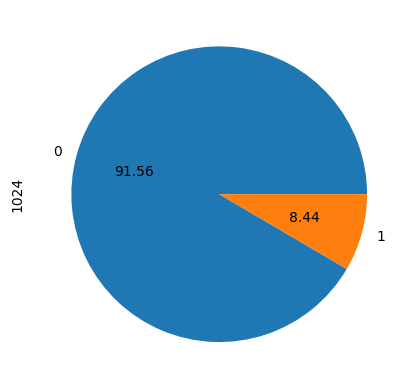

In [6]:
Y.value_counts().plot.pie(autopct = '%.2f' )

In [7]:
print('the parentage of positive record in the original dataset' ,Y.sum()/len(Y)*100 , '%')

the parentage of positive record in the original dataset 8.443922489724017 %


In [8]:
print('the parentage of positive record in the train dataset' ,Y_train.sum()/len(Y_train)*100 , '%')
print('the parentage of positive record in the test dataset' ,Y_test.sum()/len(Y_test)*100 , '%')

the parentage of positive record in the train dataset 8.088667058132707 %
the parentage of positive record in the test dataset 9.864944216089254 %


In [9]:
evaluation_df = pd.DataFrame(index=['f2_score', 'accuracy','precision', 'recall'], columns=['DT', 'KNN', 'SVC', 'GB','NB','Logistic', 'LDA','AdaBoost' ,'XGB','LR', "MLP"])

In [10]:
# Score function 
# Recall is 10 time importance than precision
from sklearn.metrics import fbeta_score

def custom_scorer(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=10**(0.5), average='binary')

# Start train the model

The best parameter {'classifier__max_depth': 30, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 1}
The best parameter's score 0.42935000307278665
f2 score: 0.4505734571272529
accuracy: 0.9007633587786259
Recall 0.44642857142857145
precision: 0.4966887417218543
confusion matrix


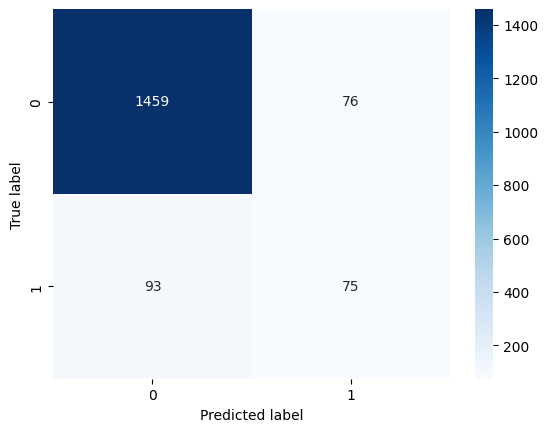

In [11]:
# Import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss, matthews_corrcoef,  cohen_kappa_score
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import make_scorer, recall_score, precision_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Define the classifier
DT = Pipeline([
    ('classifier', DecisionTreeClassifier())
])

param_grid = {'classifier__max_depth': [1, 10, 20, 30],
              'classifier__min_samples_split': [1, 10,  20],
              'classifier__min_samples_leaf': [1,10,20]}

scorer = make_scorer(custom_scorer, greater_is_better=True)

DT_cv = GridSearchCV(DT, param_grid, cv=5, scoring=scorer)
DT_cv.fit(X_train, Y_train)

print('The best parameter', DT_cv.best_params_)
print("The best parameter's score", DT_cv.best_score_)

best_params = DT_cv.best_params_
DT.set_params(**best_params)

# Train the classifier on the training data
DT.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = DT.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_df.loc["f2_score", "DT"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_df.loc["accuracy", "DT"] = accuracy
print('accuracy:',accuracy)

recall__score = recall_score(Y_test, y_pred)
evaluation_df.loc['recall', "DT"] = recall__score
print('Recall',recall__score)


# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_df.loc['precision', "DT"] = precision__score
print('precision:',precision__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__n_neighbors': 1}
The best parameter's score 0.5013251777823022
f2 score: 0.5505984766050056
accuracy: 0.9166177334116266
recall: 0.5476190476190477
precision: 0.5822784810126582
confusion matrix


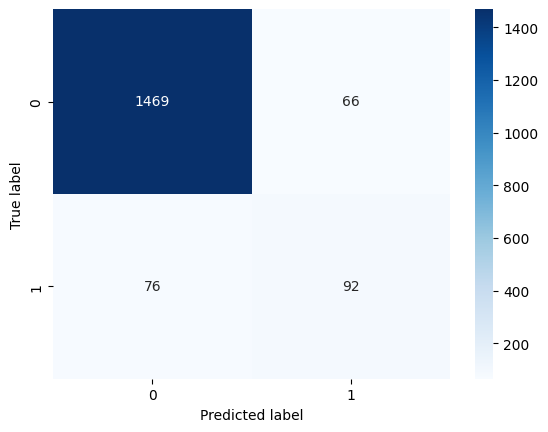

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Define the classifier
KNN = Pipeline([
    ('classifier', KNeighborsClassifier())
])

param_grid = {'classifier__n_neighbors': range(30)}
scorer = make_scorer(custom_scorer, greater_is_better=True)

KNN_cv = GridSearchCV(KNN, param_grid, cv=5, scoring=scorer)
KNN_cv.fit(X_train, Y_train)

print('The best parameter', KNN_cv.best_params_)
print("The best parameter's score", KNN_cv.best_score_)

best_params = KNN_cv.best_params_
KNN.set_params(**best_params)

# Train the classifier on the training data
KNN.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = KNN.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_df.loc["f2_score", "KNN"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_df.loc["accuracy", "KNN"] = accuracy
print('accuracy:',accuracy)

# calculate the Recall
recall__score = recall_score(Y_test, y_pred)
evaluation_df.loc['recall', "KNN"] = recall__score
print('recall:',recall__score)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_df.loc['precision', "KNN"] = precision__score
print('precision:',precision__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__kernel': 'rbf'}
The best parameter's score 0.2964861281291101
f2 score: 0.3285468121769098
accuracy: 0.9266001174398121
recall: 0.30952380952380953
precision: 0.8524590163934426
confusion matrix


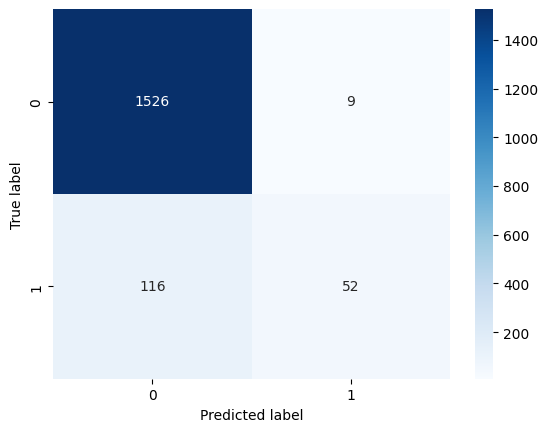

In [13]:
from sklearn.svm import SVC

# Define the classifier
SVC = Pipeline([
    ('classifier', SVC( random_state=42))
])

param_grid = {'classifier__kernel': ['rbf','sigmoid']}

scorer = make_scorer(custom_scorer, greater_is_better=True)

SVC_cv = GridSearchCV(SVC, param_grid, cv=5, scoring=scorer)
SVC_cv.fit(X_train, Y_train)

print('The best parameter', SVC_cv.best_params_)
print("The best parameter's score", SVC_cv.best_score_)

best_params = SVC_cv.best_params_
SVC.set_params(**best_params)

# Train the classifier on the training data
SVC.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = SVC.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_df.loc["f2_score", "SVC"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_df.loc["accuracy", "SVC"] = accuracy
print('accuracy:',accuracy)

# calculate the recall
recall__score = recall_score(Y_test, y_pred)
evaluation_df.loc['recall', "SVC"] = recall__score
print('recall:',recall__score)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_df.loc['precision', "SVC"] = precision__score
print('precision:',precision__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__learning_rate': 0.8}
The best parameter's score 0.4447799247337555
f2 score: 0.4964226747385801
accuracy: 0.917204932472108
recall: 0.4880952380952381
precision: 0.5985401459854015
confusion matrix


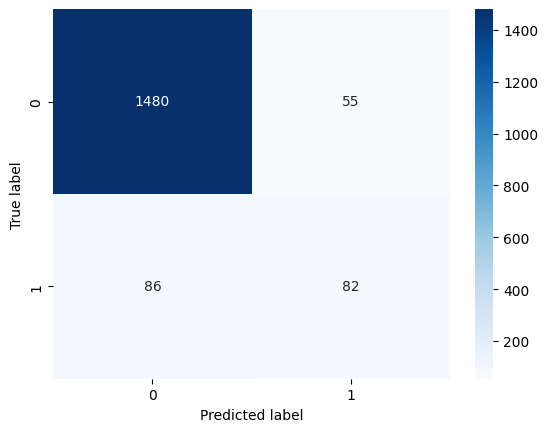

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# Define the classifier
GB = Pipeline([
    ('classifier', GradientBoostingClassifier())
])

param_grid = {'classifier__learning_rate': np.arange(0, 1.1, 0.1) }

scorer = make_scorer(custom_scorer, greater_is_better=True)

GB_cv = GridSearchCV(GB, param_grid, cv=5, scoring=scorer)
GB_cv.fit(X_train, Y_train)

print('The best parameter', GB_cv.best_params_)
print("The best parameter's score", GB_cv.best_score_)

best_params = GB_cv.best_params_
GB.set_params(**best_params)

# Train the classifier on the training data
GB.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = GB.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_df.loc["f2_score", "GB"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_df.loc["accuracy", "GB"] = accuracy
print('accuracy:',accuracy)

# calculate the Recall
recall__score = recall_score(Y_test, y_pred)
evaluation_df.loc['recall', "GB"] = recall__score
print('recall:',recall__score)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_df.loc['precision', "GB"] = precision__score
print('precision:',precision__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

f2 score: 0.6259752179899036
accuracy: 0.7539635936582502
recall: 0.7380952380952381
precision: 0.24849699398797595
confusion matrix


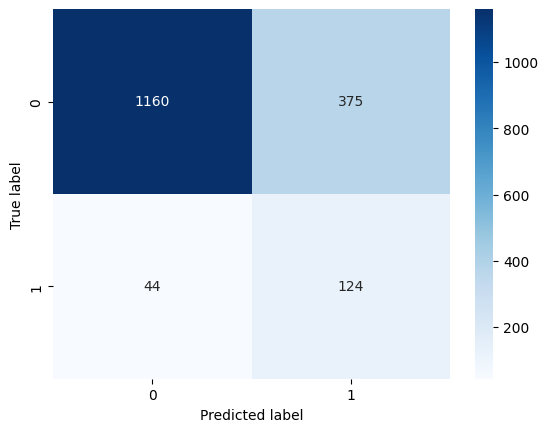

In [15]:
from sklearn.naive_bayes import GaussianNB

# Define the classifier
NB = Pipeline([
    ('classifier', GaussianNB())
])

# Train the classifier on the training data
NB.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = NB.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_df.loc["f2_score", "NB"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_df.loc["accuracy", "NB"] = accuracy
print('accuracy:',accuracy)

# calculate the Recall
recall__score = recall_score(Y_test, y_pred)
evaluation_df.loc['recall', "NB"] = recall__score
print('recall:',recall__score)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_df.loc['precision', "NB"] = precision__score
print('precision:',precision__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__penalty': None, 'classifier__solver': 'newton-cholesky'}
The best parameter's score 0.42840584084246985
f2 score: 0.4418362023995826
accuracy: 0.8526130358191427
0.4583333333333333
precision: 0.32489451476793246
confusion matrix


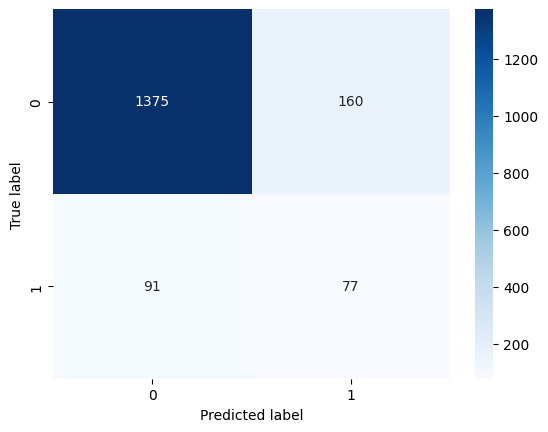

In [16]:
from sklearn.linear_model import LogisticRegression

# Define the classifier
Logistic = Pipeline([
    ('classifier', LogisticRegression())
])

param_grid = {'classifier__penalty': ['l1', 'l2', 'elasticnet', None],
'classifier__solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
scorer = make_scorer(custom_scorer, greater_is_better=True)

Logistic_cv = GridSearchCV(Logistic, param_grid, cv=5, scoring=scorer)
Logistic_cv.fit(X_train, Y_train)

print('The best parameter', Logistic_cv.best_params_)
print("The best parameter's score", Logistic_cv.best_score_)

best_params = Logistic_cv.best_params_
Logistic.set_params(**best_params)

# Train the classifier on the training data
Logistic.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = Logistic.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_df.loc["f2_score", "Logistic"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_df.loc["accuracy", "Logistic"] = accuracy
print('accuracy:',accuracy)

# calculate the Recall
recall__score = recall_score(Y_test, y_pred)
evaluation_df.loc['recall', "Logistic"] = recall__score
print(recall__score)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_df.loc['precision', "Logistic"] = precision__score
print('precision:',precision__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__solver': 'svd'}
The best parameter's score 0.48868221269421996
f2 score: 0.49117971334068367
accuracy: 0.9177921315325895
Recall 0.48214285714285715
precision: 0.6044776119402985
confusion matrix


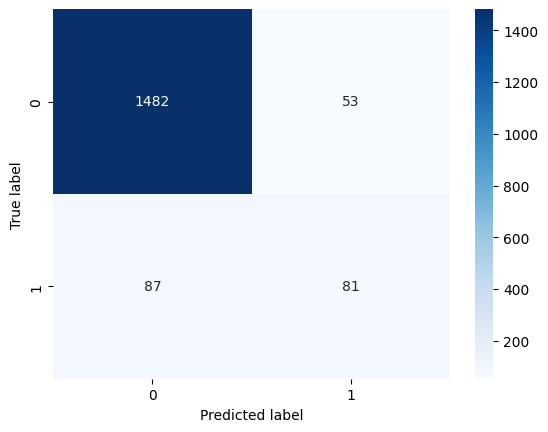

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define the classifier
LDA = Pipeline([
    ('classifier', LinearDiscriminantAnalysis())
])


param_grid = {'classifier__solver': ['svd', 'lsqr', 'eigen']}

scorer = make_scorer(custom_scorer, greater_is_better=True)

LDA_cv = GridSearchCV(LDA, param_grid, cv=5, scoring=scorer)
LDA_cv.fit(X_train, Y_train)

print('The best parameter', LDA_cv.best_params_)
print("The best parameter's score", LDA_cv.best_score_)

best_params = LDA_cv.best_params_
LDA.set_params(**best_params)

# Train the classifier on the training data
LDA.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = LDA.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_df.loc["f2_score", "LDA"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_df.loc["accuracy", "LDA"] = accuracy
print('accuracy:',accuracy)

# calculate the Recall
recall__score = recall_score(Y_test, y_pred)
evaluation_df.loc['recall', "LDA"] = recall__score
print('Recall',recall__score)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_df.loc['precision', "LDA"] = precision__score
print('precision:',precision__score)


labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__learning_rate': 0.9, 'classifier__n_estimators': 20}
The best parameter's score 0.17551013277211552
f2 score: 0.16608594657375145
accuracy: 0.9072225484439225
recall 0.15476190476190477
precision: 0.6190476190476191
confusion matrix


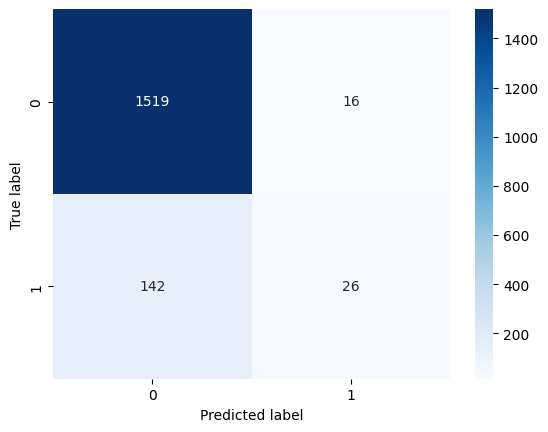

In [18]:
from sklearn.ensemble import AdaBoostClassifier

# Define the classifier
AdaBoost = Pipeline([
    ('classifier',AdaBoostClassifier( random_state=0))
])

param_grid = {'classifier__n_estimators': np.arange(0, 25, 5),
              'classifier__learning_rate' : np.arange(0, 1.1, 0.1) }

scorer = make_scorer(custom_scorer, greater_is_better=True)

AdaBoost_cv = GridSearchCV(AdaBoost, param_grid, cv=5, scoring=scorer)
AdaBoost_cv.fit(X_train, Y_train)

print('The best parameter', AdaBoost_cv.best_params_)
print("The best parameter's score", AdaBoost_cv.best_score_)

best_params = AdaBoost_cv.best_params_
AdaBoost.set_params(**best_params)

# Train the classifier on the training data
AdaBoost.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = AdaBoost.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_df.loc["f2_score", "AdaBoost"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_df.loc["accuracy", "AdaBoost"] = accuracy
print('accuracy:',accuracy)

# calculate the Recall
recall__score = recall_score(Y_test, y_pred)
evaluation_df.loc['recall', "AdaBoost"] = recall__score
print('recall', recall__score)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_df.loc['precision', "AdaBoost"] = precision__score
print('precision:',precision__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)


print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')
# Show plot
plt.show()

The best parameter {'classifier__learning_rate': 0.7}
The best parameter's score 0.4398263882915103
f2 score: 0.5025069637883008
accuracy: 0.9301233118027011
Recall 0.4880952380952381
precision: 0.7130434782608696
confusion matrix


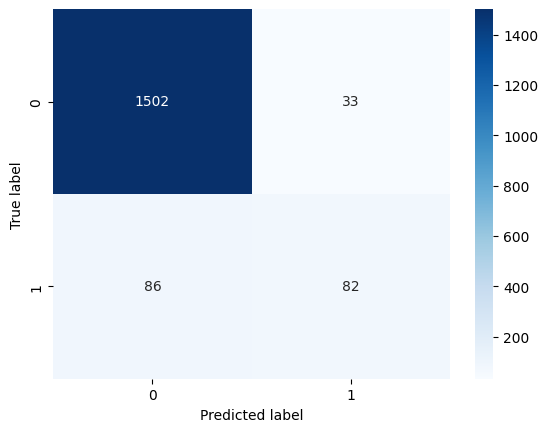

In [19]:
import xgboost as xgb

# Define the classifier
XGB = Pipeline([
    ('classifier',xgb.XGBClassifier())
])

param_grid = {'classifier__learning_rate':[0.1,0.4,0.7] }

scorer = make_scorer(custom_scorer, greater_is_better=True)

XGB_cv = GridSearchCV(XGB, param_grid, cv=5, scoring=scorer)
XGB_cv.fit(X_train, Y_train)

print('The best parameter', XGB_cv.best_params_)
print("The best parameter's score", XGB_cv.best_score_)

best_params = XGB_cv.best_params_
XGB.set_params(**best_params)

# Train the classifier on the training data
XGB.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = XGB.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_df.loc["f2_score", "XGB"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_df.loc["accuracy", "XGB"] = accuracy
print('accuracy:',accuracy)

# Recall
recall__score = recall_score(Y_test, y_pred)
evaluation_df.loc['recall', "XGB"] = recall__score
print('Recall',recall__score)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_df.loc['precision', "XGB"] = precision__score
print('precision:',precision__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__fit_intercept': True}
The best parameter's score nan
f2 score: 0.32685714285714285
accuracy: 0.9213153258954786
0.30952380952380953
precision: 0.7428571428571429
confusion matrix


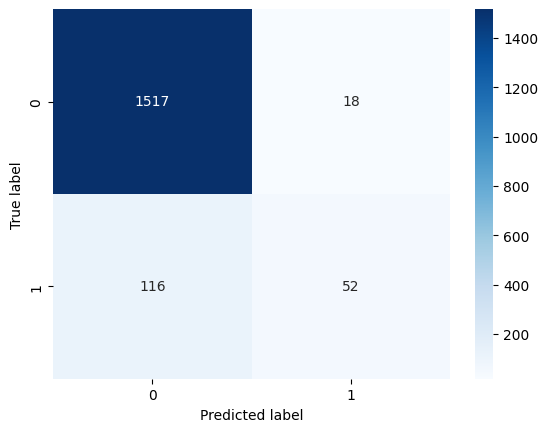

In [20]:
from sklearn.linear_model import LinearRegression

# Define the classifier
LR = Pipeline([
    ('classifier', LinearRegression())
])


param_grid = {'classifier__fit_intercept': [True, False]}

scorer = make_scorer(custom_scorer, greater_is_better=True)

LR_cv = GridSearchCV(LR, param_grid, cv=5, scoring=scorer)
LR_cv.fit(X_train, Y_train)

print('The best parameter', LR_cv.best_params_)
print("The best parameter's score", LR_cv.best_score_)

best_params = LR_cv.best_params_
LR.set_params(**best_params)

# Train the classifier on the training data
LR.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred_prob = LR.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_df.loc["f2_score", "LR"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_df.loc["accuracy", "LR"] = accuracy
print('accuracy:',accuracy)


# Recall
recall__score = recall_score(Y_test, y_pred)
evaluation_df.loc['recall', "LR"] = recall__score
print(recall__score)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_df.loc['precision', "LR"] = precision__score
print('precision:',precision__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-04-21 21:50:45.799586: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-21 21:50:45.800157: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-04-21 21:50:45.990915: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-21 21:50:46.218589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - 0s 2ms/step


2023-04-21 21:51:42.760855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Accuracy: 0.9330593071051086
Recall: 0.5416666666666666
Precision: 0.7109375
F2 Score: 0.5536504424778761
confusion matrix


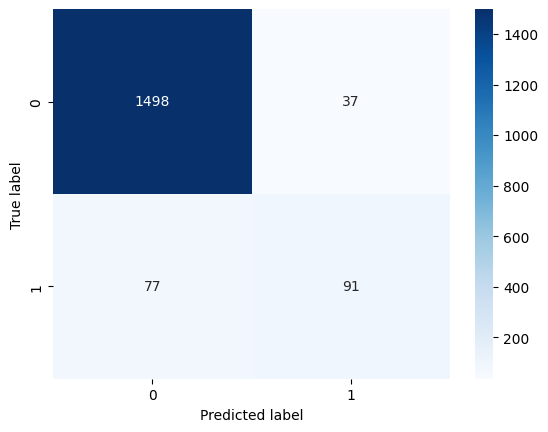

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam



# Set the input size, hidden size, and number of classes
input_size = X_train.shape[1]
hidden_size = 500
num_classes = 2

# Create the MLP model
model = Sequential([
    Dense(hidden_size, activation='relu', input_shape=(input_size,)),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
with tf.device("/GPU:0"):
    model.fit(X_train, Y_train, epochs=100, batch_size=64, verbose=0)

# Evaluate the model using the test data
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Calculate evaluation metrics
evaluation_df.loc["accuracy", "MLP"] = accuracy_score(Y_test, y_pred)
evaluation_df.loc["recall", "MLP"] = recall_score(Y_test, y_pred)
evaluation_df.loc["precision", "MLP"] = precision_score(Y_test, y_pred)
evaluation_df.loc["f2_score", "MLP"] = custom_scorer(Y_test, y_pred)

print("Accuracy:", evaluation_df.loc["accuracy", "MLP"])
print("Recall:", evaluation_df.loc["recall", "MLP"])
print("Precision:", evaluation_df.loc["precision", "MLP"])
print("F2 Score:", evaluation_df.loc["f2_score", "MLP"])

labels = [0, 1]
con_matrix = confusion_matrix(Y_test, y_pred, labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

In [22]:
evaluation_df.T.sort_values(by =['f2_score'], ascending=False)

,f2_score,accuracy,precision,recall
NB,0.625975,0.753964,0.248497,0.738095
MLP,0.55365,0.933059,0.710938,0.541667
KNN,0.550598,0.916618,0.582278,0.547619
XGB,0.502507,0.930123,0.713043,0.488095
GB,0.496423,0.917205,0.59854,0.488095
LDA,0.49118,0.917792,0.604478,0.482143
DT,0.450573,0.900763,0.496689,0.446429
Logistic,0.441836,0.852613,0.324895,0.458333
SVC,0.328547,0.9266,0.852459,0.309524
LR,0.326857,0.921315,0.742857,0.309524


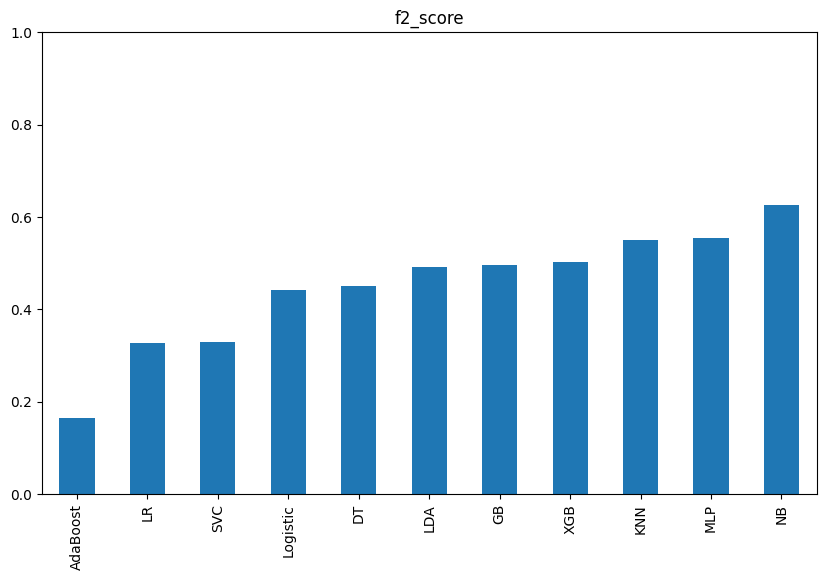

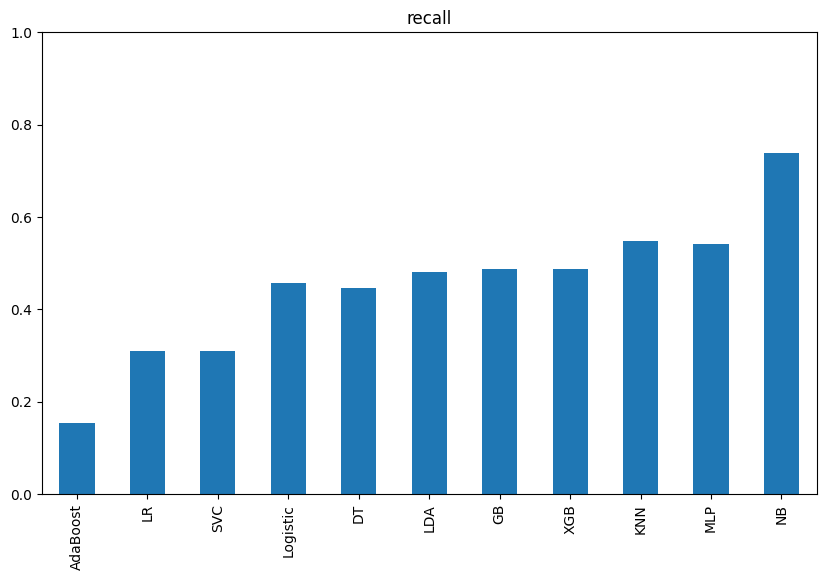

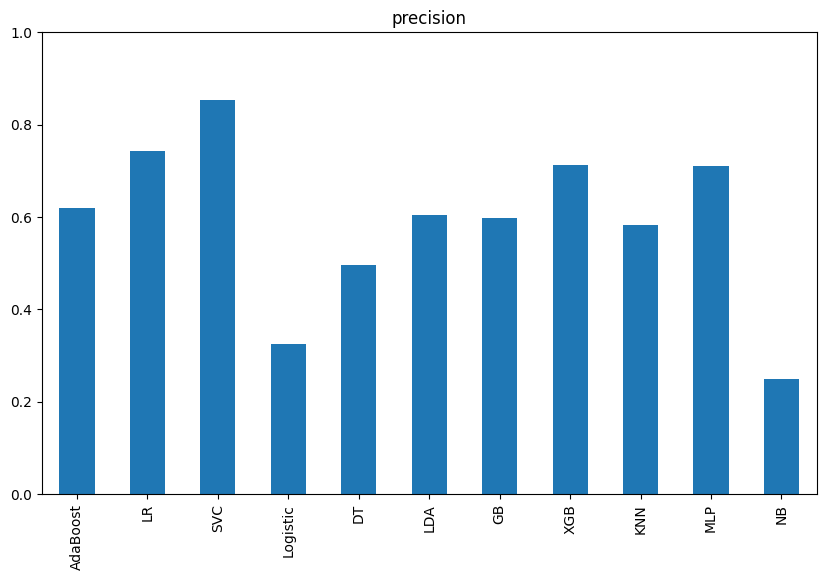

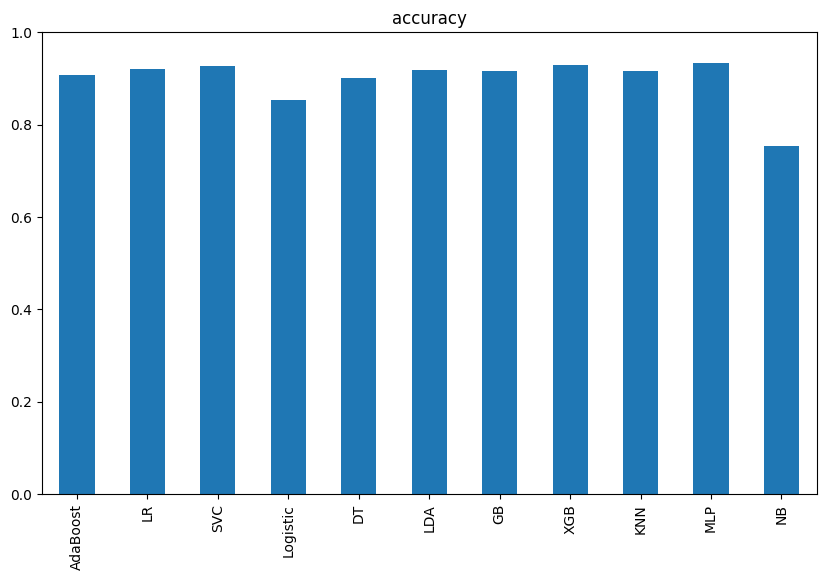

In [23]:
evaluation_df.T.sort_values(by =['f2_score'])['f2_score'].plot(kind='bar', figsize=(10, 6))
plt.title('f2_score')
plt.ylim(0, 1)
plt.show()

evaluation_df.T.sort_values(by =['f2_score'])['recall'].plot(kind='bar', figsize=(10, 6))
plt.title('recall')
plt.ylim(0, 1)
plt.show()

evaluation_df.T.sort_values(by =['f2_score'])['precision'].plot(kind='bar', figsize=(10, 6))
plt.title('precision')
plt.ylim(0, 1)
plt.show()

evaluation_df.T.sort_values(by =['f2_score'])['accuracy'].plot(kind='bar', figsize=(10, 6))
plt.title('accuracy')
plt.ylim(0, 1)
plt.show()



# Under Sampling, handling imbalance data 

the data set has 8992 observations and 1025 features
Number of duplicated observations in the dataset 477


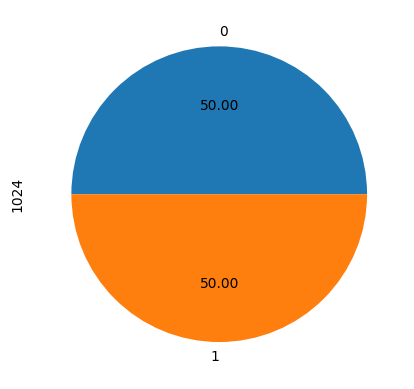

0    551
1    551
Name: 1024, dtype: int64


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

df = pd.read_csv('qsar_oral_toxicity.csv',delimiter= ';', header = None)

def convert_zero_one(word):
    if word == 'negative':
        return 0
    else:
        return 1
    
print('the data set has', df.shape[0], 'observations and' , df.shape[1] , 'features')

print('Number of duplicated observations in the dataset', df.duplicated().sum())

df = df.drop_duplicates()

X = df.iloc[:,:-1]
Y = df.iloc[:,-1].apply(convert_zero_one)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=8)

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
X_train, Y_train = rus.fit_resample(X_train, Y_train)

Y_train.value_counts().plot.pie(autopct = '%.2f' )
plt.show()

print(Y_train.value_counts())

evaluation_UnderSample_df = pd.DataFrame(index=['f2_score', 'accuracy','precision','recall'], columns=['DT', 'KNN', 'SVC', 'GB','NB','Logistic', 'LDA','AdaBoost' ,'XGB', 'LR','MLP'])


The best parameter {'classifier__max_depth': 30, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10}
The best parameter's score 0.7070538247251497
f2 score: 0.6084284460052678
accuracy: 0.6981796829125073
Recall 0.75
precision: 0.21070234113712374
confusion matrix


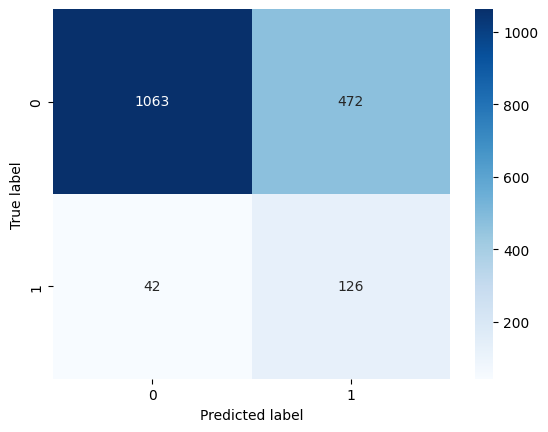

In [25]:
# Import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss, matthews_corrcoef,  cohen_kappa_score
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import confusion_matrix


# Define the classifier
DT = Pipeline([
    ('classifier', DecisionTreeClassifier())
])


param_grid = {'classifier__max_depth': [1, 10, 20, 30],
              'classifier__min_samples_split': [1, 10,  20],
              'classifier__min_samples_leaf': [1,10,20]}

scorer = make_scorer(custom_scorer, greater_is_better=True)

DT_cv = GridSearchCV(DT, param_grid, cv=5, scoring=scorer)
DT_cv.fit(X_train, Y_train)

print('The best parameter', DT_cv.best_params_)
print("The best parameter's score", DT_cv.best_score_)

best_params = DT_cv.best_params_
DT.set_params(**best_params)

# Train the classifier on the training data
DT.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = DT.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_UnderSample_df.loc["f2_score", "DT"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_UnderSample_df.loc["accuracy", "DT"] = accuracy
print('accuracy:',accuracy)

recall__score = recall_score(Y_test, y_pred)
evaluation_UnderSample_df.loc['recall', "DT"] = recall__score
print('Recall', recall__score)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_UnderSample_df.loc['precision', "DT"] = precision__score
print('precision:',precision__score)


labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__n_neighbors': 1}
The best parameter's score 0.7382086237404638
f2 score: 0.684016582220175
accuracy: 0.7715795654726952
Recall 0.8035714285714286
precision: 0.27494908350305497
confusion matrix


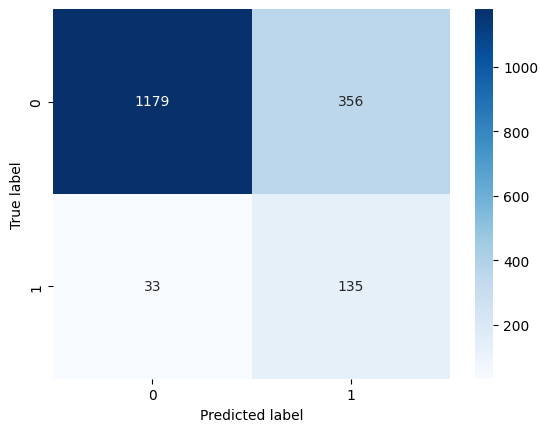

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Define the classifier
KNN = Pipeline([
    ('classifier', KNeighborsClassifier())
])

param_grid = {'classifier__n_neighbors': range(30)}

scorer = make_scorer(custom_scorer, greater_is_better=True)

KNN_cv = GridSearchCV(KNN, param_grid, cv=5, scoring=scorer)
KNN_cv.fit(X_train, Y_train)

print('The best parameter', KNN_cv.best_params_)
print("The best parameter's score", KNN_cv.best_score_)

best_params = KNN_cv.best_params_
KNN.set_params(**best_params)

# Train the classifier on the training data
KNN.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = KNN.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_UnderSample_df.loc["f2_score", "KNN"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_UnderSample_df.loc["accuracy", "KNN"] = accuracy
print('accuracy:',accuracy)

recall__score = recall_score(Y_test, y_pred)
evaluation_UnderSample_df.loc['recall', "KNN"] = recall__score
print('Recall',recall__score)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_UnderSample_df.loc['precision', "KNN"] = precision__score
print('precision:',precision__score)


labels = [0,1]


# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__kernel': 'rbf'}
The best parameter's score 0.7108062897716232
f2 score: 0.7447342026078235
accuracy: 0.8755137991779213
Recall 0.8035714285714286
precision: 0.4299363057324841
confusion matrix


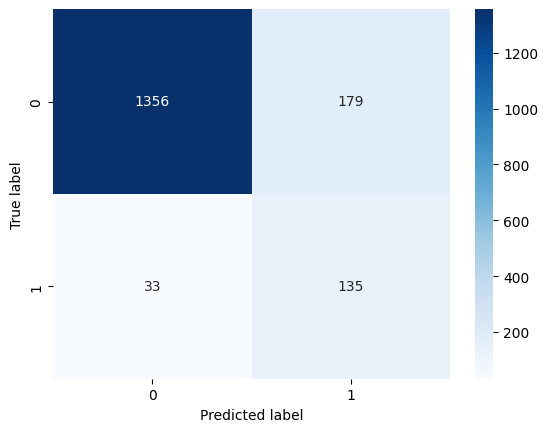

In [27]:
from sklearn.svm import SVC


# Define the classifier
SVC = Pipeline([
    ('classifier', SVC(  random_state=42))
])

param_grid = {'classifier__kernel': ['rbf','sigmoid']}

scorer = make_scorer(custom_scorer, greater_is_better=True)

SVC_cv = GridSearchCV(SVC, param_grid, cv=5, scoring=scorer)
SVC_cv.fit(X_train, Y_train)

print('The best parameter', SVC_cv.best_params_)
print("The best parameter's score", SVC_cv.best_score_)

best_params = SVC_cv.best_params_
SVC.set_params(**best_params)

# Train the classifier on the training data
SVC.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = SVC.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_UnderSample_df.loc["f2_score", "SVC"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_UnderSample_df.loc["accuracy", "SVC"] = accuracy
print('accuracy:',accuracy)

recall__score = recall_score(Y_test, y_pred)
evaluation_UnderSample_df.loc['recall', "SVC"] = recall__score
print('Recall',recall__score)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_UnderSample_df.loc['precision', "SVC"] = precision__score
print('precision:',precision__score)


labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__learning_rate': 0.8}
The best parameter's score 0.763837712939656
f2 score: 0.685595567867036
accuracy: 0.7745155607751028
Recall 0.8035714285714286
precision: 0.2777777777777778
confusion matrix


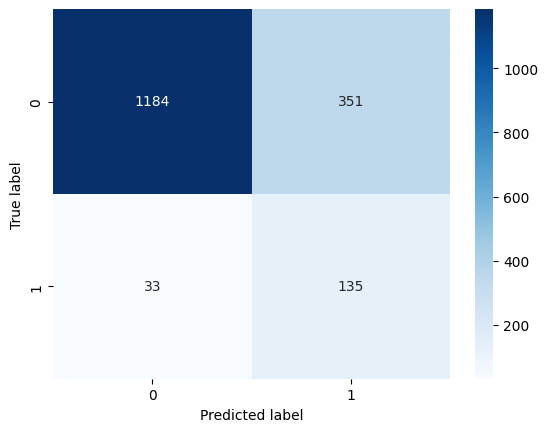

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# Define the classifier
GB = Pipeline([
    ('classifier', GradientBoostingClassifier())
])

param_grid = {'classifier__learning_rate': np.arange(0, 1.1, 0.1) }

scorer = make_scorer(custom_scorer, greater_is_better=True)

GB_cv = GridSearchCV(GB, param_grid, cv=5, scoring=scorer)
GB_cv.fit(X_train, Y_train)

print('The best parameter', GB_cv.best_params_)
print("The best parameter's score", GB_cv.best_score_)

best_params = GB_cv.best_params_
GB.set_params(**best_params)

# Train the classifier on the training data
GB.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = GB.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_UnderSample_df.loc["f2_score", "GB"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_UnderSample_df.loc["accuracy", "GB"] = accuracy
print('accuracy:',accuracy)

recall__score = recall_score(Y_test, y_pred)
evaluation_UnderSample_df.loc['recall', "GB"] = recall__score
print('Recall', recall__score)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_UnderSample_df.loc['precision', "GB"] = precision__score
print('precision:',precision__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

f2 score: 0.6326348640213999
accuracy: 0.722254844392249
Recall 0.7678571428571429
precision: 0.2291296625222025
confusion matrix


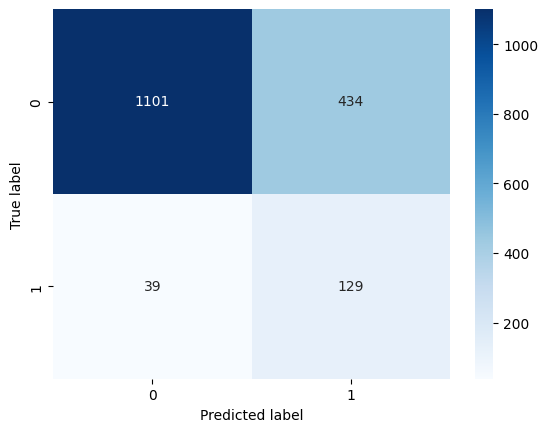

In [29]:
from sklearn.naive_bayes import GaussianNB

# Define the classifier
NB = Pipeline([
    ('classifier', GaussianNB())
])

# Train the classifier on the training data
NB.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = NB.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_UnderSample_df.loc["f2_score", "NB"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_UnderSample_df.loc["accuracy", "NB"] = accuracy
print('accuracy:',accuracy)

# calculate the Recall
recall__score = recall_score(Y_test, y_pred)
evaluation_UnderSample_df.loc['recall', "NB"] = recall__score
print('Recall', recall__score)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_UnderSample_df.loc['precision', "NB"] = precision__score
print('precision:',precision__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__penalty': 'l2', 'classifier__solver': 'sag'}
The best parameter's score 0.7675014034722324
f2 score: 0.7011547344110854
accuracy: 0.7786259541984732
Recall 0.8214285714285714
precision: 0.2845360824742268
confusion matrix


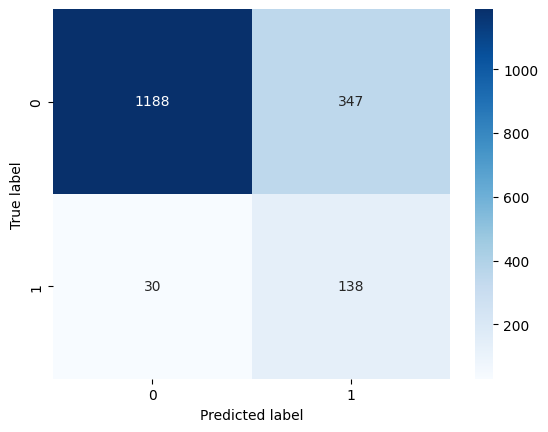

In [30]:
from sklearn.linear_model import LogisticRegression

# Define the classifier
Logistic = Pipeline([
    ('classifier', LogisticRegression())
])

param_grid = {'classifier__penalty': ['l1', 'l2', 'elasticnet', None],
'classifier__solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
scorer = make_scorer(custom_scorer, greater_is_better=True)

Logistic_cv = GridSearchCV(Logistic, param_grid, cv=5, scoring=scorer)
Logistic_cv.fit(X_train, Y_train)

print('The best parameter', Logistic_cv.best_params_)
print("The best parameter's score", Logistic_cv.best_score_)

best_params = Logistic_cv.best_params_
Logistic.set_params(**best_params)

# Train the classifier on the training data
Logistic.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = Logistic.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_UnderSample_df.loc["f2_score", "Logistic"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_UnderSample_df.loc["accuracy", "Logistic"] = accuracy
print('accuracy:',accuracy)

recall__score = recall_score(Y_test, y_pred)
evaluation_UnderSample_df.loc['recall', "Logistic"] = recall__score
print('Recall',recall__score)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_UnderSample_df.loc['precision', "Logistic"] = precision__score
print('precision:',precision__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()



The best parameter {'classifier__solver': 'svd'}
The best parameter's score 0.623428703588617
f2 score: 0.4235860409145607
accuracy: 0.5366999412800939
Recall 0.5714285714285714
precision: 0.11808118081180811
confusion matrix


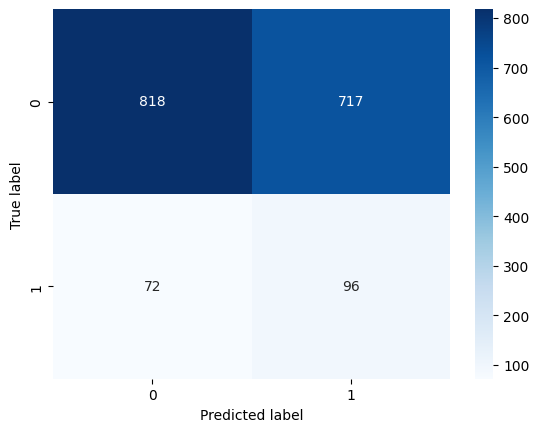

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define the classifier
LDA = Pipeline([
    ('classifier', LinearDiscriminantAnalysis())
])


param_grid = {'classifier__solver': ['svd', 'lsqr', 'eigen']}

scorer = make_scorer(custom_scorer, greater_is_better=True)

LDA_cv = GridSearchCV(LDA, param_grid, cv=5, scoring=scorer)
LDA_cv.fit(X_train, Y_train)

print('The best parameter', LDA_cv.best_params_)
print("The best parameter's score", LDA_cv.best_score_)

best_params = LDA_cv.best_params_
LDA.set_params(**best_params)

# Train the classifier on the training data
LDA.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = LDA.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_UnderSample_df.loc["f2_score", "LDA"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_UnderSample_df.loc["accuracy", "LDA"] = accuracy
print('accuracy:',accuracy)


recall__score = recall_score(Y_test, y_pred)
evaluation_UnderSample_df.loc['recall', "LDA"] = recall__score
print('Recall', recall__score)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_UnderSample_df.loc['precision', "LDA"] = precision__score
print('precision:',precision__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__learning_rate': 0.9, 'classifier__n_estimators': 20}
The best parameter's score 0.7072398412642773
f2 score: 0.6351970669110908
accuracy: 0.7545507927187316
Recall 0.75
precision: 0.250996015936255
confusion matrix


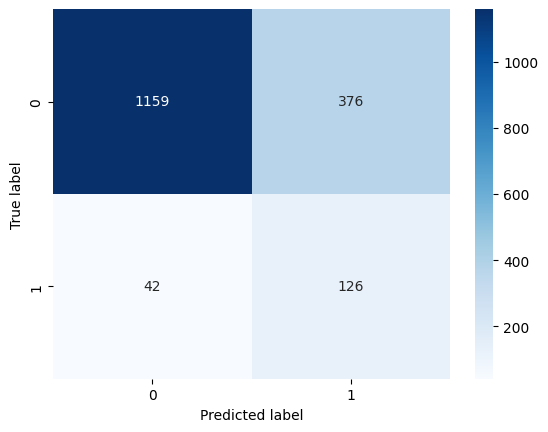

In [32]:
from sklearn.ensemble import AdaBoostClassifier

# Define the classifier
AdaBoost = Pipeline([
    ('classifier',AdaBoostClassifier( random_state=0))
])

param_grid = {'classifier__n_estimators': np.arange(0, 25, 5),
              'classifier__learning_rate' : np.arange(0, 1.1, 0.1) }

scorer = make_scorer(custom_scorer, greater_is_better=True)

AdaBoost_cv = GridSearchCV(AdaBoost, param_grid, cv=5, scoring=scorer)
AdaBoost_cv.fit(X_train, Y_train)

print('The best parameter', AdaBoost_cv.best_params_)
print("The best parameter's score", AdaBoost_cv.best_score_)

best_params = AdaBoost_cv.best_params_
AdaBoost.set_params(**best_params)

# Train the classifier on the training data
AdaBoost.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = AdaBoost.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_UnderSample_df.loc["f2_score", "AdaBoost"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_UnderSample_df.loc["accuracy", "AdaBoost"] = accuracy
print('accuracy:',accuracy)


recall__score = recall_score(Y_test, y_pred)
evaluation_UnderSample_df.loc['recall', "AdaBoost"] = recall__score
print('Recall',recall__score)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_UnderSample_df.loc['precision', "AdaBoost"] = precision__score
print('precision:',precision__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__learning_rate': 0.4}
The best parameter's score 0.7504583076555116
f2 score: 0.7250470809792844
accuracy: 0.805049911920141
Recall 0.8333333333333334
precision: 0.3153153153153153
confusion matrix


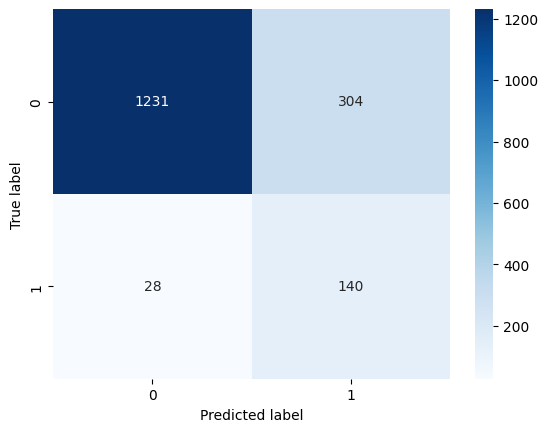

In [33]:
import xgboost as xgb

# Define the classifier
XGB = Pipeline([
    ('classifier',xgb.XGBClassifier())
])

param_grid = {'classifier__learning_rate':[0.1,0.4,0.7] }

scorer = make_scorer(custom_scorer, greater_is_better=True)

XGB_cv = GridSearchCV(XGB, param_grid, cv=5, scoring=scorer)
XGB_cv.fit(X_train, Y_train)

print('The best parameter', XGB_cv.best_params_)
print("The best parameter's score", XGB_cv.best_score_)

best_params = XGB_cv.best_params_
XGB.set_params(**best_params)

# Train the classifier on the training data
XGB.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = XGB.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_UnderSample_df.loc["f2_score", "XGB"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_UnderSample_df.loc["accuracy", "XGB"] = accuracy
print('accuracy:',accuracy)

recall__score = recall_score(Y_test, y_pred)
evaluation_UnderSample_df.loc['recall', "XGB"] = recall__score
print('Recall',recall__score)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_UnderSample_df.loc['precision', "XGB"] = precision__score
print('precision:',precision__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__fit_intercept': True}
The best parameter's score nan
f2 score: 0.4235860409145607
accuracy: 0.5366999412800939
precision: 0.11808118081180811
0.5714285714285714
confusion matrix


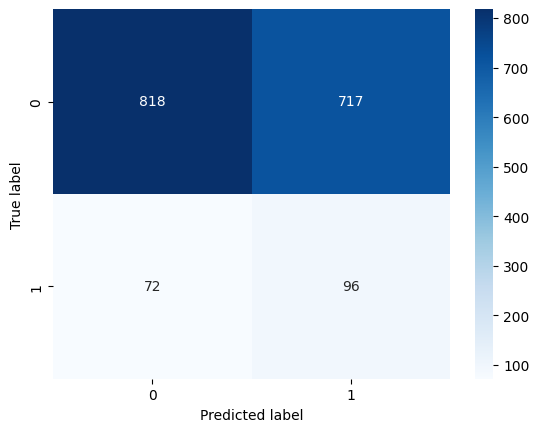

In [34]:
from sklearn.linear_model import LinearRegression

# Define the classifier
LR = Pipeline([
    ('classifier', LinearRegression())
])


param_grid = {'classifier__fit_intercept': [True, False]}

scorer = make_scorer(custom_scorer, greater_is_better=True)

LR_cv = GridSearchCV(LR, param_grid, cv=5, scoring=scorer)
LR_cv.fit(X_train, Y_train)

print('The best parameter', LR_cv.best_params_)
print("The best parameter's score", LR_cv.best_score_)

best_params = LR_cv.best_params_
LR.set_params(**best_params)

# Train the classifier on the training data
LR.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred_prob = LR.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_UnderSample_df.loc["f2_score", "LR"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_UnderSample_df.loc["accuracy", "LR"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_UnderSample_df.loc['precision', "LR"] = precision__score
print('precision:',precision__score)

# Recall
recall__score = recall_score(Y_test, y_pred)
evaluation_UnderSample_df.loc['recall', "LR"] = recall__score
print(recall__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

2023-04-21 21:53:52.398169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - 0s 2ms/step
Accuracy: 0.9330593071051086
Recall: 0.5416666666666666
Precision: 0.7109375
F2 Score: 0.5536504424778761
confusion matrix


2023-04-21 21:54:02.133566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


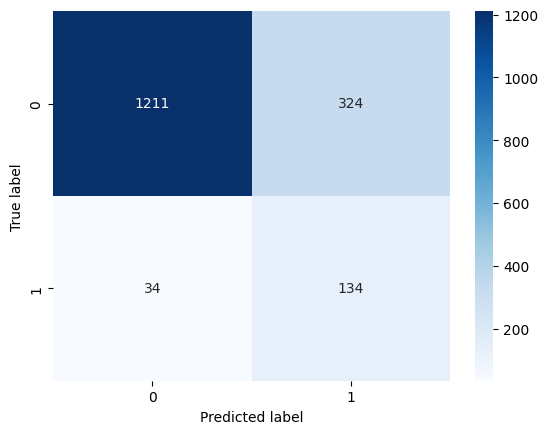

In [35]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam



# Set the input size, hidden size, and number of classes
input_size = X_train.shape[1]
hidden_size = 500
num_classes = 2

# Create the MLP model
model = Sequential([
    Dense(hidden_size, activation='relu', input_shape=(input_size,)),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
with tf.device("/GPU:0"):
    model.fit(X_train, Y_train, epochs=100, batch_size=64, verbose=0)

# Evaluate the model using the test data
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Calculate evaluation metrics
evaluation_UnderSample_df.loc["accuracy", "MLP"] = accuracy_score(Y_test, y_pred)
evaluation_UnderSample_df.loc["recall", "MLP"] = recall_score(Y_test, y_pred)
evaluation_UnderSample_df.loc["precision", "MLP"] = precision_score(Y_test, y_pred)
evaluation_UnderSample_df.loc["f2_score", "MLP"] = custom_scorer(Y_test, y_pred)

print("Accuracy:", evaluation_df.loc["accuracy", "MLP"])
print("Recall:", evaluation_df.loc["recall", "MLP"])
print("Precision:", evaluation_df.loc["precision", "MLP"])
print("F2 Score:", evaluation_df.loc["f2_score", "MLP"])

labels = [0, 1]
con_matrix = confusion_matrix(Y_test, y_pred, labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

In [36]:
evaluation_UnderSample_df.T.sort_values(by =['recall'], ascending=False)

,f2_score,accuracy,precision,recall
XGB,0.725047,0.80505,0.315315,0.833333
Logistic,0.701155,0.778626,0.284536,0.821429
KNN,0.684017,0.77158,0.274949,0.803571
SVC,0.744734,0.875514,0.429936,0.803571
GB,0.685596,0.774516,0.277778,0.803571
MLP,0.689429,0.789783,0.292576,0.797619
NB,0.632635,0.722255,0.22913,0.767857
DT,0.608428,0.69818,0.210702,0.75
AdaBoost,0.635197,0.754551,0.250996,0.75
LDA,0.423586,0.5367,0.118081,0.571429


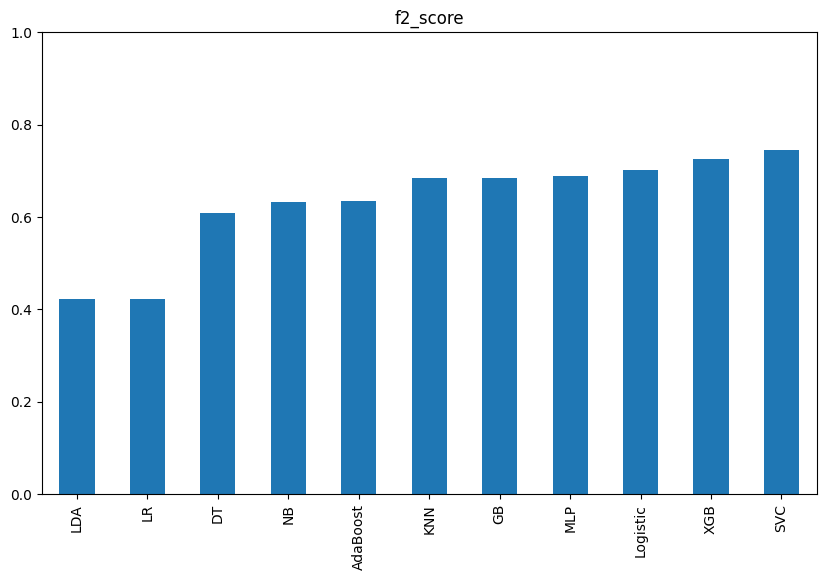

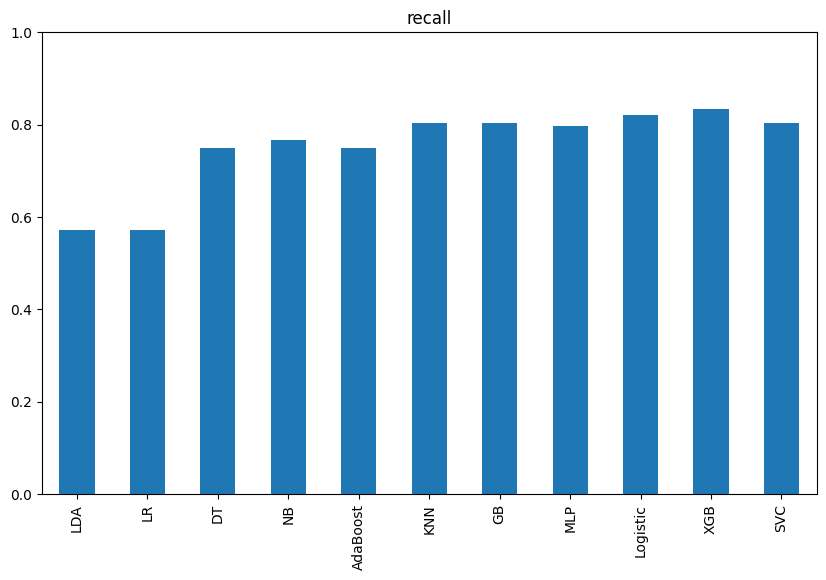

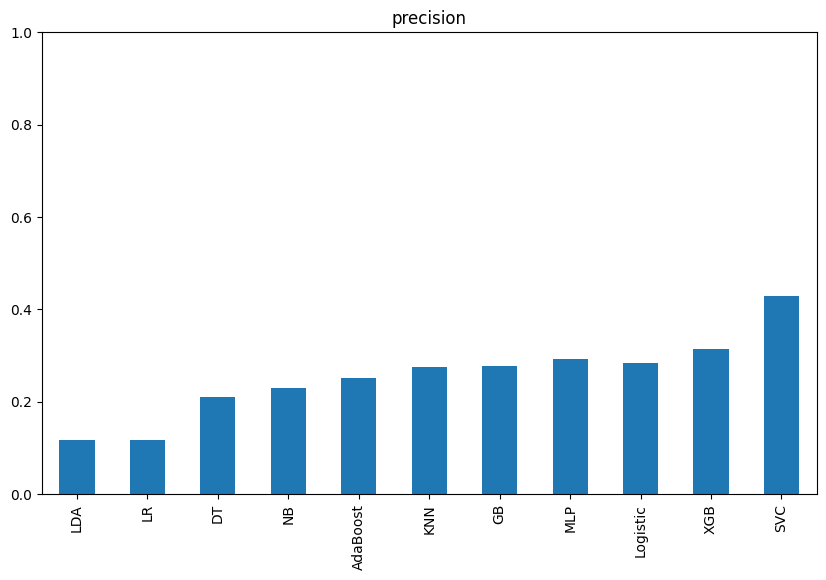

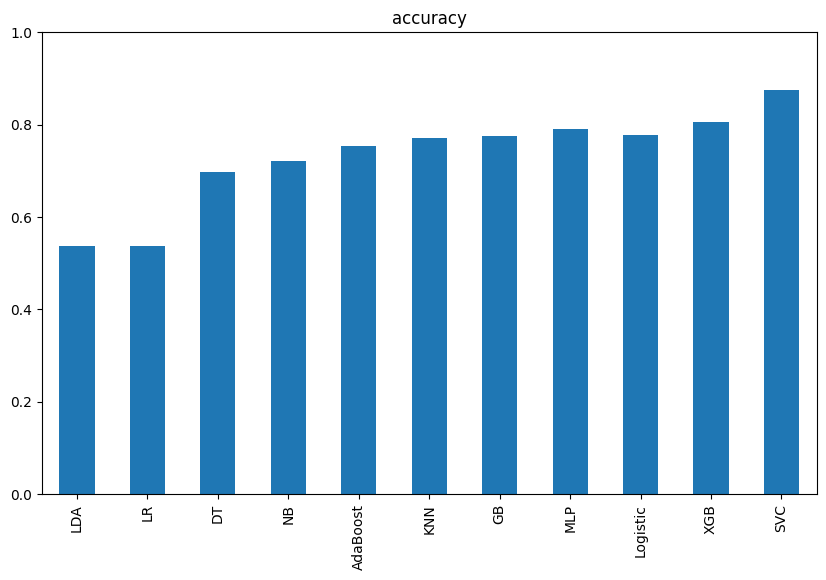

In [37]:
evaluation_UnderSample_df.T.sort_values(by =['f2_score'])['f2_score'].plot(kind='bar', figsize=(10, 6))
plt.title('f2_score')
plt.ylim(0, 1)
plt.show()

evaluation_UnderSample_df.T.sort_values(by =['f2_score'])['recall'].plot(kind='bar', figsize=(10, 6))
plt.title('recall')
plt.ylim(0, 1)
plt.show()

evaluation_UnderSample_df.T.sort_values(by =['f2_score'])['precision'].plot(kind='bar', figsize=(10, 6))
plt.title('precision')
plt.ylim(0, 1)
plt.show()

evaluation_UnderSample_df.T.sort_values(by =['f2_score'])['accuracy'].plot(kind='bar', figsize=(10, 6))
plt.title('accuracy')
plt.ylim(0, 1)
plt.show()

# OverSampling

the data set has 8992 observations and 1025 features
Number of duplicated observations in the dataset 477


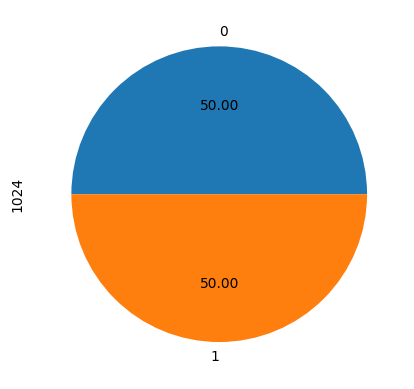

0    6261
1    6261
Name: 1024, dtype: int64


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler


df = pd.read_csv('qsar_oral_toxicity.csv',delimiter= ';', header = None)

def convert_zero_one(word):
    if word == 'negative':
        return 0
    else:
        return 1
    
print('the data set has', df.shape[0], 'observations and' , df.shape[1] , 'features')

print('Number of duplicated observations in the dataset', df.duplicated().sum())

df = df.drop_duplicates()

X = df.iloc[:,:-1]
Y = df.iloc[:,-1].apply(convert_zero_one)


# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=8)

rus = RandomOverSampler(sampling_strategy='auto') # Numerical value
X_train, Y_train = rus.fit_resample(X_train, Y_train)

Y_train.value_counts().plot.pie(autopct = '%.2f' )
plt.show()

print(Y_train.value_counts())

evaluation_OverSample_df = pd.DataFrame(index=['f2_score', 'accuracy','precision', 'recall'], columns=['DT', 'KNN', 'SVC', 'GB','NB','Logistic', 'LDA','AdaBoost' ,'XGB', 'LR', 'MLP'])


The best parameter {'classifier__max_depth': 30, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 1}
The best parameter's score 0.9914787869362035
f2 score: 0.581675392670157
accuracy: 0.8849089841456254
Recall 0.6011904761904762
precision: 0.4391304347826087
confusion matrix


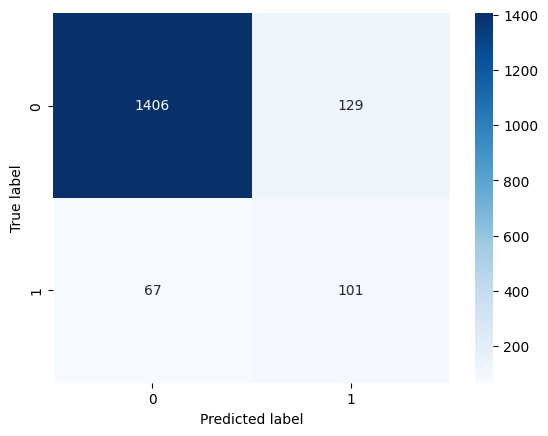

In [39]:
# Import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss, matthews_corrcoef,  cohen_kappa_score
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import confusion_matrix


# Define the classifier
DT = Pipeline([
    ('classifier', DecisionTreeClassifier())
])


param_grid = {'classifier__max_depth': [1, 10, 20, 30],
              'classifier__min_samples_split': [1, 10,  20],
              'classifier__min_samples_leaf': [1,10,20]}

scorer = make_scorer(custom_scorer, greater_is_better=True)

DT_cv = GridSearchCV(DT, param_grid, cv=5, scoring=scorer)
DT_cv.fit(X_train, Y_train)

print('The best parameter', DT_cv.best_params_)
print("The best parameter's score", DT_cv.best_score_)

best_params = DT_cv.best_params_
DT.set_params(**best_params)

# Train the classifier on the training data
DT.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = DT.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_OverSample_df .loc["f2_score", "DT"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_OverSample_df .loc["accuracy", "DT"] = accuracy
print('accuracy:',accuracy)

recall__score = recall_score(Y_test, y_pred)
evaluation_OverSample_df .loc['recall', "DT"] = recall__score
print('Recall', recall__score)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_OverSample_df.loc['precision', "DT"] = precision__score
print('precision:',precision__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__n_neighbors': 3}
The best parameter's score 0.9925503895321255
f2 score: 0.6583686440677967
accuracy: 0.9119201409277745
precision: 0.5432692307692307
Recall 0.6726190476190477
confusion matrix


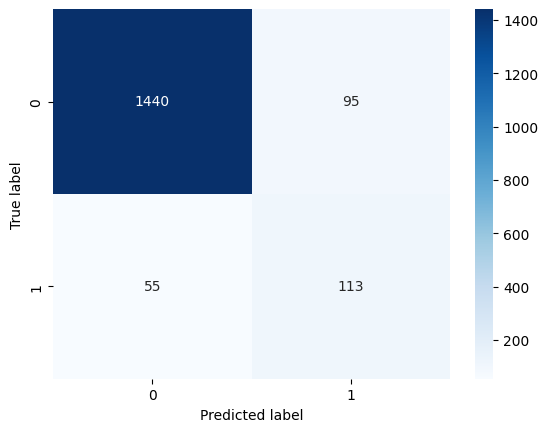

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Define the classifier
KNN = Pipeline([
    ('classifier', KNeighborsClassifier())
])

param_grid = {'classifier__n_neighbors': range(30)}

scorer = make_scorer(custom_scorer, greater_is_better=True)

KNN_cv = GridSearchCV(KNN, param_grid, cv=5, scoring=scorer)
KNN_cv.fit(X_train, Y_train)

print('The best parameter', KNN_cv.best_params_)
print("The best parameter's score", KNN_cv.best_score_)

best_params = KNN_cv.best_params_
KNN.set_params(**best_params)

# Train the classifier on the training data
KNN.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = KNN.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_OverSample_df .loc["f2_score", "KNN"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_OverSample_df .loc["accuracy", "KNN"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_OverSample_df.loc['precision', "KNN"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_OverSample_df .loc['recall', "KNN"] = recall__score
print('Recall',recall__score)

labels = [0,1]


# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__kernel': 'rbf'}
The best parameter's score 0.9885496749357989
f2 score: 0.7176470588235293
accuracy: 0.9330593071051086
precision: 0.6421052631578947
Recall 0.7261904761904762
confusion matrix


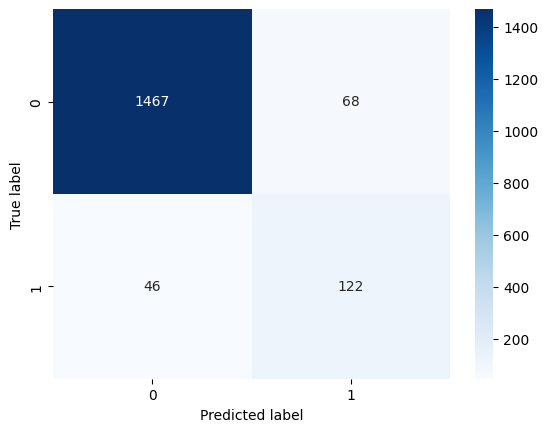

In [41]:
from sklearn.svm import SVC


# Define the classifier
SVC = Pipeline([
    ('classifier', SVC(  random_state=42))
])

param_grid = {'classifier__kernel': ['rbf','sigmoid']}

scorer = make_scorer(custom_scorer, greater_is_better=True)

SVC_cv = GridSearchCV(SVC, param_grid, cv=5, scoring=scorer)
SVC_cv.fit(X_train, Y_train)

print('The best parameter', SVC_cv.best_params_)
print("The best parameter's score", SVC_cv.best_score_)

best_params = SVC_cv.best_params_
SVC.set_params(**best_params)

# Train the classifier on the training data
SVC.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = SVC.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_OverSample_df .loc["f2_score", "SVC"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_OverSample_df .loc["accuracy", "SVC"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_OverSample_df.loc['precision', "SVC"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_OverSample_df .loc['recall', "SVC"] = recall__score
print('Recall',recall__score)


labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__learning_rate': 1.0}
The best parameter's score 0.9927002596391098
f2 score: 0.602980308674827
accuracy: 0.9054609512624779
precision: 0.5175879396984925
Recall 0.6130952380952381
confusion matrix


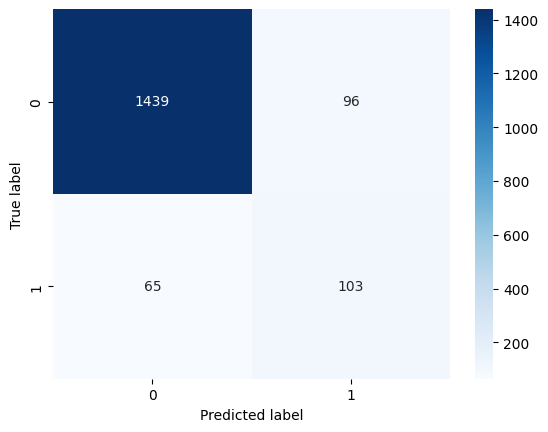

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# Define the classifier
GB = Pipeline([
    ('classifier', GradientBoostingClassifier())
])

param_grid = {'classifier__learning_rate': np.arange(0, 1.1, 0.1) }

scorer = make_scorer(custom_scorer, greater_is_better=True)

GB_cv = GridSearchCV(GB, param_grid, cv=5, scoring=scorer)
GB_cv.fit(X_train, Y_train)

print('The best parameter', GB_cv.best_params_)
print("The best parameter's score", GB_cv.best_score_)

best_params = GB_cv.best_params_
GB.set_params(**best_params)

# Train the classifier on the training data
GB.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = GB.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_OverSample_df .loc["f2_score", "GB"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_OverSample_df .loc["accuracy", "GB"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_OverSample_df.loc['precision', "GB"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_OverSample_df .loc['recall', "GB"] = recall__score
print('Recall', recall__score)


labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

f2 score: 0.6245421245421245
accuracy: 0.7510275983558427
precision: 0.24603174603174602
Recall 0.7380952380952381
confusion matrix
[[1155  380]
 [  44  124]]


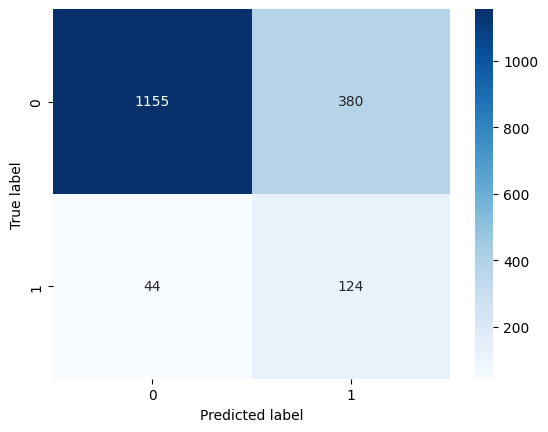

In [43]:
from sklearn.naive_bayes import GaussianNB

# Define the classifier
NB = Pipeline([
    ('classifier', GaussianNB())
])

# Train the classifier on the training data
NB.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = NB.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_OverSample_df .loc["f2_score", "NB"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_OverSample_df .loc["accuracy", "NB"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_OverSample_df.loc['precision', "NB"] = precision__score
print('precision:',precision__score)

# calculate the Recall
recall__score = recall_score(Y_test, y_pred)
evaluation_OverSample_df .loc['recall', "NB"] = recall__score
print('Recall', recall__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')
print(con_matrix)

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__penalty': None, 'classifier__solver': 'newton-cg'}
The best parameter's score 0.9902808658573676
f2 score: 0.42152230971128607
accuracy: 0.8549618320610687
precision: 0.3244444444444444
Recall 0.43452380952380953
confusion matrix


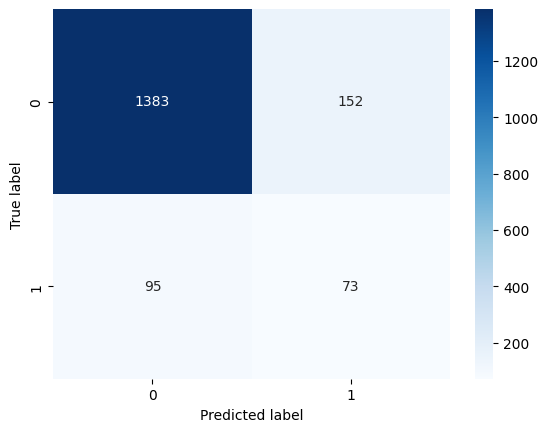

In [44]:
from sklearn.linear_model import LogisticRegression

# Define the classifier
Logistic = Pipeline([
    ('classifier', LogisticRegression())
])

param_grid = {'classifier__penalty': ['l1', 'l2', 'elasticnet', None],
'classifier__solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
scorer = make_scorer(custom_scorer, greater_is_better=True)

Logistic_cv = GridSearchCV(Logistic, param_grid, cv=5, scoring=scorer)
Logistic_cv.fit(X_train, Y_train)

print('The best parameter', Logistic_cv.best_params_)
print("The best parameter's score", Logistic_cv.best_score_)

best_params = Logistic_cv.best_params_
Logistic.set_params(**best_params)

# Train the classifier on the training data
Logistic.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = Logistic.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_OverSample_df .loc["f2_score", "Logistic"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_OverSample_df .loc["accuracy", "Logistic"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_OverSample_df.loc['precision', "Logistic"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_OverSample_df .loc['recall', "Logistic"] = recall__score
print('Recall',recall__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()



The best parameter {'classifier__solver': 'svd'}
The best parameter's score 0.9407498790557159
f2 score: 0.6824224519940916
accuracy: 0.8432178508514386
precision: 0.358974358974359
Recall 0.75
confusion matrix


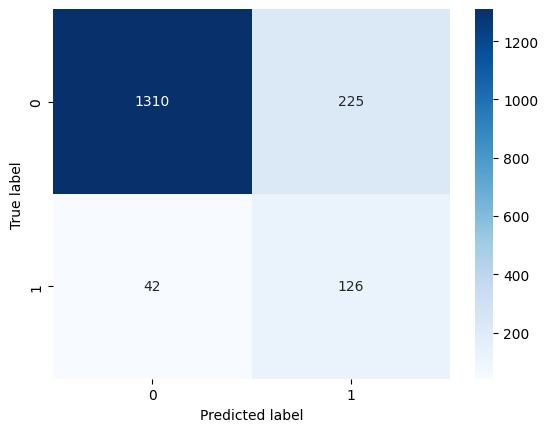

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define the classifier
LDA = Pipeline([
    ('classifier', LinearDiscriminantAnalysis())
])


param_grid = {'classifier__solver': ['svd', 'lsqr', 'eigen']}

scorer = make_scorer(custom_scorer, greater_is_better=True)

LDA_cv = GridSearchCV(LDA, param_grid, cv=5, scoring=scorer)
LDA_cv.fit(X_train, Y_train)

print('The best parameter', LDA_cv.best_params_)
print("The best parameter's score", LDA_cv.best_score_)

best_params = LDA_cv.best_params_
LDA.set_params(**best_params)

# Train the classifier on the training data
LDA.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = LDA.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_OverSample_df .loc["f2_score", "LDA"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_OverSample_df .loc["accuracy", "LDA"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_OverSample_df.loc['precision', "LDA"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_OverSample_df .loc['recall', "LDA"] = recall__score
print('Recall', recall__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__learning_rate': 1.0, 'classifier__n_estimators': 20}
The best parameter's score 0.731977912283404
f2 score: 0.6580310880829016
accuracy: 0.7903699354081033
precision: 0.2866817155756208
Recall 0.7559523809523809
confusion matrix


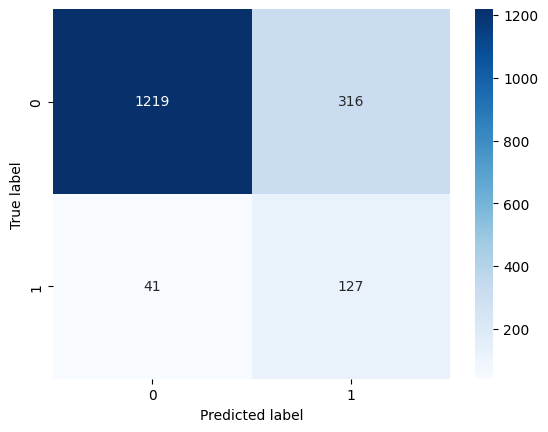

In [46]:
from sklearn.ensemble import AdaBoostClassifier

# Define the classifier
AdaBoost = Pipeline([
    ('classifier',AdaBoostClassifier( random_state=0))
])

param_grid = {'classifier__n_estimators': np.arange(0, 25, 5),
              'classifier__learning_rate' : np.arange(0, 1.1, 0.1) }

scorer = make_scorer(custom_scorer, greater_is_better=True)

AdaBoost_cv = GridSearchCV(AdaBoost, param_grid, cv=5, scoring=scorer)
AdaBoost_cv.fit(X_train, Y_train)

print('The best parameter', AdaBoost_cv.best_params_)
print("The best parameter's score", AdaBoost_cv.best_score_)

best_params = AdaBoost_cv.best_params_
AdaBoost.set_params(**best_params)

# Train the classifier on the training data
AdaBoost.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = AdaBoost.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_OverSample_df .loc["f2_score", "AdaBoost"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_OverSample_df .loc["accuracy", "AdaBoost"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_OverSample_df.loc['precision', "AdaBoost"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_OverSample_df .loc['recall', "AdaBoost"] = recall__score
print('Recall',recall__score)


labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__learning_rate': 0.4}
The best parameter's score 0.9965130102846441
f2 score: 0.619718309859155
accuracy: 0.9260129183793306
precision: 0.6265060240963856
Recall 0.6190476190476191
confusion matrix


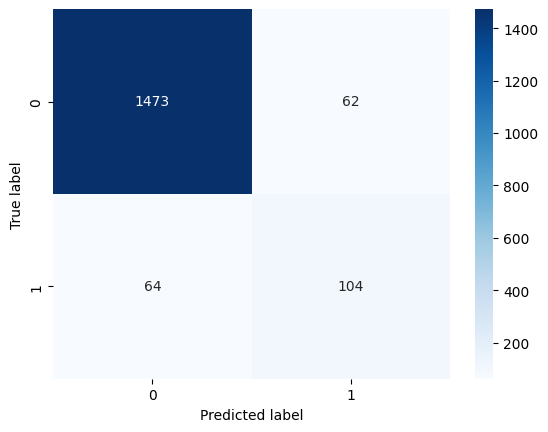

In [47]:
import xgboost as xgb

# Define the classifier
XGB = Pipeline([
    ('classifier',xgb.XGBClassifier())
])

param_grid = {'classifier__learning_rate':[0.1,0.4,0.7] }

scorer = make_scorer(custom_scorer, greater_is_better=True)

XGB_cv = GridSearchCV(XGB, param_grid, cv=5, scoring=scorer)
XGB_cv.fit(X_train, Y_train)

print('The best parameter', XGB_cv.best_params_)
print("The best parameter's score", XGB_cv.best_score_)

best_params = XGB_cv.best_params_
XGB.set_params(**best_params)

# Train the classifier on the training data
XGB.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = XGB.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_OverSample_df .loc["f2_score", "XGB"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_OverSample_df .loc["accuracy", "XGB"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_OverSample_df.loc['precision', "XGB"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_OverSample_df .loc['recall', "XGB"] = recall__score
print('Recall',recall__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__fit_intercept': True}
The best parameter's score nan
f2 score: 0.6824224519940916
accuracy: 0.8432178508514386
precision: 0.358974358974359
0.75
confusion matrix


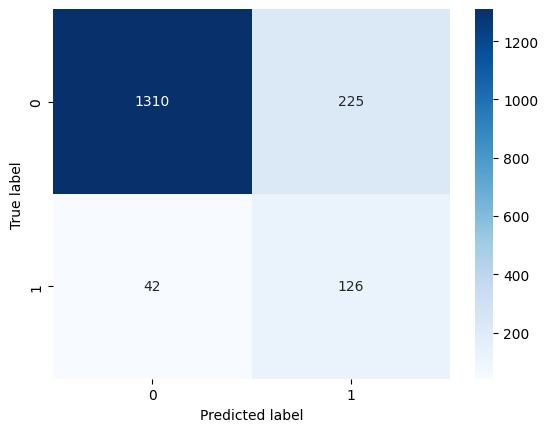

In [48]:
from sklearn.linear_model import LinearRegression

# Define the classifier
LR = Pipeline([
    ('classifier', LinearRegression())
])


param_grid = {'classifier__fit_intercept': [True, False]}

scorer = make_scorer(custom_scorer, greater_is_better=True)

LR_cv = GridSearchCV(LR, param_grid, cv=5, scoring=scorer)
LR_cv.fit(X_train, Y_train)

print('The best parameter', LR_cv.best_params_)
print("The best parameter's score", LR_cv.best_score_)

best_params = LR_cv.best_params_
LR.set_params(**best_params)

# Train the classifier on the training data
LR.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred_prob = LR.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_OverSample_df .loc["f2_score", "LR"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_OverSample_df .loc["accuracy", "LR"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_OverSample_df.loc['precision', "LR"] = precision__score
print('precision:',precision__score)

# Recall
recall__score = recall_score(Y_test, y_pred)
evaluation_OverSample_df .loc['recall', "LR"] = recall__score
print(recall__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

2023-04-21 22:17:18.269934: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - 0s 3ms/step


2023-04-21 22:18:56.261929: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Accuracy: 0.9330593071051086
Recall: 0.5416666666666666
Precision: 0.7109375
F2 Score: 0.5536504424778761
confusion matrix


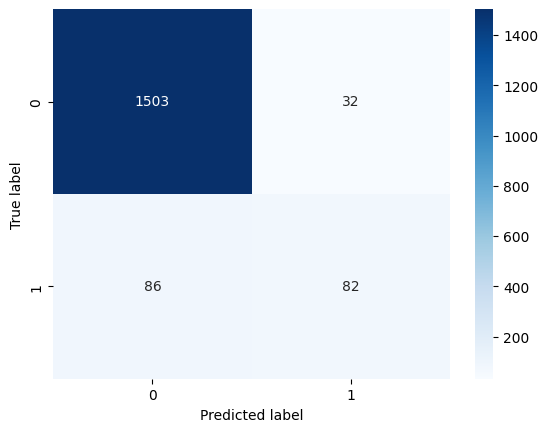

In [49]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam



# Set the input size, hidden size, and number of classes
input_size = X_train.shape[1]
hidden_size = 500
num_classes = 2

# Create the MLP model
model = Sequential([
    Dense(hidden_size, activation='relu', input_shape=(input_size,)),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
with tf.device("/GPU:0"):
    model.fit(X_train, Y_train, epochs=100, batch_size=64, verbose=0)

# Evaluate the model using the test data
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Calculate evaluation metrics
evaluation_OverSample_df.loc["accuracy", "MLP"] = accuracy_score(Y_test, y_pred)
evaluation_OverSample_df.loc["recall", "MLP"] = recall_score(Y_test, y_pred)
evaluation_OverSample_df.loc["precision", "MLP"] = precision_score(Y_test, y_pred)
evaluation_OverSample_df.loc["f2_score", "MLP"] = custom_scorer(Y_test, y_pred)

print("Accuracy:", evaluation_df.loc["accuracy", "MLP"])
print("Recall:", evaluation_df.loc["recall", "MLP"])
print("Precision:", evaluation_df.loc["precision", "MLP"])
print("F2 Score:", evaluation_df.loc["f2_score", "MLP"])

labels = [0, 1]
con_matrix = confusion_matrix(Y_test, y_pred, labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

In [50]:
evaluation_OverSample_df .T.sort_values(by =['recall'] , ascending=False)

,f2_score,accuracy,precision,recall
AdaBoost,0.658031,0.79037,0.286682,0.755952
LDA,0.682422,0.843218,0.358974,0.75
LR,0.682422,0.843218,0.358974,0.75
NB,0.624542,0.751028,0.246032,0.738095
SVC,0.717647,0.933059,0.642105,0.72619
KNN,0.658369,0.91192,0.543269,0.672619
XGB,0.619718,0.926013,0.626506,0.619048
GB,0.60298,0.905461,0.517588,0.613095
DT,0.581675,0.884909,0.43913,0.60119
MLP,0.502787,0.930711,0.719298,0.488095


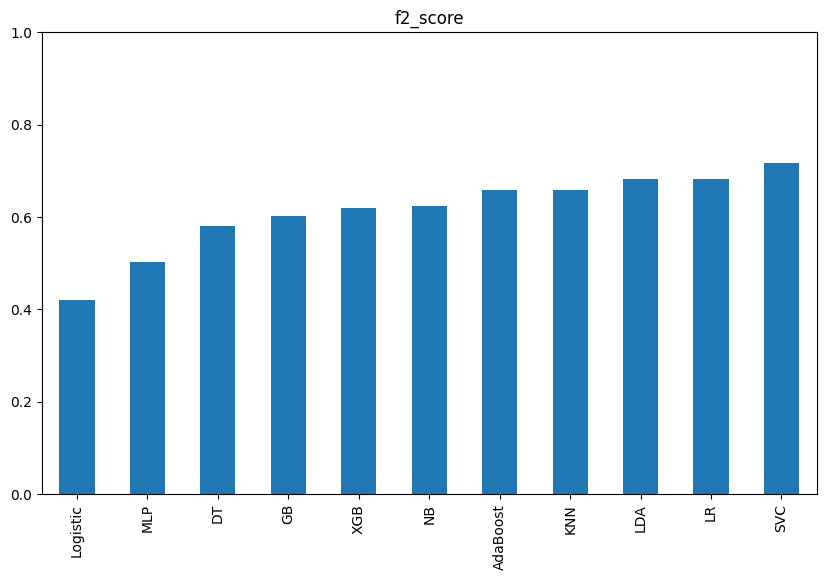

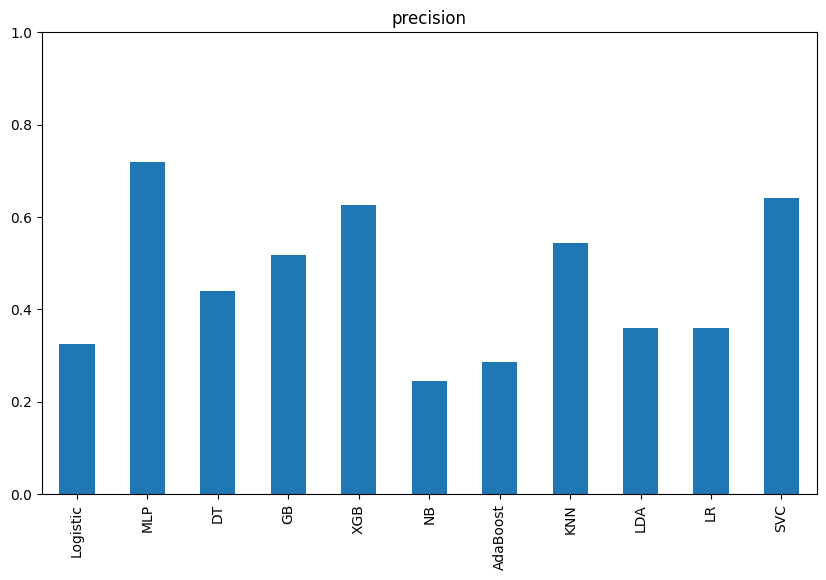

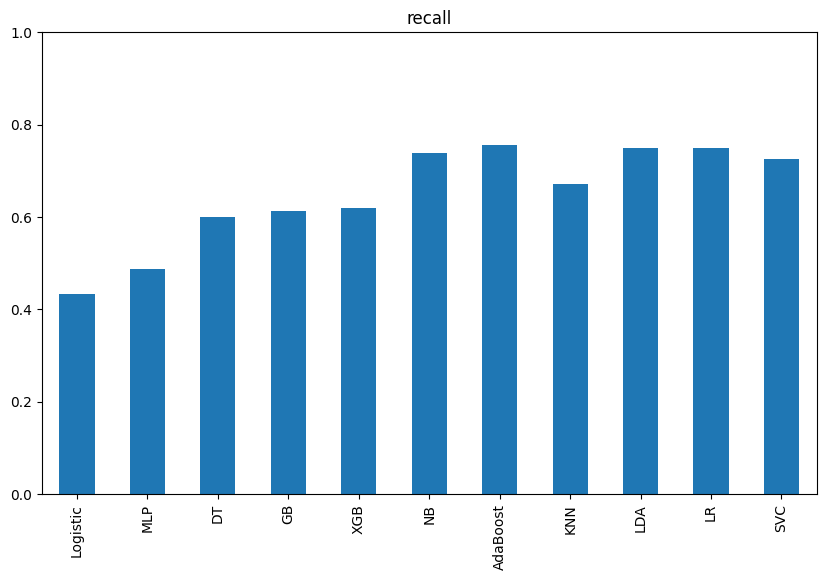

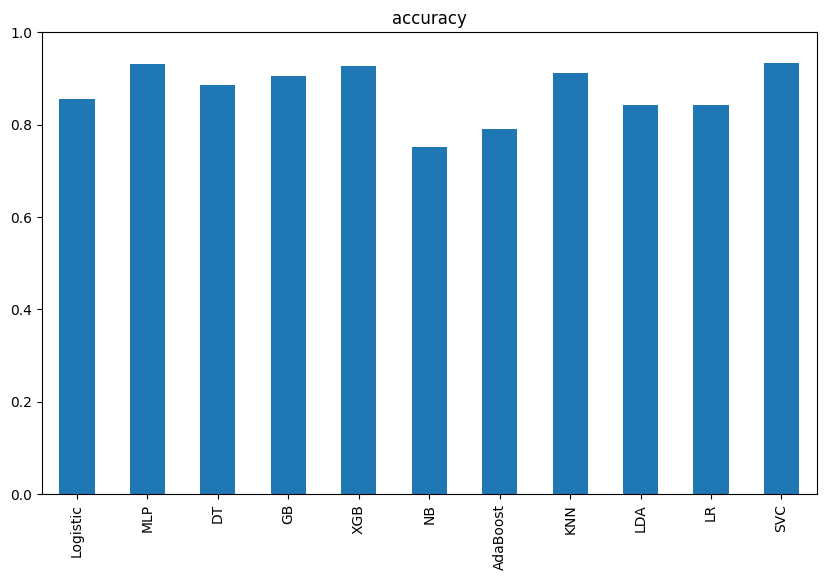

In [51]:
evaluation_OverSample_df.T.sort_values(by =['f2_score'])['f2_score'].plot(kind='bar', figsize=(10, 6))
plt.title('f2_score')
plt.ylim(0, 1)
plt.show()
evaluation_OverSample_df.T.sort_values(by =['f2_score'])['precision'].plot(kind='bar', figsize=(10, 6))
plt.title('precision')
plt.ylim(0, 1)
plt.show()

evaluation_OverSample_df.T.sort_values(by =['f2_score'])['recall'].plot(kind='bar', figsize=(10, 6))
plt.title('recall')
plt.ylim(0, 1)
plt.show()

evaluation_OverSample_df.T.sort_values(by =['f2_score'])['accuracy'].plot(kind='bar', figsize=(10, 6))
plt.title('accuracy')
plt.ylim(0, 1)
plt.show()


# Feature selection by SelectKBest in sklearn, using chi2

In [52]:
from sklearn.feature_selection import SelectKBest , mutual_info_regression ,chi2 , mutual_info_regression ,SelectFdr ,SelectFwe ,GenericUnivariateSelect ,f_regression
from sklearn.model_selection import train_test_split

df = pd.read_csv('qsar_oral_toxicity.csv',delimiter= ';', header = None)

def convert_zero_one(word):
    if word == 'negative':
        return 0
    else:
        return 1
    
print(df.shape)

print('Number of duplicated observation in the dataset', df.duplicated().sum())

df = df.drop_duplicates()

X = df.iloc[:,:-1]
Y = df.iloc[:,-1].apply(convert_zero_one)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=8)

# resapling 
rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
X_train, Y_train = rus.fit_resample(X_train, Y_train)

selector = SelectKBest(chi2  , k=300) 
X_train_new = selector.fit_transform(X_train, Y_train)
X_test_new = selector.transform(X_test)

X_train = X_train_new.copy()
X_test = X_test_new.copy()

print(X_train.shape)
print(X_test.shape)

evaluation_SelectKBest_df = pd.DataFrame(index=['f2_score', 'accuracy','precision', 'recall'], columns=['DT', 'KNN', 'SVC', 'GB','NB','Logistic', 'LDA','AdaBoost' ,'XGB', 'LR','MLP'])


(8992, 1025)
Number of duplicated observation in the dataset 477
(1102, 300)
(1703, 300)


The best parameter {'classifier__max_depth': 30, 'classifier__min_samples_leaf': 10, 'classifier__min_samples_split': 1}
The best parameter's score 0.7052768853762795
f2 score: 0.6252842201000455
accuracy: 0.7433940105695831
precision: 0.24084778420038536
Recall 0.7440476190476191
confusion matrix


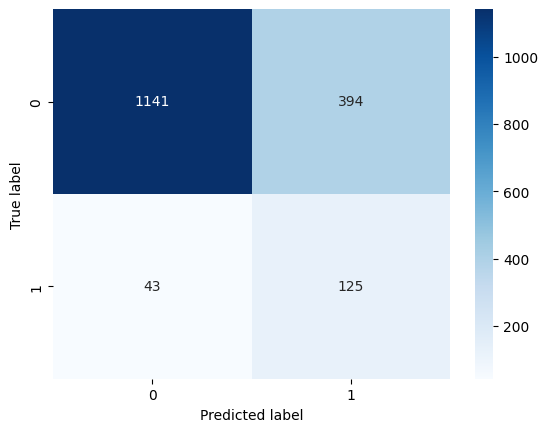

In [53]:
# Import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss, matthews_corrcoef,  cohen_kappa_score
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import confusion_matrix


# Define the classifier
DT = Pipeline([
    ('classifier', DecisionTreeClassifier())
])


param_grid = {'classifier__max_depth': [1, 10, 20, 30],
              'classifier__min_samples_split': [1, 10,  20],
              'classifier__min_samples_leaf': [1,10,20]}

scorer = make_scorer(custom_scorer, greater_is_better=True)

DT_cv = GridSearchCV(DT, param_grid, cv=5, scoring=scorer)
DT_cv.fit(X_train, Y_train)

print('The best parameter', DT_cv.best_params_)
print("The best parameter's score", DT_cv.best_score_)

best_params = DT_cv.best_params_
DT.set_params(**best_params)

# Train the classifier on the training data
DT.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = DT.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_SelectKBest_df.loc["f2_score", "DT"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_SelectKBest_df.loc["accuracy", "DT"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_SelectKBest_df.loc['precision', "DT"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_SelectKBest_df.loc['recall', "DT"] = recall__score
print('Recall', recall__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__n_neighbors': 5}
The best parameter's score 0.7266154268635232
f2 score: 0.6777011494252875
accuracy: 0.7680563711098062
precision: 0.27070707070707073
Recall 0.7976190476190477
confusion matrix


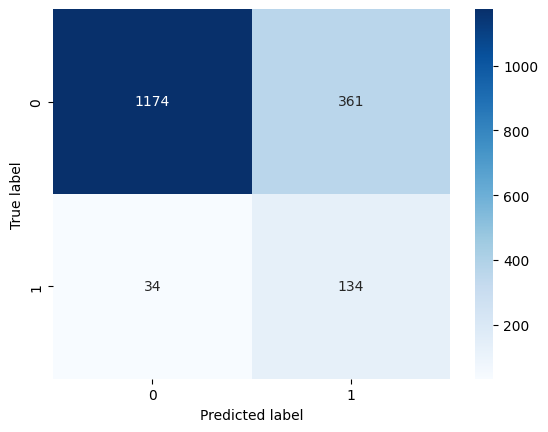

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Define the classifier
KNN = Pipeline([
    ('classifier', KNeighborsClassifier())
])

param_grid = {'classifier__n_neighbors': range(30)}

scorer = make_scorer(custom_scorer, greater_is_better=True)

KNN_cv = GridSearchCV(KNN, param_grid, cv=5, scoring=scorer)
KNN_cv.fit(X_train, Y_train)

print('The best parameter', KNN_cv.best_params_)
print("The best parameter's score", KNN_cv.best_score_)

best_params = KNN_cv.best_params_
KNN.set_params(**best_params)

# Train the classifier on the training data
KNN.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = KNN.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_SelectKBest_df.loc["f2_score", "KNN"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_SelectKBest_df.loc["accuracy", "KNN"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_SelectKBest_df.loc['precision', "KNN"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_SelectKBest_df.loc['recall', "KNN"] = recall__score
print('Recall',recall__score)

labels = [0,1]


# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__kernel': 'rbf'}
The best parameter's score 0.7069089672641851
f2 score: 0.7098549274637319
accuracy: 0.8655314151497357
precision: 0.4043887147335423
Recall 0.7678571428571429
confusion matrix


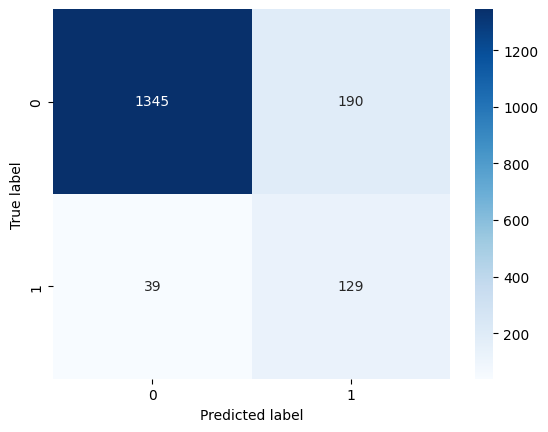

In [55]:
from sklearn.svm import SVC


# Define the classifier
SVC = Pipeline([
    ('classifier', SVC(  random_state=42))
])

param_grid = {'classifier__kernel': ['rbf','sigmoid']}

scorer = make_scorer(custom_scorer, greater_is_better=True)

SVC_cv = GridSearchCV(SVC, param_grid, cv=5, scoring=scorer)
SVC_cv.fit(X_train, Y_train)

print('The best parameter', SVC_cv.best_params_)
print("The best parameter's score", SVC_cv.best_score_)

best_params = SVC_cv.best_params_
SVC.set_params(**best_params)

# Train the classifier on the training data
SVC.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = SVC.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_SelectKBest_df.loc["f2_score", "SVC"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_SelectKBest_df.loc["accuracy", "SVC"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_SelectKBest_df.loc['precision', "SVC"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_SelectKBest_df.loc['recall', "SVC"] = recall__score
print('Recall',recall__score)


labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__learning_rate': 0.6000000000000001}
The best parameter's score 0.7653769654800759
f2 score: 0.7076923076923075
accuracy: 0.7903699354081033
precision: 0.2967741935483871
Recall 0.8214285714285714
confusion matrix


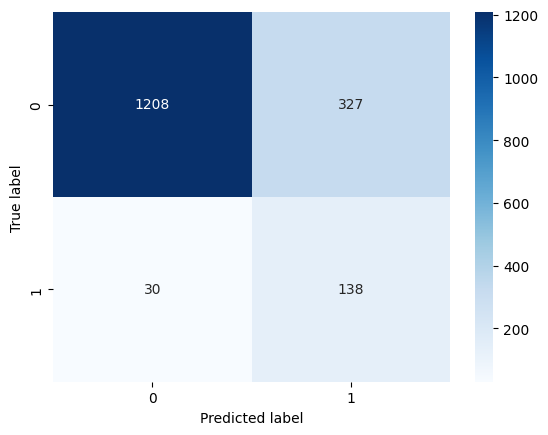

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# Define the classifier
GB = Pipeline([
    ('classifier', GradientBoostingClassifier())
])

param_grid = {'classifier__learning_rate': np.arange(0, 1.1, 0.1) }

scorer = make_scorer(custom_scorer, greater_is_better=True)

GB_cv = GridSearchCV(GB, param_grid, cv=5, scoring=scorer)
GB_cv.fit(X_train, Y_train)

print('The best parameter', GB_cv.best_params_)
print("The best parameter's score", GB_cv.best_score_)

best_params = GB_cv.best_params_
GB.set_params(**best_params)

# Train the classifier on the training data
GB.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = GB.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_SelectKBest_df.loc["f2_score", "GB"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_SelectKBest_df.loc["accuracy", "GB"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_SelectKBest_df.loc['precision', "GB"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_SelectKBest_df.loc['recall', "GB"] = recall__score
print('Recall', recall__score)


labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

f2 score: 0.6077065923862582
accuracy: 0.7627715795654727
precision: 0.2510548523206751
Recall 0.7083333333333334
confusion matrix
[[1180  355]
 [  49  119]]


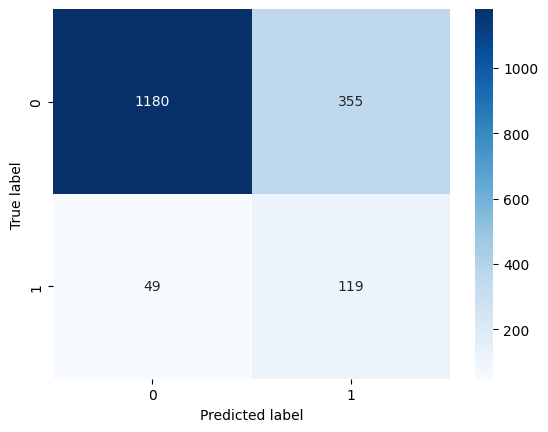

In [57]:
from sklearn.naive_bayes import GaussianNB

# Define the classifier
NB = Pipeline([
    ('classifier', GaussianNB())
])

# Train the classifier on the training data
NB.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = NB.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_SelectKBest_df.loc["f2_score", "NB"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_SelectKBest_df.loc["accuracy", "NB"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_SelectKBest_df.loc['precision', "NB"] = precision__score
print('precision:',precision__score)

# calculate the Recall
recall__score = recall_score(Y_test, y_pred)
evaluation_SelectKBest_df.loc['recall', "NB"] = recall__score
print('Recall', recall__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')
print(con_matrix)

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
The best parameter's score 0.744433015564864
f2 score: 0.6651162790697676
accuracy: 0.7780387551379918
precision: 0.2765957446808511
Recall 0.7738095238095238
confusion matrix


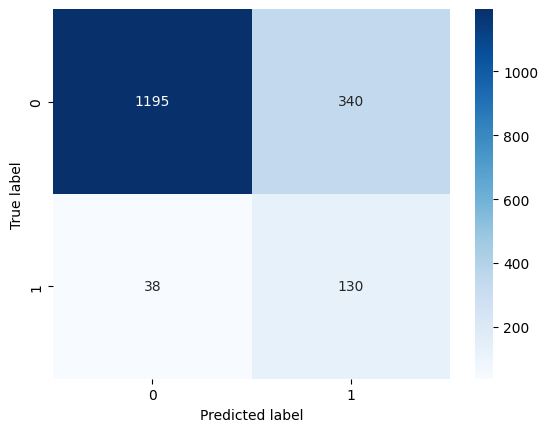

In [58]:
from sklearn.linear_model import LogisticRegression

# Define the classifier
Logistic = Pipeline([
    ('classifier', LogisticRegression())
])

param_grid = {'classifier__penalty': ['l1', 'l2', 'elasticnet', None],
'classifier__solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
scorer = make_scorer(custom_scorer, greater_is_better=True)

Logistic_cv = GridSearchCV(Logistic, param_grid, cv=5, scoring=scorer)
Logistic_cv.fit(X_train, Y_train)

print('The best parameter', Logistic_cv.best_params_)
print("The best parameter's score", Logistic_cv.best_score_)

best_params = Logistic_cv.best_params_
Logistic.set_params(**best_params)

# Train the classifier on the training data
Logistic.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = Logistic.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_SelectKBest_df.loc["f2_score", "Logistic"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_SelectKBest_df.loc["accuracy", "Logistic"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_SelectKBest_df.loc['precision', "Logistic"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_SelectKBest_df.loc['recall', "Logistic"] = recall__score
print('Recall',recall__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__solver': 'svd'}
The best parameter's score 0.7359827990984813
f2 score: 0.6172953081876724
accuracy: 0.7545507927187316
precision: 0.24696356275303644
Recall 0.7261904761904762
confusion matrix


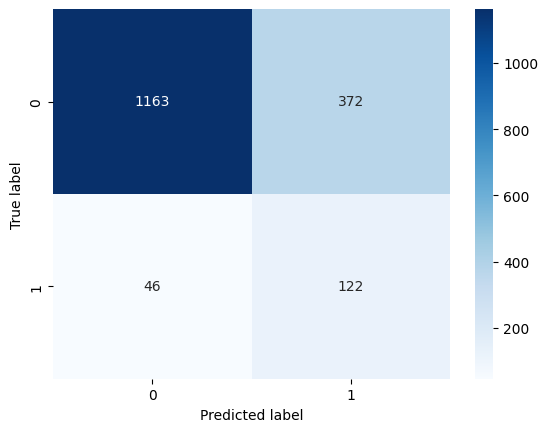

In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define the classifier
LDA = Pipeline([
    ('classifier', LinearDiscriminantAnalysis())
])


param_grid = {'classifier__solver': ['svd', 'lsqr', 'eigen']}

scorer = make_scorer(custom_scorer, greater_is_better=True)

LDA_cv = GridSearchCV(LDA, param_grid, cv=5, scoring=scorer)
LDA_cv.fit(X_train, Y_train)

print('The best parameter', LDA_cv.best_params_)
print("The best parameter's score", LDA_cv.best_score_)

best_params = LDA_cv.best_params_
LDA.set_params(**best_params)

# Train the classifier on the training data
LDA.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = LDA.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_SelectKBest_df.loc["f2_score", "LDA"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_SelectKBest_df.loc["accuracy", "LDA"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_SelectKBest_df.loc['precision', "LDA"] = precision__score
print('precision:',precision__score)


recall__score = recall_score(Y_test, y_pred)
evaluation_SelectKBest_df.loc['recall', "LDA"] = recall__score
print('Recall', recall__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__learning_rate': 0.8, 'classifier__n_estimators': 20}
The best parameter's score 0.6831263500733776
f2 score: 0.6105410447761194
accuracy: 0.7686435701702877
precision: 0.25646551724137934
Recall 0.7083333333333334
confusion matrix


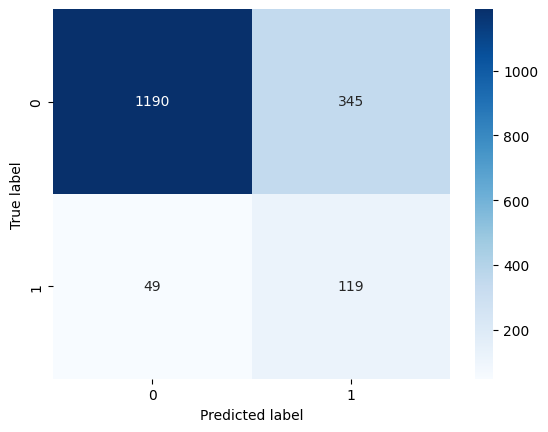

In [60]:
from sklearn.ensemble import AdaBoostClassifier

# Define the classifier
AdaBoost = Pipeline([
    ('classifier',AdaBoostClassifier( random_state=0))
])

param_grid = {'classifier__n_estimators': np.arange(0, 25, 5),
              'classifier__learning_rate' : np.arange(0, 1.1, 0.1) }

scorer = make_scorer(custom_scorer, greater_is_better=True)

AdaBoost_cv = GridSearchCV(AdaBoost, param_grid, cv=5, scoring=scorer)
AdaBoost_cv.fit(X_train, Y_train)

print('The best parameter', AdaBoost_cv.best_params_)
print("The best parameter's score", AdaBoost_cv.best_score_)

best_params = AdaBoost_cv.best_params_
AdaBoost.set_params(**best_params)

# Train the classifier on the training data
AdaBoost.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = AdaBoost.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_SelectKBest_df.loc["f2_score", "AdaBoost"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_SelectKBest_df.loc["accuracy", "AdaBoost"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_SelectKBest_df.loc['precision', "AdaBoost"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_SelectKBest_df.loc['recall', "AdaBoost"] = recall__score
print('Recall',recall__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__learning_rate': 0.4}
The best parameter's score 0.773419823606773
f2 score: 0.7162790697674419
accuracy: 0.7897827363476219
precision: 0.2978723404255319
Recall 0.8333333333333334
confusion matrix


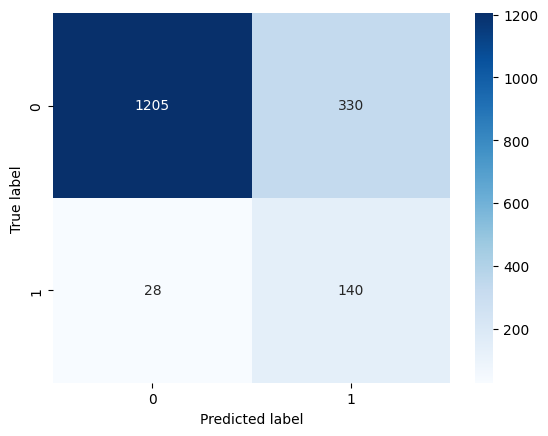

In [61]:
import xgboost as xgb

# Define the classifier
XGB = Pipeline([
    ('classifier',xgb.XGBClassifier())
])

param_grid = {'classifier__learning_rate':[0.1,0.4,0.7] }

scorer = make_scorer(custom_scorer, greater_is_better=True)

XGB_cv = GridSearchCV(XGB, param_grid, cv=5, scoring=scorer)
XGB_cv.fit(X_train, Y_train)

print('The best parameter', XGB_cv.best_params_)
print("The best parameter's score", XGB_cv.best_score_)

best_params = XGB_cv.best_params_
XGB.set_params(**best_params)

# Train the classifier on the training data
XGB.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = XGB.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_SelectKBest_df.loc["f2_score", "XGB"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_SelectKBest_df.loc["accuracy", "XGB"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_SelectKBest_df.loc['precision', "XGB"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_SelectKBest_df.loc['recall', "XGB"] = recall__score
print('Recall',recall__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__fit_intercept': True}
The best parameter's score nan
f2 score: 0.6172953081876724
accuracy: 0.7545507927187316
precision: 0.24696356275303644
0.7261904761904762
confusion matrix


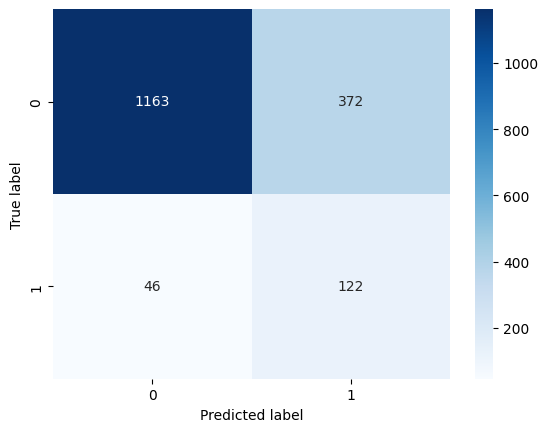

In [62]:
from sklearn.linear_model import LinearRegression

# Define the classifier
LR = Pipeline([
    ('classifier', LinearRegression())
])


param_grid = {'classifier__fit_intercept': [True, False]}

scorer = make_scorer(custom_scorer, greater_is_better=True)

LR_cv = GridSearchCV(LR, param_grid, cv=5, scoring=scorer)
LR_cv.fit(X_train, Y_train)

print('The best parameter', LR_cv.best_params_)
print("The best parameter's score", LR_cv.best_score_)

best_params = LR_cv.best_params_
LR.set_params(**best_params)

# Train the classifier on the training data
LR.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred_prob = LR.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_SelectKBest_df.loc["f2_score", "LR"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_SelectKBest_df.loc["accuracy", "LR"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_SelectKBest_df.loc['precision', "LR"] = precision__score
print('precision:',precision__score)

# Recall
recall__score = recall_score(Y_test, y_pred)
evaluation_SelectKBest_df.loc['recall', "LR"] = recall__score
print(recall__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

2023-04-21 22:19:59.073773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - 0s 3ms/step


2023-04-21 22:20:08.891162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Accuracy: 0.9330593071051086
Recall: 0.5416666666666666
Precision: 0.7109375
F2 Score: 0.5536504424778761
confusion matrix


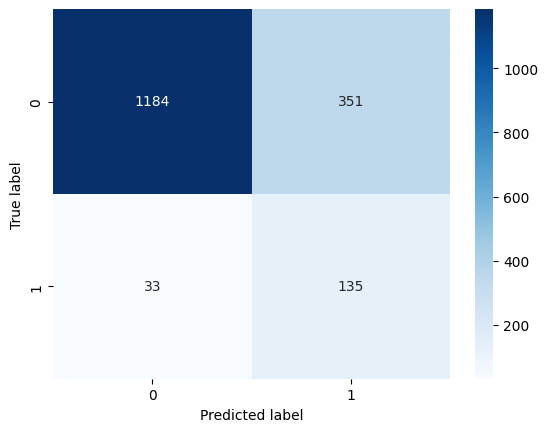

In [63]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam



# Set the input size, hidden size, and number of classes
input_size = X_train.shape[1]
hidden_size = 500
num_classes = 2

# Create the MLP model
model = Sequential([
    Dense(hidden_size, activation='relu', input_shape=(input_size,)),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
with tf.device("/GPU:0"):
    model.fit(X_train, Y_train, epochs=100, batch_size=64, verbose=0)

# Evaluate the model using the test data
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Calculate evaluation metrics
evaluation_SelectKBest_df.loc["accuracy", "MLP"] = accuracy_score(Y_test, y_pred)
evaluation_SelectKBest_df.loc["recall", "MLP"] = recall_score(Y_test, y_pred)
evaluation_SelectKBest_df.loc["precision", "MLP"] = precision_score(Y_test, y_pred)
evaluation_SelectKBest_df.loc["f2_score", "MLP"] = custom_scorer(Y_test, y_pred)

print("Accuracy:", evaluation_df.loc["accuracy", "MLP"])
print("Recall:", evaluation_df.loc["recall", "MLP"])
print("Precision:", evaluation_df.loc["precision", "MLP"])
print("F2 Score:", evaluation_df.loc["f2_score", "MLP"])

labels = [0, 1]
con_matrix = confusion_matrix(Y_test, y_pred, labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

In [64]:
evaluation_SelectKBest_df.T.sort_values(by =['recall'] , ascending=False)

,f2_score,accuracy,precision,recall
XGB,0.716279,0.789783,0.297872,0.833333
GB,0.707692,0.79037,0.296774,0.821429
MLP,0.685596,0.774516,0.277778,0.803571
KNN,0.677701,0.768056,0.270707,0.797619
Logistic,0.665116,0.778039,0.276596,0.77381
SVC,0.709855,0.865531,0.404389,0.767857
DT,0.625284,0.743394,0.240848,0.744048
LDA,0.617295,0.754551,0.246964,0.72619
LR,0.617295,0.754551,0.246964,0.72619
NB,0.607707,0.762772,0.251055,0.708333


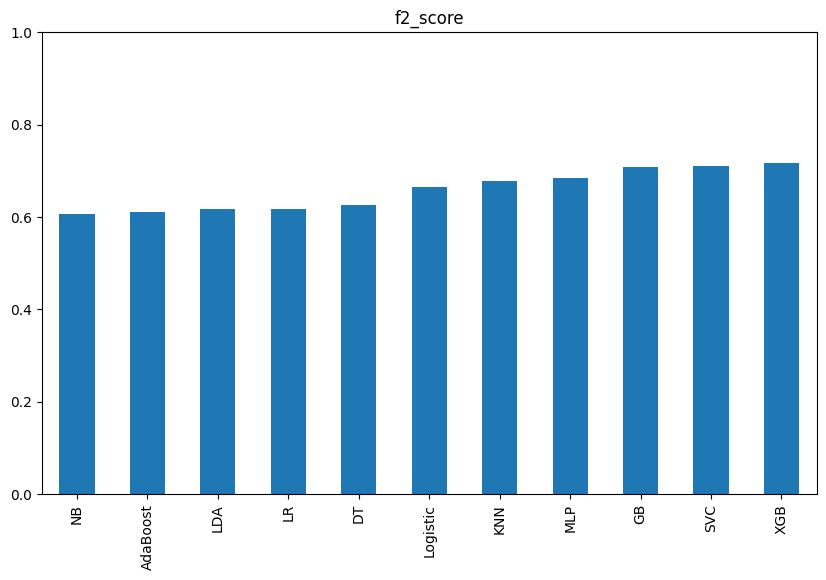

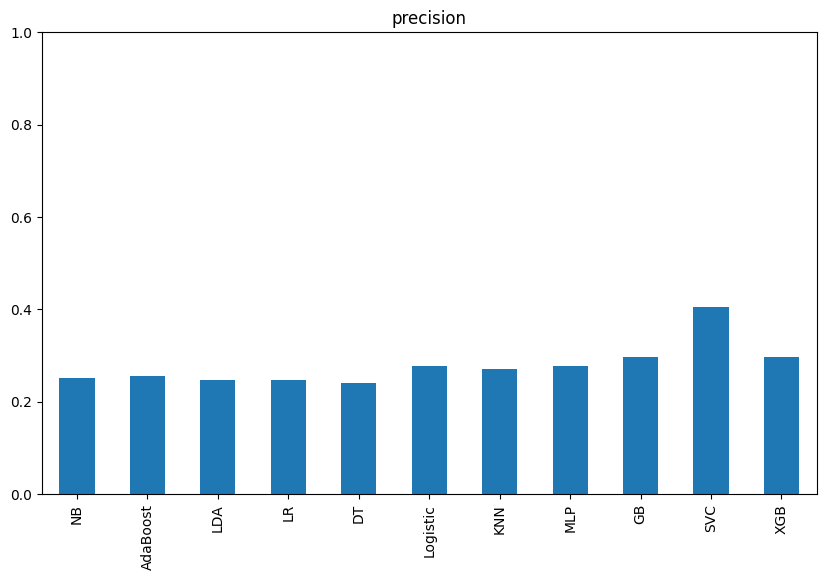

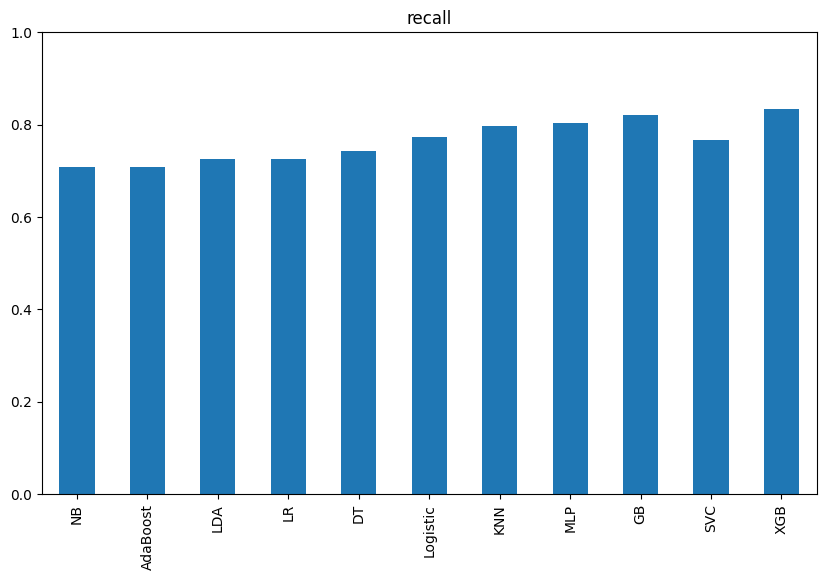

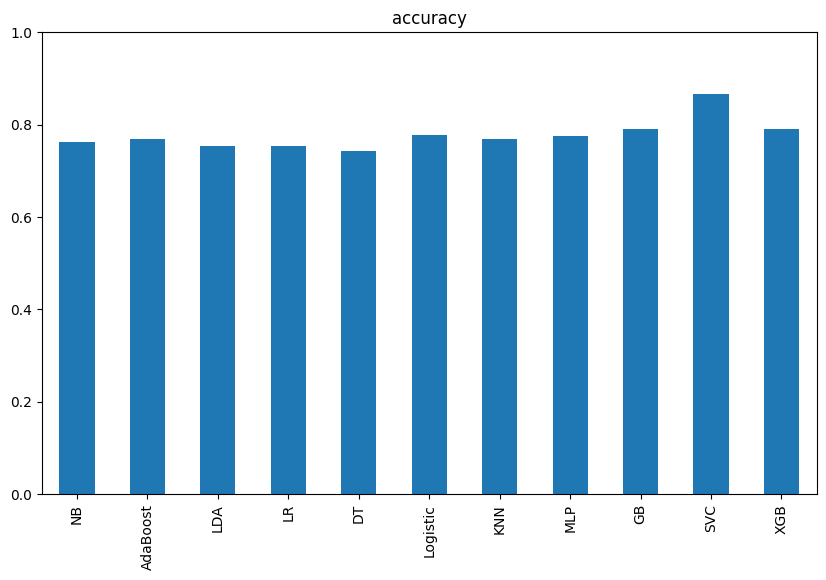

In [65]:
evaluation_SelectKBest_df.T.sort_values(by =['f2_score'])['f2_score'].plot(kind='bar', figsize=(10, 6))
plt.title('f2_score')
plt.ylim(0, 1)
plt.show()

evaluation_SelectKBest_df.T.sort_values(by =['f2_score'])['precision'].plot(kind='bar', figsize=(10, 6))
plt.title('precision')
plt.ylim(0, 1)
plt.show()

evaluation_SelectKBest_df.T.sort_values(by =['f2_score'])['recall'].plot(kind='bar', figsize=(10, 6))
plt.title('recall')
plt.ylim(0, 1)
plt.show()

evaluation_SelectKBest_df.T.sort_values(by =['f2_score'])['accuracy'].plot(kind='bar', figsize=(10, 6))
plt.title('accuracy')
plt.ylim(0, 1)
plt.show()

# Dimension reduction by LDA

In [66]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


df = pd.read_csv('qsar_oral_toxicity.csv',delimiter= ';', header = None)

def convert_zero_one(word):
    if word == 'negative':
        return 0
    else:
        return 1
    
print(df.shape)

print('Number of duplicated observation in the dataset', df.duplicated().sum())

df = df.drop_duplicates()

X = df.iloc[:,:-1]
Y = df.iloc[:,-1].apply(convert_zero_one)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=8)

# resapling 
rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
X_train, Y_train = rus.fit_resample(X_train, Y_train)

lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train, Y_train)

X_train_new = lda.transform(X_train)
X_test_new = lda.transform(X_test)

X_train = X_train_new.copy()
X_test = X_test_new.copy()

print(X_train.shape)
print(X_test.shape)

evaluation_LDA_df = pd.DataFrame(index=['f2_score', 'accuracy','precision', 'recall'], columns=['DT', 'KNN', 'SVC', 'GB','NB','Logistic', 'LDA','AdaBoost' ,'XGB','MLP'])

(8992, 1025)
Number of duplicated observation in the dataset 477
(1102, 1)
(1703, 1)


The best parameter {'classifier__max_depth': 1, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 1}
The best parameter's score 0.9998348472336911
f2 score: 0.4652428810720268
accuracy: 0.6042278332354668
precision: 0.1426553672316384
Recall 0.6011904761904762
confusion matrix


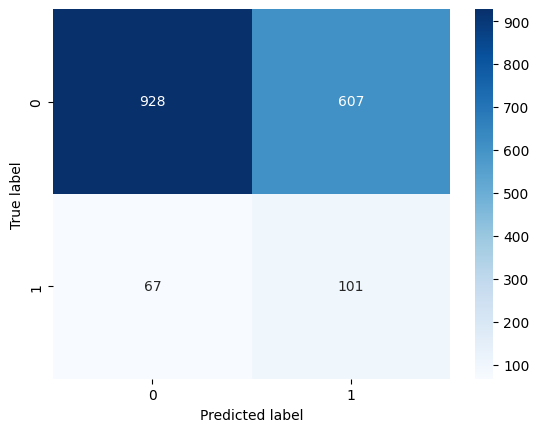

In [67]:
# Import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss, matthews_corrcoef,  cohen_kappa_score
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import confusion_matrix

# Define the classifier
DT = Pipeline([
    ('classifier', DecisionTreeClassifier())
])

param_grid = {'classifier__max_depth': [1, 10, 20, 30],
              'classifier__min_samples_split': [1, 10,  20],
              'classifier__min_samples_leaf': [1,10,20]}

scorer = make_scorer(custom_scorer, greater_is_better=True)

DT_cv = GridSearchCV(DT, param_grid, cv=5, scoring=scorer)
DT_cv.fit(X_train, Y_train)

print('The best parameter', DT_cv.best_params_)
print("The best parameter's score", DT_cv.best_score_)

best_params = DT_cv.best_params_
DT.set_params(**best_params)

# Train the classifier on the training data
DT.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = DT.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_LDA_df.loc["f2_score", "DT"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_LDA_df.loc["accuracy", "DT"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_LDA_df.loc['precision', "DT"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_LDA_df.loc['recall', "DT"] = recall__score
print('Recall',recall__score)

labels = [0,1]


# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()




The best parameter {'classifier__n_neighbors': 18}
The best parameter's score 1.0
f2 score: 0.46625514403292184
accuracy: 0.5819142689371697
precision: 0.13733333333333334
Recall 0.6130952380952381
confusion matrix


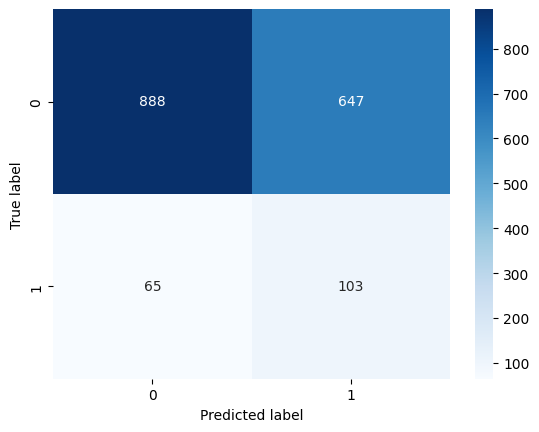

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Define the classifier
KNN = Pipeline([
    ('classifier', KNeighborsClassifier())
])

param_grid = {'classifier__n_neighbors': range(30)}

scorer = make_scorer(custom_scorer, greater_is_better=True)

KNN_cv = GridSearchCV(KNN, param_grid, cv=5, scoring=scorer)
KNN_cv.fit(X_train, Y_train)

print('The best parameter', KNN_cv.best_params_)
print("The best parameter's score", KNN_cv.best_score_)

best_params = KNN_cv.best_params_
KNN.set_params(**best_params)

# Train the classifier on the training data
KNN.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = KNN.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_LDA_df.loc["f2_score", "KNN"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_LDA_df.loc["accuracy", "KNN"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_LDA_df.loc['precision', "KNN"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_LDA_df.loc['recall', "KNN"] = recall__score
print('Recall',recall__score)


labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()



The best parameter {'classifier__kernel': 'rbf'}
The best parameter's score 0.9998348472336911
f2 score: 0.45898161244695895
accuracy: 0.3658250146799765
precision: 0.10278745644599303
Recall 0.7023809523809523
confusion matrix


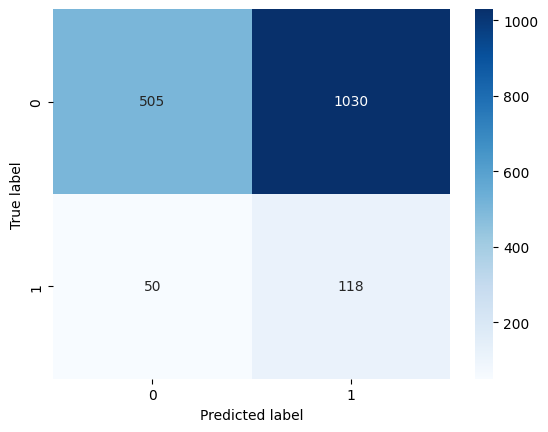

In [69]:
from sklearn.svm import SVC


# Define the classifier
SVC = Pipeline([
    ('classifier', SVC(  random_state=42))
])

param_grid = {'classifier__kernel': ['rbf','sigmoid']}

scorer = make_scorer(custom_scorer, greater_is_better=True)

SVC_cv = GridSearchCV(SVC, param_grid, cv=5, scoring=scorer)
SVC_cv.fit(X_train, Y_train)

print('The best parameter', SVC_cv.best_params_)
print("The best parameter's score", SVC_cv.best_score_)

best_params = SVC_cv.best_params_
SVC.set_params(**best_params)

# Train the classifier on the training data
SVC.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = SVC.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_LDA_df.loc["f2_score", "SVC"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_LDA_df.loc["accuracy", "SVC"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_LDA_df.loc['precision', "SVC"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_LDA_df.loc['recall', "SVC"] = recall__score
print('Recall',recall__score)

labels = [0,1]


# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__learning_rate': 0.1}
The best parameter's score 0.9998348472336911
f2 score: 0.4652428810720268
accuracy: 0.6042278332354668
precision: 0.1426553672316384
Recall 0.6011904761904762
confusion matrix


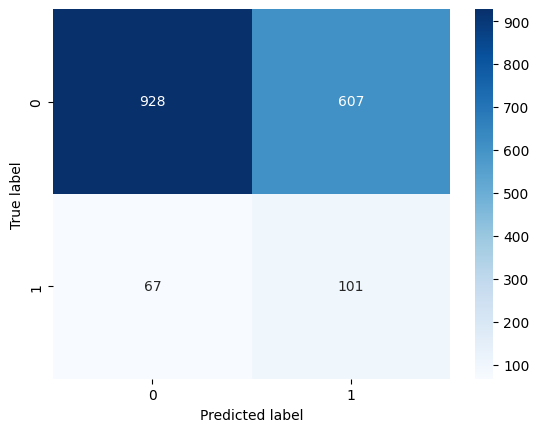

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# Define the classifier
GB = Pipeline([
    ('classifier', GradientBoostingClassifier())
])

param_grid = {'classifier__learning_rate': np.arange(0, 1.1, 0.1) }

scorer = make_scorer(custom_scorer, greater_is_better=True)

GB_cv = GridSearchCV(GB, param_grid, cv=5, scoring=scorer)
GB_cv.fit(X_train, Y_train)

print('The best parameter', GB_cv.best_params_)
print("The best parameter's score", GB_cv.best_score_)

best_params = GB_cv.best_params_
GB.set_params(**best_params)

# Train the classifier on the training data
GB.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = GB.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_LDA_df.loc["f2_score", "GB"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_LDA_df.loc["accuracy", "GB"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_LDA_df.loc['precision', "GB"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_LDA_df.loc['recall', "GB"] = recall__score
print('Recall',recall__score)


labels = [0,1]


# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()



f2 score: 0.4688379573783675
accuracy: 0.551967116852613
precision: 0.13135068153655513
confusion matrix


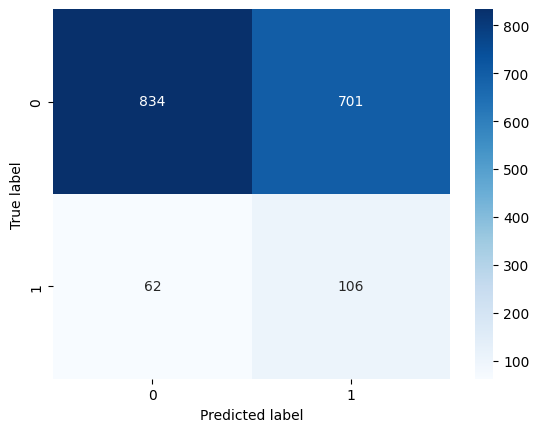

0.6309523809523809


In [71]:
from sklearn.naive_bayes import GaussianNB

# Define the classifier
NB = Pipeline([
    ('classifier', GaussianNB())
])

# Train the classifier on the training data
NB.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = NB.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_LDA_df.loc["f2_score", "NB"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_LDA_df.loc["accuracy", "NB"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_LDA_df.loc['precision', "NB"] = precision__score
print('precision:',precision__score)

labels = [0,1]


# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

recall__score = recall_score(Y_test, y_pred)
evaluation_LDA_df.loc['recall', "NB"] = recall__score
print(recall__score)


The best parameter {'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
The best parameter's score 1.0
f2 score: 0.46798843453118555
accuracy: 0.5871990604815033
precision: 0.13900134952766532
confusion matrix


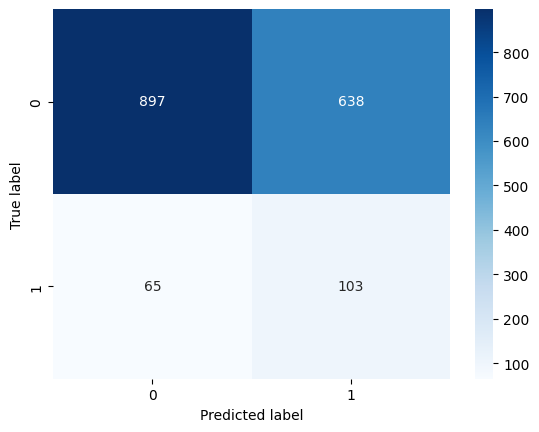

0.6130952380952381


In [72]:
from sklearn.linear_model import LogisticRegression

# Define the classifier
Logistic = Pipeline([
    ('classifier', LogisticRegression())
])

param_grid = {'classifier__penalty': ['l1', 'l2', 'elasticnet', None],
'classifier__solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
scorer = make_scorer(custom_scorer, greater_is_better=True)

Logistic_cv = GridSearchCV(Logistic, param_grid, cv=5, scoring=scorer)
Logistic_cv.fit(X_train, Y_train)

print('The best parameter', Logistic_cv.best_params_)
print("The best parameter's score", Logistic_cv.best_score_)

best_params = Logistic_cv.best_params_
Logistic.set_params(**best_params)

# Train the classifier on the training data
Logistic.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = Logistic.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_LDA_df.loc["f2_score", "Logistic"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_LDA_df.loc["accuracy", "Logistic"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_LDA_df.loc['precision', "Logistic"] = precision__score
print('precision:',precision__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

recall__score = recall_score(Y_test, y_pred)
evaluation_LDA_df.loc['recall', "Logistic"] = recall__score
print(recall__score)

The best parameter {'classifier__solver': 'svd'}
The best parameter's score 1.0
f2 score: 0.46798843453118555
accuracy: 0.5871990604815033
precision: 0.13900134952766532
Recall 0.6130952380952381
confusion matrix


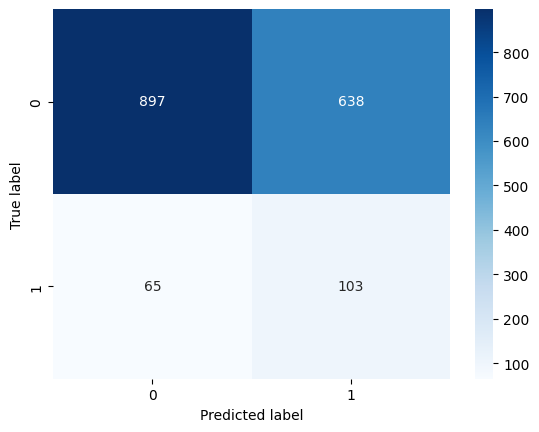

In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define the classifier
LDA = Pipeline([
    ('classifier', LinearDiscriminantAnalysis())
])


param_grid = {'classifier__solver': ['svd', 'lsqr', 'eigen']}

scorer = make_scorer(custom_scorer, greater_is_better=True)

LDA_cv = GridSearchCV(LDA, param_grid, cv=5, scoring=scorer)
LDA_cv.fit(X_train, Y_train)

print('The best parameter', LDA_cv.best_params_)
print("The best parameter's score", LDA_cv.best_score_)

best_params = LDA_cv.best_params_
LDA.set_params(**best_params)

# Train the classifier on the training data
LDA.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = LDA.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_LDA_df.loc["f2_score", "LDA"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_LDA_df.loc["accuracy", "LDA"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_LDA_df.loc['precision', "LDA"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_LDA_df.loc['recall', "LDA"] = recall__score
print('Recall', recall__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 5}
The best parameter's score 0.9998348472336911
f2 score: 0.4652428810720268
accuracy: 0.6042278332354668
precision: 0.1426553672316384
Recall 0.6011904761904762
confusion matrix
[[928 607]
 [ 67 101]]


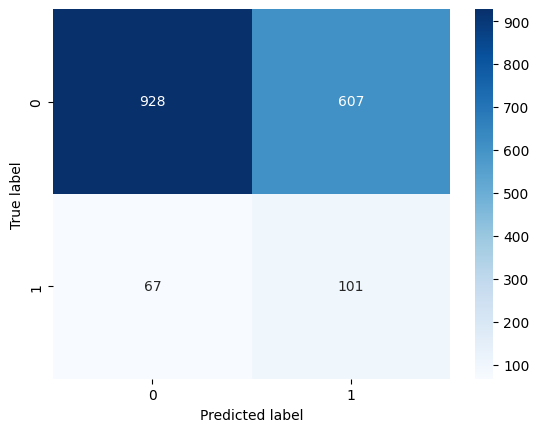

In [74]:
from sklearn.ensemble import AdaBoostClassifier

# Define the classifier
AdaBoost = Pipeline([
    ('classifier',AdaBoostClassifier( random_state=0))
])

param_grid = {'classifier__n_estimators': np.arange(0, 25, 5),
              'classifier__learning_rate' : np.arange(0, 1.1, 0.1) }

scorer = make_scorer(custom_scorer, greater_is_better=True)

AdaBoost_cv = GridSearchCV(AdaBoost, param_grid, cv=5, scoring=scorer)
AdaBoost_cv.fit(X_train, Y_train)

print('The best parameter', AdaBoost_cv.best_params_)
print("The best parameter's score", AdaBoost_cv.best_score_)

best_params = AdaBoost_cv.best_params_
AdaBoost.set_params(**best_params)

# Train the classifier on the training data
AdaBoost.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = AdaBoost.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_LDA_df.loc["f2_score", "AdaBoost"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_LDA_df.loc["accuracy", "AdaBoost"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_LDA_df.loc['precision', "AdaBoost"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_LDA_df.loc['recall', "AdaBoost"] = recall__score
print('Recall',recall__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')
print(con_matrix)

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__learning_rate': 0.1}
The best parameter's score 0.9998348472336911
f2 score: 0.4652428810720268
accuracy: 0.6042278332354668
precision: 0.1426553672316384
Recall 0.6011904761904762
confusion matrix


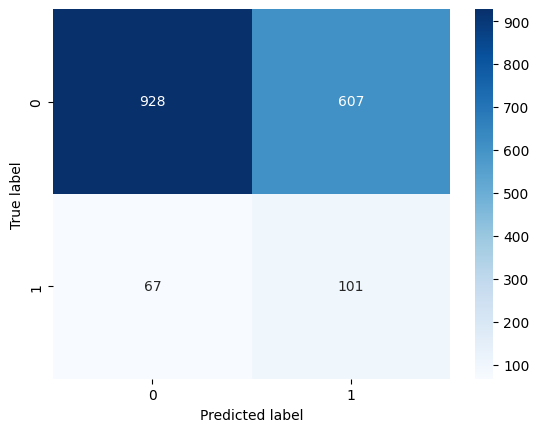

In [75]:
import xgboost as xgb

# Define the classifier
XGB = Pipeline([
    ('classifier',xgb.XGBClassifier())
])

param_grid = {'classifier__learning_rate':[0.1,0.4,0.7]}

scorer = make_scorer(custom_scorer, greater_is_better=True)

XGB_cv = GridSearchCV(XGB, param_grid, cv=5, scoring=scorer)
XGB_cv.fit(X_train, Y_train)

print('The best parameter', XGB_cv.best_params_)
print("The best parameter's score", XGB_cv.best_score_)

best_params = XGB_cv.best_params_
XGB.set_params(**best_params)

# Train the classifier on the training data
XGB.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = XGB.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_LDA_df.loc["f2_score", "XGB"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_LDA_df.loc["accuracy", "XGB"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_LDA_df.loc['precision', "XGB"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_LDA_df.loc['recall', "XGB"] = recall__score
print('Recall',recall__score)


labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__fit_intercept': True}
The best parameter's score nan
f2 score: 0.46798843453118555
accuracy: 0.5871990604815033
precision: 0.13900134952766532
0.6130952380952381
confusion matrix


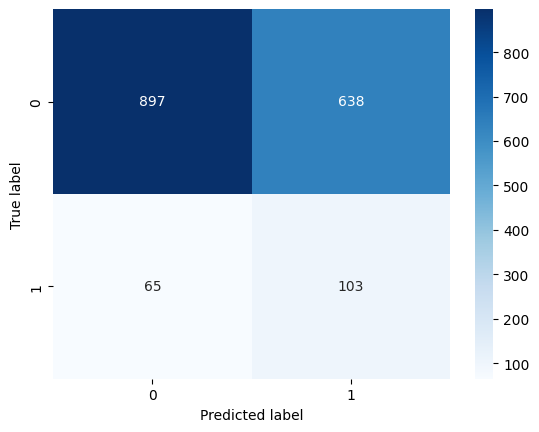

In [76]:
from sklearn.linear_model import LinearRegression

# Define the classifier
LR = Pipeline([
    ('classifier', LinearRegression())
])


param_grid = {'classifier__fit_intercept': [True, False]}

scorer = make_scorer(custom_scorer, greater_is_better=True)

LR_cv = GridSearchCV(LR, param_grid, cv=5, scoring=scorer)
LR_cv.fit(X_train, Y_train)

print('The best parameter', LR_cv.best_params_)
print("The best parameter's score", LR_cv.best_score_)

best_params = LR_cv.best_params_
LR.set_params(**best_params)

# Train the classifier on the training data
LR.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred_prob = LR.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_LDA_df.loc["f2_score", "LR"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_LDA_df.loc["accuracy", "LR"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_LDA_df.loc['precision', "LR"] = precision__score
print('precision:',precision__score)

# Recall
recall__score = recall_score(Y_test, y_pred)
evaluation_LDA_df.loc['recall', "LR"] = recall__score
print(recall__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

2023-04-21 22:20:18.149455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - 0s 3ms/step


2023-04-21 22:20:28.237043: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Accuracy: 0.9330593071051086
Recall: 0.5416666666666666
Precision: 0.7109375
F2 Score: 0.5536504424778761
confusion matrix


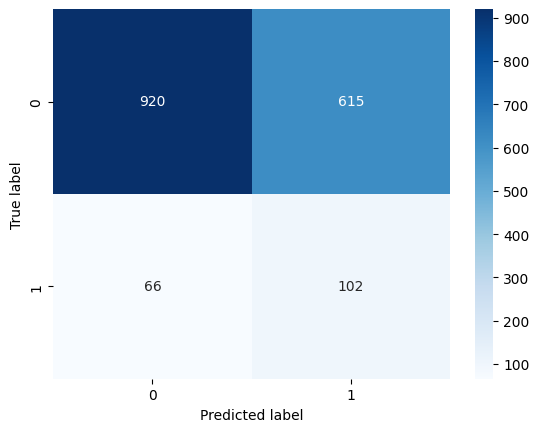

In [77]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Set the input size, hidden size, and number of classes
input_size = X_train.shape[1]
hidden_size = 500
num_classes = 2

# Create the MLP model
model = Sequential([
    Dense(hidden_size, activation='relu', input_shape=(input_size,)),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
with tf.device("/GPU:0"):
    model.fit(X_train, Y_train, epochs=100, batch_size=64, verbose=0)

# Evaluate the model using the test data
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Calculate evaluation metrics
evaluation_LDA_df.loc["accuracy", "MLP"] = accuracy_score(Y_test, y_pred)
evaluation_LDA_df.loc["recall", "MLP"] = recall_score(Y_test, y_pred)
evaluation_LDA_df.loc["precision", "MLP"] = precision_score(Y_test, y_pred)
evaluation_LDA_df.loc["f2_score", "MLP"] = custom_scorer(Y_test, y_pred)

print("Accuracy:", evaluation_df.loc["accuracy", "MLP"])
print("Recall:", evaluation_df.loc["recall", "MLP"])
print("Precision:", evaluation_df.loc["precision", "MLP"])
print("F2 Score:", evaluation_df.loc["f2_score", "MLP"])

labels = [0, 1]
con_matrix = confusion_matrix(Y_test, y_pred, labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

In [78]:
evaluation_LDA_df.T.sort_values(by =['f2_score'] , ascending=False)

,f2_score,accuracy,precision,recall
NB,0.468838,0.551967,0.131351,0.630952
MLP,0.468085,0.600117,0.142259,0.607143
Logistic,0.467988,0.587199,0.139001,0.613095
LDA,0.467988,0.587199,0.139001,0.613095
LR,0.467988,0.587199,0.139001,0.613095
KNN,0.466255,0.581914,0.137333,0.613095
DT,0.465243,0.604228,0.142655,0.60119
GB,0.465243,0.604228,0.142655,0.60119
AdaBoost,0.465243,0.604228,0.142655,0.60119
XGB,0.465243,0.604228,0.142655,0.60119


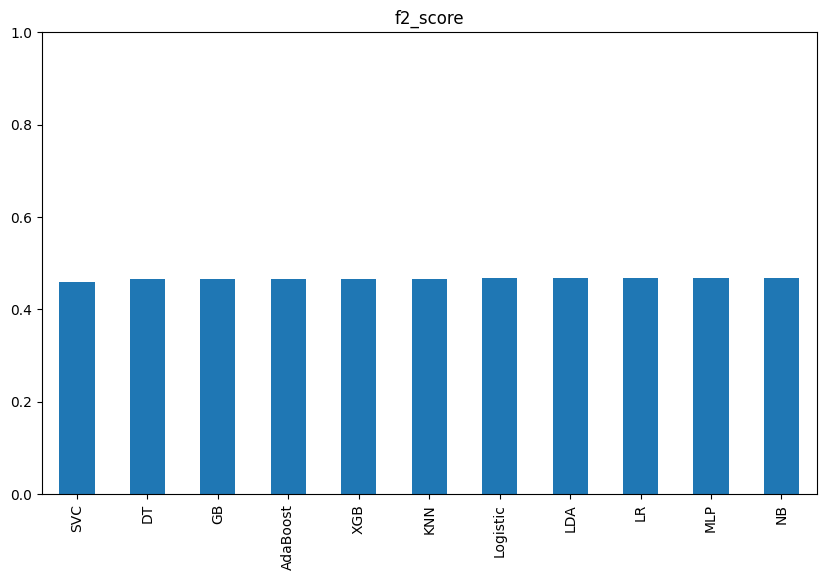

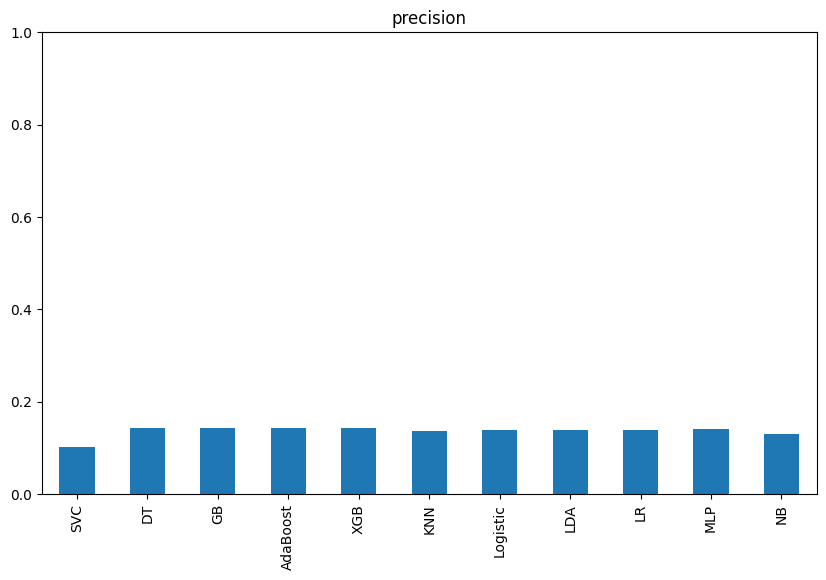

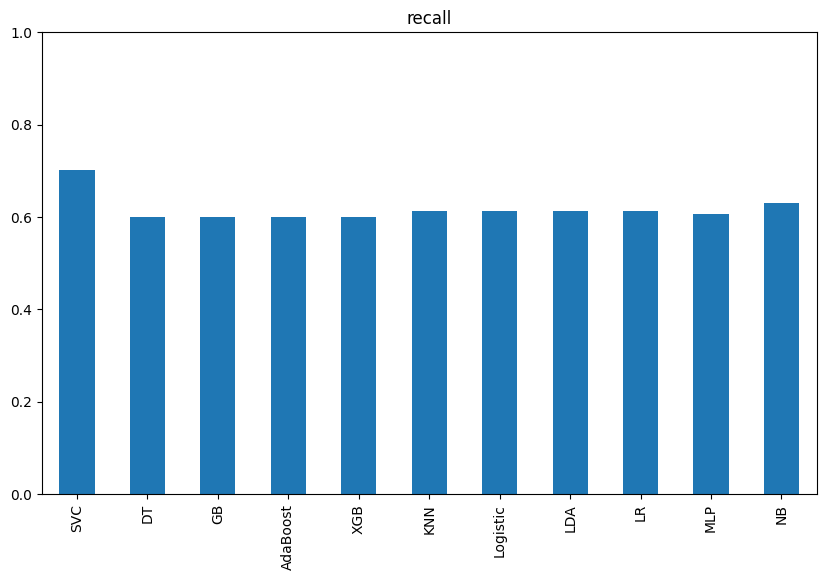

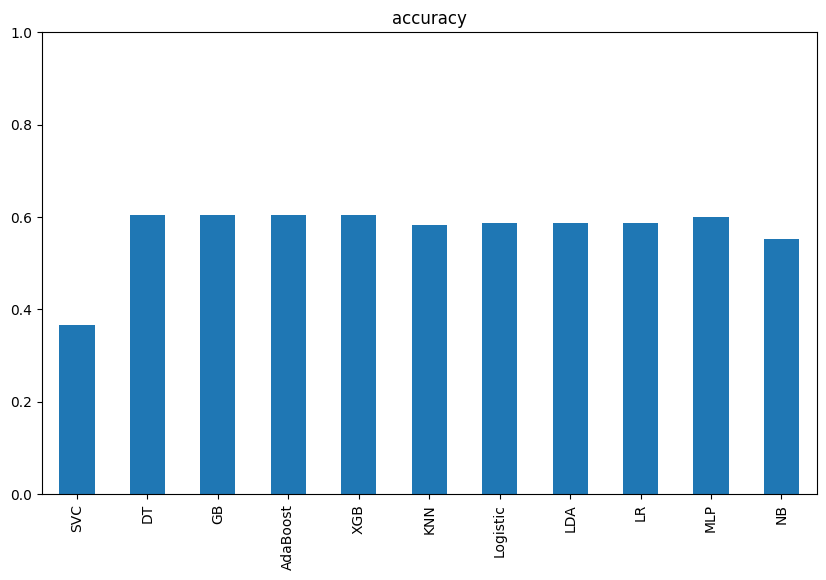

In [79]:
evaluation_LDA_df.T.sort_values(by =['f2_score'])['f2_score'].plot(kind='bar', figsize=(10, 6))
plt.title('f2_score')
plt.ylim(0, 1)
plt.show()

evaluation_LDA_df.T.sort_values(by =['f2_score'])['precision'].plot(kind='bar', figsize=(10, 6))
plt.title('precision')
plt.ylim(0, 1)
plt.show()

evaluation_LDA_df.T.sort_values(by =['f2_score'])['recall'].plot(kind='bar', figsize=(10, 6))
plt.title('recall')
plt.ylim(0, 1)
plt.show()

evaluation_LDA_df.T.sort_values(by =['f2_score'])['accuracy'].plot(kind='bar', figsize=(10, 6))
plt.title('accuracy')
plt.ylim(0, 1)
plt.show()

# Dimension reduction by FastICA

In [81]:

from sklearn.decomposition import FastICA

df = pd.read_csv('qsar_oral_toxicity.csv',delimiter= ';', header = None)

def convert_zero_one(word):
    if word == 'negative':
        return 0
    else:
        return 1
    
print(df.shape)

print('Number of duplicated observation in the dataset', df.duplicated().sum())

df = df.drop_duplicates()

X = df.iloc[:,:-1]
Y = df.iloc[:,-1].apply(convert_zero_one)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=8)

# resapling 
rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
X_train, Y_train = rus.fit_resample(X_train, Y_train)

ica = FastICA(n_components=300)
ica.fit(X)

X_train_new = ica.transform(X_train)
X_test_new = ica.transform(X_test)

X_train = pd.DataFrame(X_train_new.copy())
X_test = pd.DataFrame(X_test_new.copy())

print(X_train.shape)
print(X_test.shape)


evaluation_ICA_df = pd.DataFrame(index=['f2_score', 'accuracy','precision', 'recall'], columns=['DT', 'KNN', 'SVC', 'GB','NB','Logistic', 'LDA','AdaBoost' ,'XGB','LR','MLP'])

(8992, 1025)
Number of duplicated observation in the dataset 477
(1102, 300)
(1703, 300)


The best parameter {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 10, 'classifier__min_samples_split': 20}
The best parameter's score 0.6354108018130484
f2 score: 0.5543163981825692
accuracy: 0.6095126247798004
precision: 0.16464237516869096
Recall 0.7261904761904762
confusion matrix


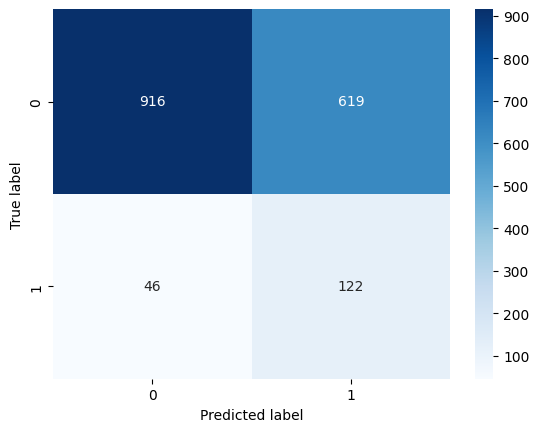

In [82]:
# Import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss, matthews_corrcoef,  cohen_kappa_score
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import confusion_matrix

# Define the classifier
DT = Pipeline([
    ('classifier', DecisionTreeClassifier())
])

param_grid = {'classifier__max_depth': [1, 10, 20, 30],
              'classifier__min_samples_split': [1, 10,  20],
              'classifier__min_samples_leaf': [1,10,20]}

scorer = make_scorer(custom_scorer, greater_is_better=True)

DT_cv = GridSearchCV(DT, param_grid, cv=5, scoring=scorer)
DT_cv.fit(X_train, Y_train)

print('The best parameter', DT_cv.best_params_)
print("The best parameter's score", DT_cv.best_score_)

best_params = DT_cv.best_params_
DT.set_params(**best_params)

# Train the classifier on the training data
DT.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = DT.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_ICA_df.loc["f2_score", "DT"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_ICA_df.loc["accuracy", "DT"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_ICA_df.loc['precision', "DT"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_ICA_df.loc['recall', "DT"] = recall__score
print('Recall',recall__score)

labels = [0,1]


# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__n_neighbors': 5}
The best parameter's score 0.75842682414868
f2 score: 0.6358649789029537
accuracy: 0.6570757486788021
precision: 0.19855072463768117
Recall 0.8154761904761905
confusion matrix


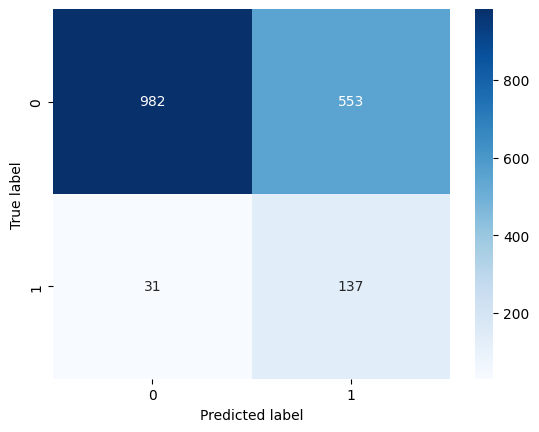

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Define the classifier
KNN = Pipeline([
    ('classifier', KNeighborsClassifier())
])

param_grid = {'classifier__n_neighbors': range(30)}

scorer = make_scorer(custom_scorer, greater_is_better=True)

KNN_cv = GridSearchCV(KNN, param_grid, cv=5, scoring=scorer)
KNN_cv.fit(X_train, Y_train)

print('The best parameter', KNN_cv.best_params_)
print("The best parameter's score", KNN_cv.best_score_)

best_params = KNN_cv.best_params_
KNN.set_params(**best_params)

# Train the classifier on the training data
KNN.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = KNN.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_ICA_df.loc["f2_score", "KNN"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_ICA_df.loc["accuracy", "KNN"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_ICA_df.loc['precision', "KNN"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_ICA_df.loc['recall', "KNN"] = recall__score
print('Recall',recall__score)


labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__kernel': 'rbf'}
The best parameter's score 0.7391392498456987
f2 score: 0.7464091134224863
accuracy: 0.8631826189078098
precision: 0.40412979351032446
Recall 0.8154761904761905
confusion matrix


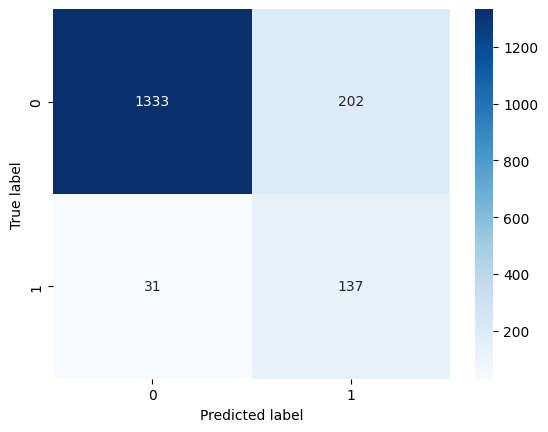

In [84]:
from sklearn.svm import SVC


# Define the classifier
SVC = Pipeline([
    ('classifier', SVC(  random_state=42))
])

param_grid = {'classifier__kernel': ['rbf','sigmoid']}

scorer = make_scorer(custom_scorer, greater_is_better=True)

SVC_cv = GridSearchCV(SVC, param_grid, cv=5, scoring=scorer)
SVC_cv.fit(X_train, Y_train)

print('The best parameter', SVC_cv.best_params_)
print("The best parameter's score", SVC_cv.best_score_)

best_params = SVC_cv.best_params_
SVC.set_params(**best_params)

# Train the classifier on the training data
SVC.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = SVC.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_ICA_df.loc["f2_score", "SVC"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_ICA_df.loc["accuracy", "SVC"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_ICA_df.loc['precision', "SVC"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_ICA_df.loc['recall', "SVC"] = recall__score
print('Recall',recall__score)

labels = [0,1]


# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__learning_rate': 0.4}
The best parameter's score 0.6980607100662312
f2 score: 0.6522911051212938
accuracy: 0.7357604227833235
precision: 0.24175824175824176
Recall 0.7857142857142857
confusion matrix


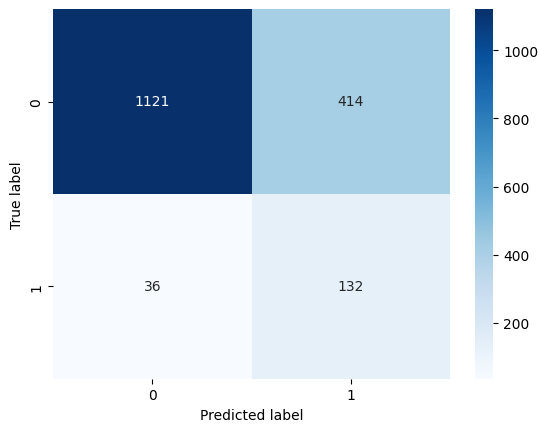

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# Define the classifier
GB = Pipeline([
    ('classifier', GradientBoostingClassifier())
])

param_grid = {'classifier__learning_rate': [0.1,0.4,0.7] }

scorer = make_scorer(custom_scorer, greater_is_better=True)

GB_cv = GridSearchCV(GB, param_grid, cv=5, scoring=scorer)
GB_cv.fit(X_train, Y_train)

print('The best parameter', GB_cv.best_params_)
print("The best parameter's score", GB_cv.best_score_)

best_params = GB_cv.best_params_
GB.set_params(**best_params)

# Train the classifier on the training data
GB.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = GB.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_ICA_df.loc["f2_score", "GB"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_ICA_df.loc["accuracy", "GB"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_ICA_df.loc['precision', "GB"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_ICA_df.loc['recall', "GB"] = recall__score
print('Recall',recall__score)


labels = [0,1]


# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()



f2 score: 0.6392020815264527
accuracy: 0.6911332941867293
precision: 0.21405750798722045
confusion matrix


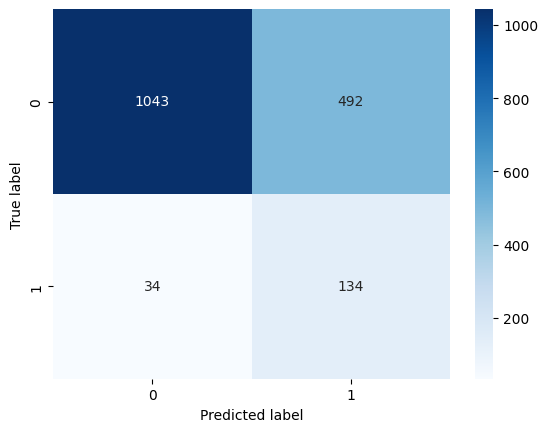

0.7976190476190477


In [86]:
from sklearn.naive_bayes import GaussianNB

# Define the classifier
NB = Pipeline([
    ('classifier', GaussianNB())
])

# Train the classifier on the training data
NB.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = NB.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_ICA_df.loc["f2_score", "NB"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_ICA_df.loc["accuracy", "NB"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_ICA_df.loc['precision', "NB"] = precision__score
print('precision:',precision__score)

labels = [0,1]


# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

recall__score = recall_score(Y_test, y_pred)
evaluation_ICA_df.loc['recall', "NB"] = recall__score
print(recall__score)


The best parameter {'classifier__penalty': None, 'classifier__solver': 'saga'}
The best parameter's score 0.7427140371360318
f2 score: 0.6836734693877552
accuracy: 0.7792131532589548
precision: 0.2815126050420168
confusion matrix


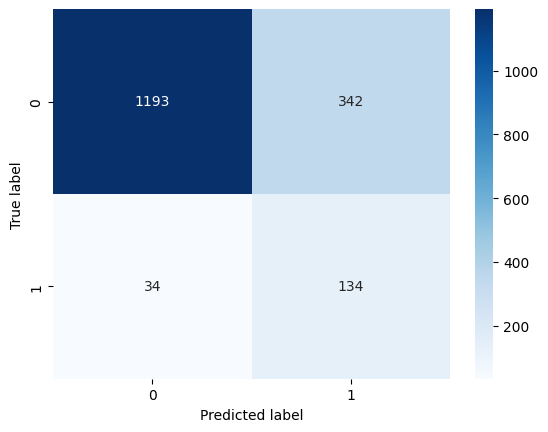

0.7976190476190477


In [87]:
from sklearn.linear_model import LogisticRegression

# Define the classifier
Logistic = Pipeline([
    ('classifier', LogisticRegression())
])

param_grid = {'classifier__penalty': ['l1', 'l2', 'elasticnet', None],
'classifier__solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
scorer = make_scorer(custom_scorer, greater_is_better=True)

Logistic_cv = GridSearchCV(Logistic, param_grid, cv=5, scoring=scorer)
Logistic_cv.fit(X_train, Y_train)

print('The best parameter', Logistic_cv.best_params_)
print("The best parameter's score", Logistic_cv.best_score_)

best_params = Logistic_cv.best_params_
Logistic.set_params(**best_params)

# Train the classifier on the training data
Logistic.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = Logistic.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_ICA_df.loc["f2_score", "Logistic"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_ICA_df.loc["accuracy", "Logistic"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_ICA_df.loc['precision', "Logistic"] = precision__score
print('precision:',precision__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

recall__score = recall_score(Y_test, y_pred)
evaluation_ICA_df.loc['recall', "Logistic"] = recall__score
print(recall__score)

The best parameter {'classifier__solver': 'svd'}
The best parameter's score 0.7365034094733256
f2 score: 0.6884422110552764
accuracy: 0.7633587786259542
precision: 0.2691552062868369
Recall 0.8154761904761905
confusion matrix


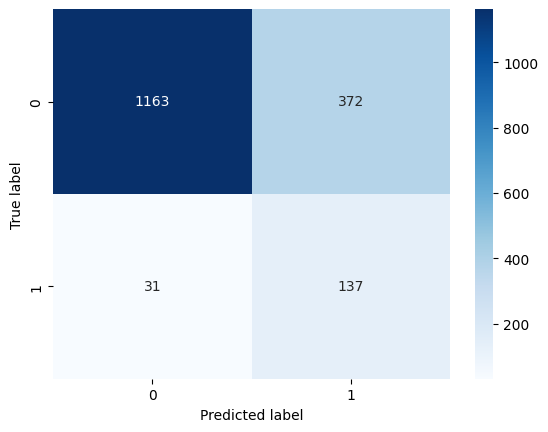

In [88]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define the classifier
LDA = Pipeline([
    ('classifier', LinearDiscriminantAnalysis())
])


param_grid = {'classifier__solver': ['svd', 'lsqr', 'eigen']}

scorer = make_scorer(custom_scorer, greater_is_better=True)

LDA_cv = GridSearchCV(LDA, param_grid, cv=5, scoring=scorer)
LDA_cv.fit(X_train, Y_train)

print('The best parameter', LDA_cv.best_params_)
print("The best parameter's score", LDA_cv.best_score_)

best_params = LDA_cv.best_params_
LDA.set_params(**best_params)

# Train the classifier on the training data
LDA.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = LDA.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_ICA_df.loc["f2_score", "LDA"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_ICA_df.loc["accuracy", "LDA"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_ICA_df.loc['precision', "LDA"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_ICA_df.loc['recall', "LDA"] = recall__score
print('Recall', recall__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__learning_rate': 0.8, 'classifier__n_estimators': 20}
The best parameter's score 0.6291979976969166
f2 score: 0.528604118993135
accuracy: 0.728126834997064
precision: 0.2079207920792079
Recall 0.625
confusion matrix
[[1135  400]
 [  63  105]]


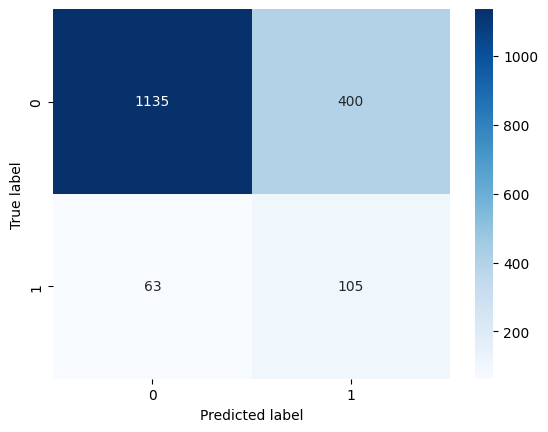

In [89]:
from sklearn.ensemble import AdaBoostClassifier

# Define the classifier
AdaBoost = Pipeline([
    ('classifier',AdaBoostClassifier( random_state=0))
])

param_grid = {'classifier__n_estimators': np.arange(0, 25, 5),
              'classifier__learning_rate' : np.arange(0, 1.1, 0.1) }

scorer = make_scorer(custom_scorer, greater_is_better=True)

AdaBoost_cv = GridSearchCV(AdaBoost, param_grid, cv=5, scoring=scorer)
AdaBoost_cv.fit(X_train, Y_train)

print('The best parameter', AdaBoost_cv.best_params_)
print("The best parameter's score", AdaBoost_cv.best_score_)

best_params = AdaBoost_cv.best_params_
AdaBoost.set_params(**best_params)

# Train the classifier on the training data
AdaBoost.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = AdaBoost.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_ICA_df.loc["f2_score", "AdaBoost"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_ICA_df.loc["accuracy", "AdaBoost"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_ICA_df.loc['precision', "AdaBoost"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_ICA_df.loc['recall', "AdaBoost"] = recall__score
print('Recall',recall__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')
print(con_matrix)

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()




The best parameter {'classifier__learning_rate': 0.1}
The best parameter's score 0.680183126016853
f2 score: 0.6654257794322941
accuracy: 0.7786259541984732
precision: 0.2771855010660981
Recall 0.7738095238095238
confusion matrix


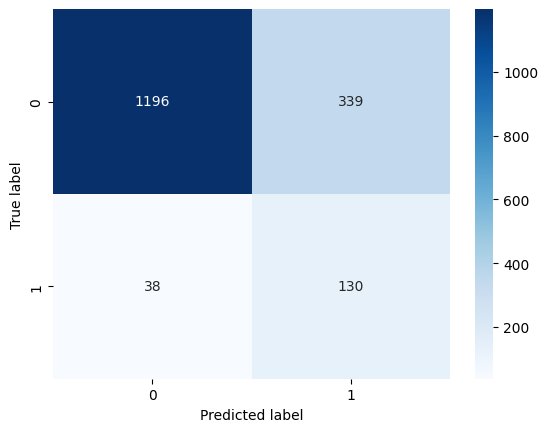

In [90]:
import xgboost as xgb

# Define the classifier
XGB = Pipeline([
    ('classifier',xgb.XGBClassifier())
])

param_grid = {'classifier__learning_rate':[0.1,0.4,0.7]}

scorer = make_scorer(custom_scorer, greater_is_better=True)

XGB_cv = GridSearchCV(XGB, param_grid, cv=5, scoring=scorer)
XGB_cv.fit(X_train, Y_train)

print('The best parameter', XGB_cv.best_params_)
print("The best parameter's score", XGB_cv.best_score_)

best_params = XGB_cv.best_params_
XGB.set_params(**best_params)

# Train the classifier on the training data
XGB.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = XGB.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_ICA_df.loc["f2_score", "XGB"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_ICA_df.loc["accuracy", "XGB"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_ICA_df.loc['precision', "XGB"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_ICA_df.loc['recall', "XGB"] = recall__score
print('Recall',recall__score)


labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__fit_intercept': True}
The best parameter's score nan
f2 score: 0.6884422110552764
accuracy: 0.7633587786259542
precision: 0.2691552062868369
0.8154761904761905
confusion matrix


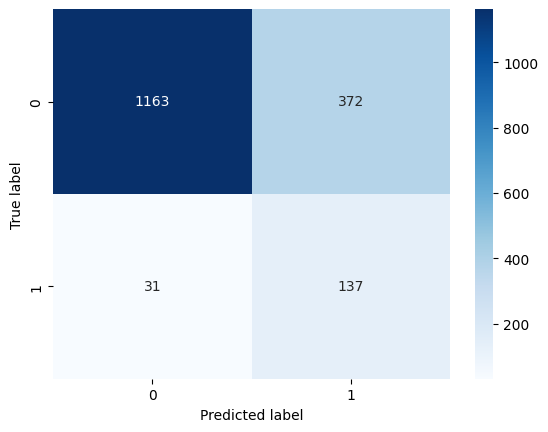

In [91]:
from sklearn.linear_model import LinearRegression

# Define the classifier
LR = Pipeline([
    ('classifier', LinearRegression())
])


param_grid = {'classifier__fit_intercept': [True, False]}

scorer = make_scorer(custom_scorer, greater_is_better=True)

LR_cv = GridSearchCV(LR, param_grid, cv=5, scoring=scorer)
LR_cv.fit(X_train, Y_train)

print('The best parameter', LR_cv.best_params_)
print("The best parameter's score", LR_cv.best_score_)

best_params = LR_cv.best_params_
LR.set_params(**best_params)

# Train the classifier on the training data
LR.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred_prob = LR.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_ICA_df.loc["f2_score", "LR"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_ICA_df.loc["accuracy", "LR"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_ICA_df.loc['precision', "LR"] = precision__score
print('precision:',precision__score)

# Recall
recall__score = recall_score(Y_test, y_pred)
evaluation_ICA_df.loc['recall', "LR"] = recall__score
print(recall__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

2023-04-21 22:25:19.698677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - 0s 2ms/step
Accuracy: 0.9330593071051086
Recall: 0.5416666666666666
Precision: 0.7109375
F2 Score: 0.5536504424778761
confusion matrix


2023-04-21 22:25:28.585458: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


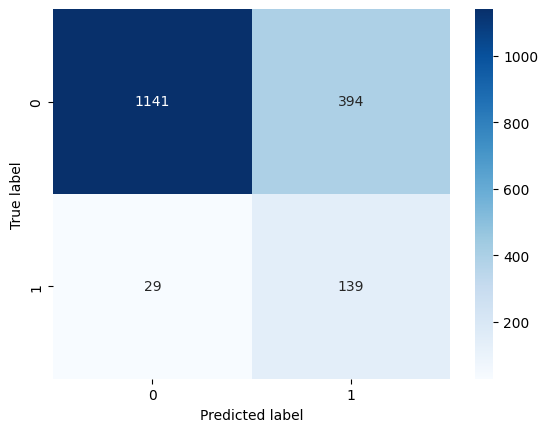

In [92]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Set the input size, hidden size, and number of classes
input_size = X_train.shape[1]
hidden_size = 500
num_classes = 2

# Create the MLP model
model = Sequential([
    Dense(hidden_size, activation='relu', input_shape=(input_size,)),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
with tf.device("/GPU:0"):
    model.fit(X_train, Y_train, epochs=100, batch_size=64, verbose=0)

# Evaluate the model using the test data
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Calculate evaluation metrics
evaluation_ICA_df.loc["accuracy", "MLP"] = accuracy_score(Y_test, y_pred)
evaluation_ICA_df.loc["recall", "MLP"] = recall_score(Y_test, y_pred)
evaluation_ICA_df.loc["precision", "MLP"] = precision_score(Y_test, y_pred)
evaluation_ICA_df.loc["f2_score", "MLP"] = custom_scorer(Y_test, y_pred)

print("Accuracy:", evaluation_df.loc["accuracy", "MLP"])
print("Recall:", evaluation_df.loc["recall", "MLP"])
print("Precision:", evaluation_df.loc["precision", "MLP"])
print("F2 Score:", evaluation_df.loc["f2_score", "MLP"])

labels = [0, 1]
con_matrix = confusion_matrix(Y_test, y_pred, labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

In [93]:
evaluation_ICA_df.T.sort_values(by =['f2_score'] , ascending=False)

,f2_score,accuracy,precision,recall
SVC,0.746409,0.863183,0.40413,0.815476
MLP,0.690917,0.751615,0.260788,0.827381
LDA,0.688442,0.763359,0.269155,0.815476
LR,0.688442,0.763359,0.269155,0.815476
Logistic,0.683673,0.779213,0.281513,0.797619
XGB,0.665426,0.778626,0.277186,0.77381
GB,0.652291,0.73576,0.241758,0.785714
NB,0.639202,0.691133,0.214058,0.797619
KNN,0.635865,0.657076,0.198551,0.815476
DT,0.554316,0.609513,0.164642,0.72619


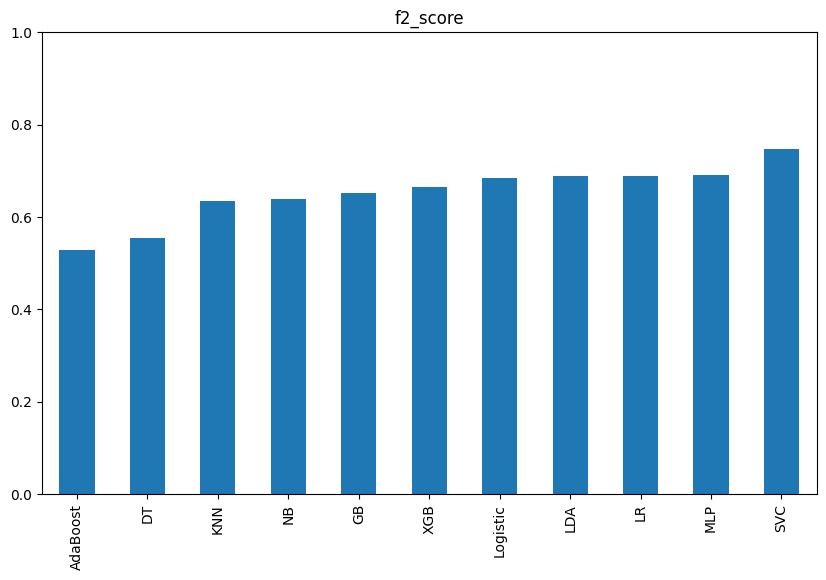

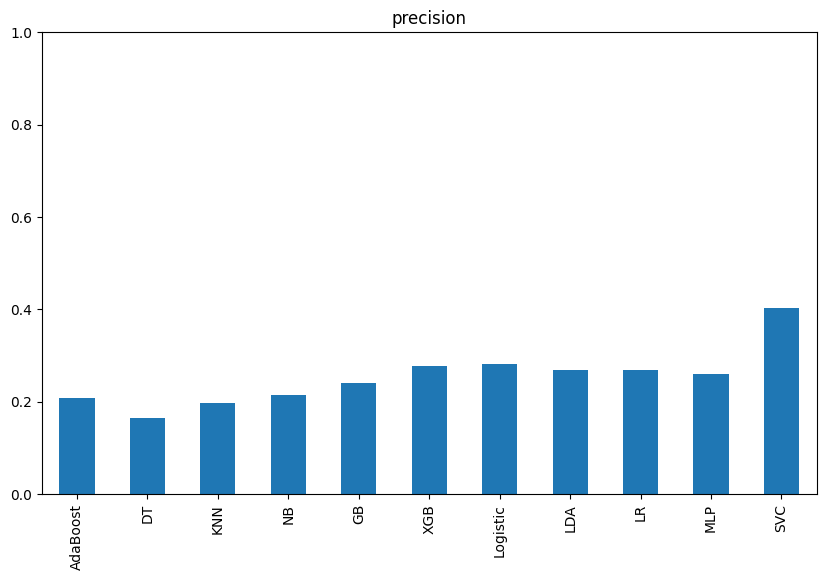

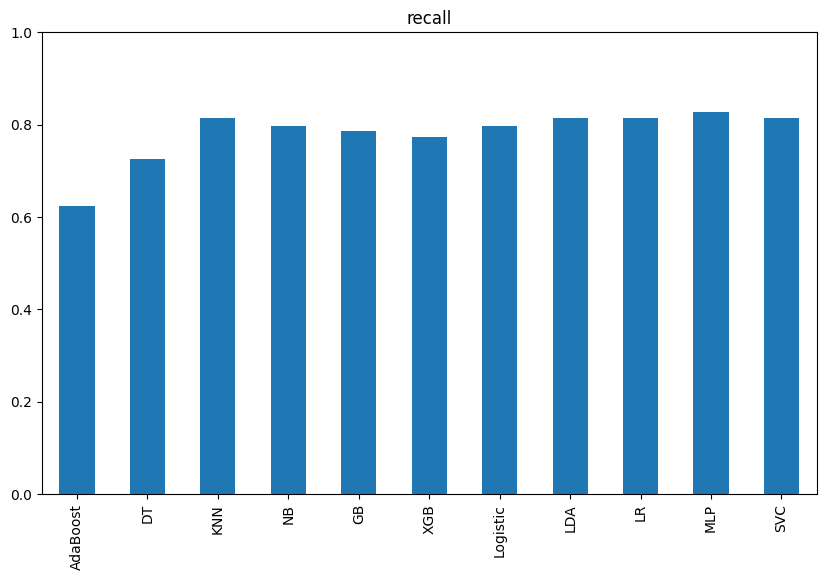

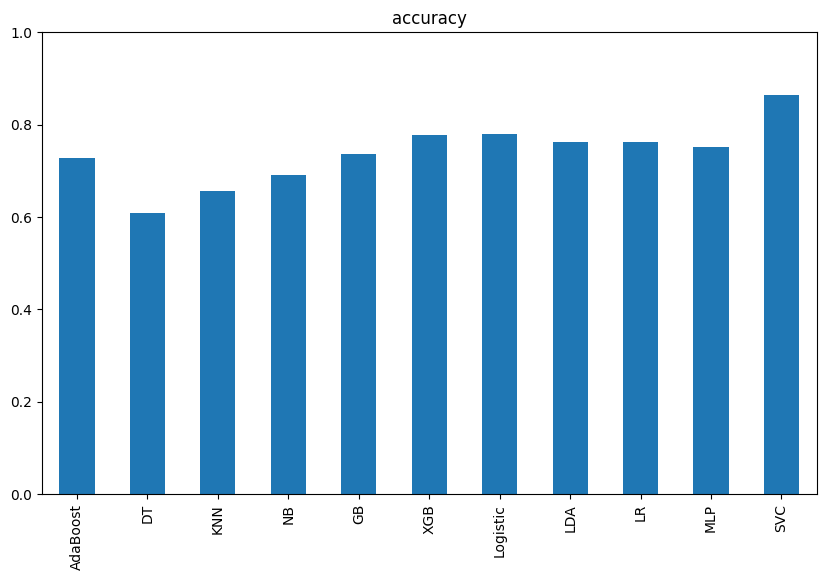

In [94]:
evaluation_ICA_df.T.sort_values(by =['f2_score'])['f2_score'].plot(kind='bar', figsize=(10, 6))
plt.title('f2_score')
plt.ylim(0, 1)
plt.show()
evaluation_ICA_df.T.sort_values(by =['f2_score'])['precision'].plot(kind='bar', figsize=(10, 6))
plt.title('precision')
plt.ylim(0, 1)
plt.show()
evaluation_ICA_df.T.sort_values(by =['f2_score'])['recall'].plot(kind='bar', figsize=(10, 6))
plt.title('recall')
plt.ylim(0, 1)
plt.show()
evaluation_ICA_df.T.sort_values(by =['f2_score'])['accuracy'].plot(kind='bar', figsize=(10, 6))
plt.title('accuracy')
plt.ylim(0, 1)
plt.show()

## PCA

In [95]:

from sklearn.decomposition import PCA

df = pd.read_csv('qsar_oral_toxicity.csv',delimiter= ';', header = None)

def convert_zero_one(word):
    if word == 'negative':
        return 0
    else:
        return 1
    
print(df.shape)

print('Number of duplicated observation in the dataset', df.duplicated().sum())

df = df.drop_duplicates()

X = df.iloc[:,:-1]
Y = df.iloc[:,-1].apply(convert_zero_one)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=8)

# resapling 
rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
X_train, Y_train = rus.fit_resample(X_train, Y_train)

pca = PCA(n_components=300)
pca.fit(X)

X_train_new = pca.transform(X_train)
X_test_new = pca.transform(X_test)

X_train = pd.DataFrame(X_train_new.copy())
X_test = pd.DataFrame(X_test_new.copy())

print(X_train.shape)
print(X_test.shape)


evaluation_PCA_df = pd.DataFrame(index=['f2_score', 'accuracy','precision', 'recall'], columns=['DT', 'KNN', 'SVC', 'GB','NB','Logistic', 'LDA','AdaBoost' ,'XGB','LR','MLP'])

(8992, 1025)
Number of duplicated observation in the dataset 477
(1102, 300)
(1703, 300)


The best parameter {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 20, 'classifier__min_samples_split': 20}
The best parameter's score 0.6667435287014938
f2 score: 0.5057471264367815
accuracy: 0.728126834997064
precision: 0.20202020202020202
Recall 0.5952380952380952
confusion matrix


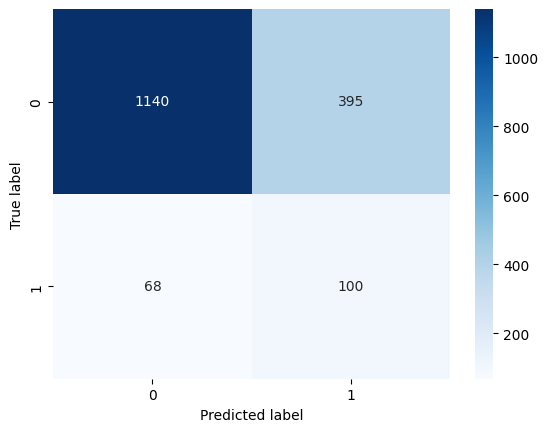

In [96]:
# Import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss, matthews_corrcoef,  cohen_kappa_score
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import confusion_matrix

# Define the classifier
DT = Pipeline([
    ('classifier', DecisionTreeClassifier())
])

param_grid = {'classifier__max_depth': [1, 10, 20, 30],
              'classifier__min_samples_split': [1, 10,  20],
              'classifier__min_samples_leaf': [1,10,20]}

scorer = make_scorer(custom_scorer, greater_is_better=True)

DT_cv = GridSearchCV(DT, param_grid, cv=5, scoring=scorer)
DT_cv.fit(X_train, Y_train)

print('The best parameter', DT_cv.best_params_)
print("The best parameter's score", DT_cv.best_score_)

best_params = DT_cv.best_params_
DT.set_params(**best_params)

# Train the classifier on the training data
DT.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = DT.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_PCA_df.loc["f2_score", "DT"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_PCA_df.loc["accuracy", "DT"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_PCA_df.loc['precision', "DT"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_PCA_df.loc['recall', "DT"] = recall__score
print('Recall',recall__score)

labels = [0,1]


# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__n_neighbors': 3}
The best parameter's score 0.7608201065663647
f2 score: 0.7048054919908467
accuracy: 0.7692307692307693
precision: 0.27722772277227725
Recall 0.8333333333333334
confusion matrix


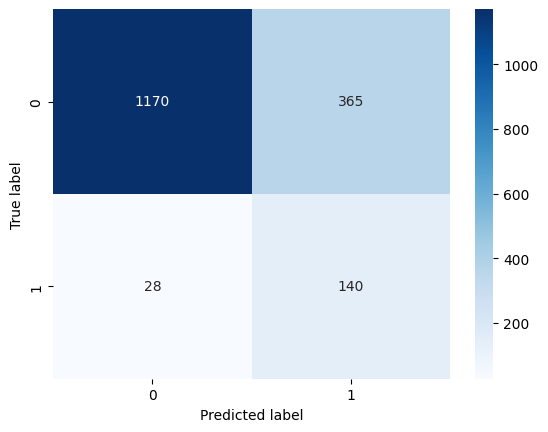

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Define the classifier
KNN = Pipeline([
    ('classifier', KNeighborsClassifier())
])

param_grid = {'classifier__n_neighbors': range(30)}

scorer = make_scorer(custom_scorer, greater_is_better=True)

KNN_cv = GridSearchCV(KNN, param_grid, cv=5, scoring=scorer)
KNN_cv.fit(X_train, Y_train)

print('The best parameter', KNN_cv.best_params_)
print("The best parameter's score", KNN_cv.best_score_)

best_params = KNN_cv.best_params_
KNN.set_params(**best_params)

# Train the classifier on the training data
KNN.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = KNN.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_PCA_df.loc["f2_score", "KNN"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_PCA_df.loc["accuracy", "KNN"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_PCA_df.loc['precision', "KNN"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_PCA_df.loc['recall', "KNN"] = recall__score
print('Recall',recall__score)


labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__kernel': 'rbf'}
The best parameter's score 0.7078370087816488
f2 score: 0.7311669128508125
accuracy: 0.8537874339401057
precision: 0.38461538461538464
Recall 0.8035714285714286
confusion matrix


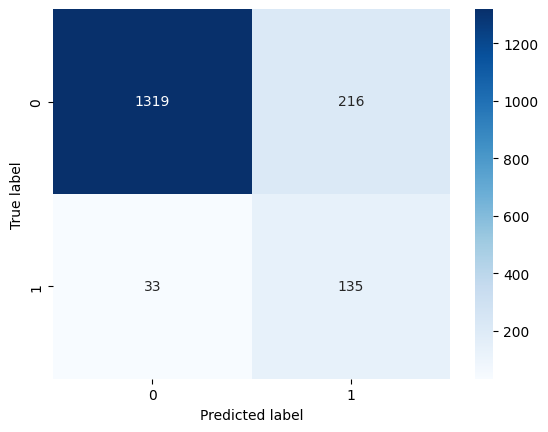

In [98]:
from sklearn.svm import SVC


# Define the classifier
SVC = Pipeline([
    ('classifier', SVC(  random_state=42))
])

param_grid = {'classifier__kernel': ['rbf','sigmoid']}

scorer = make_scorer(custom_scorer, greater_is_better=True)

SVC_cv = GridSearchCV(SVC, param_grid, cv=5, scoring=scorer)
SVC_cv.fit(X_train, Y_train)

print('The best parameter', SVC_cv.best_params_)
print("The best parameter's score", SVC_cv.best_score_)

best_params = SVC_cv.best_params_
SVC.set_params(**best_params)

# Train the classifier on the training data
SVC.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = SVC.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_PCA_df.loc["f2_score", "SVC"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_PCA_df.loc["accuracy", "SVC"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_PCA_df.loc['precision', "SVC"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_PCA_df.loc['recall', "SVC"] = recall__score
print('Recall',recall__score)

labels = [0,1]


# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__learning_rate': 0.4}
The best parameter's score 0.7467068156622612
f2 score: 0.6497674418604652
accuracy: 0.7745155607751028
precision: 0.2702127659574468
Recall 0.7559523809523809
confusion matrix


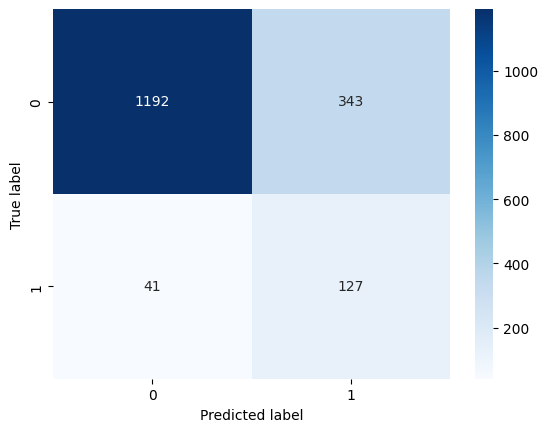

In [99]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# Define the classifier
GB = Pipeline([
    ('classifier', GradientBoostingClassifier())
])

param_grid = {'classifier__learning_rate': [0.1,0.4,0.7] }

scorer = make_scorer(custom_scorer, greater_is_better=True)

GB_cv = GridSearchCV(GB, param_grid, cv=5, scoring=scorer)
GB_cv.fit(X_train, Y_train)

print('The best parameter', GB_cv.best_params_)
print("The best parameter's score", GB_cv.best_score_)

best_params = GB_cv.best_params_
GB.set_params(**best_params)

# Train the classifier on the training data
GB.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = GB.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_PCA_df.loc["f2_score", "GB"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_PCA_df.loc["accuracy", "GB"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_PCA_df.loc['precision', "GB"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_PCA_df.loc['recall', "GB"] = recall__score
print('Recall',recall__score)


labels = [0,1]


# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()



f2 score: 0.6102030708271422
accuracy: 0.8338226658837345
precision: 0.3303834808259587
confusion matrix


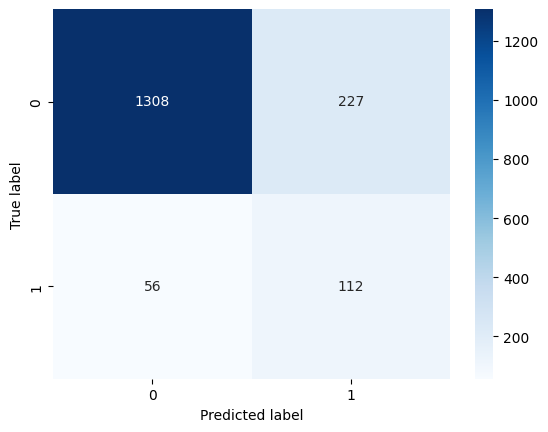

0.6666666666666666


In [100]:
from sklearn.naive_bayes import GaussianNB

# Define the classifier
NB = Pipeline([
    ('classifier', GaussianNB())
])

# Train the classifier on the training data
NB.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = NB.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_PCA_df.loc["f2_score", "NB"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_PCA_df.loc["accuracy", "NB"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_PCA_df.loc['precision', "NB"] = precision__score
print('precision:',precision__score)

labels = [0,1]


# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

recall__score = recall_score(Y_test, y_pred)
evaluation_PCA_df.loc['recall', "NB"] = recall__score
print(recall__score)


The best parameter {'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
The best parameter's score 0.7527820981589447
f2 score: 0.6814609338881183
accuracy: 0.7751027598355843
precision: 0.2774327122153209
confusion matrix


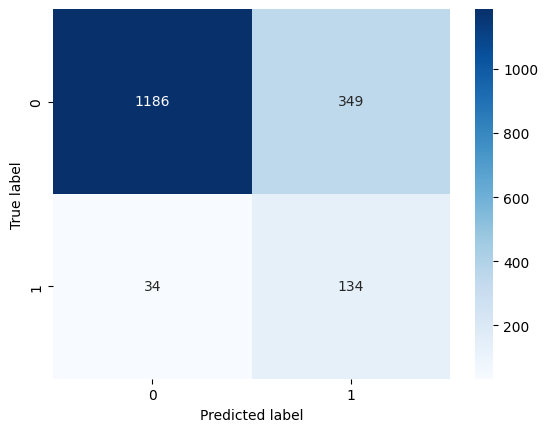

0.7976190476190477


In [101]:
from sklearn.linear_model import LogisticRegression

# Define the classifier
Logistic = Pipeline([
    ('classifier', LogisticRegression())
])

param_grid = {'classifier__penalty': ['l1', 'l2', 'elasticnet', None],
'classifier__solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
scorer = make_scorer(custom_scorer, greater_is_better=True)

Logistic_cv = GridSearchCV(Logistic, param_grid, cv=5, scoring=scorer)
Logistic_cv.fit(X_train, Y_train)

print('The best parameter', Logistic_cv.best_params_)
print("The best parameter's score", Logistic_cv.best_score_)

best_params = Logistic_cv.best_params_
Logistic.set_params(**best_params)

# Train the classifier on the training data
Logistic.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = Logistic.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_PCA_df.loc["f2_score", "Logistic"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_PCA_df.loc["accuracy", "Logistic"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_PCA_df.loc['precision', "Logistic"] = precision__score
print('precision:',precision__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

recall__score = recall_score(Y_test, y_pred)
evaluation_PCA_df.loc['recall', "Logistic"] = recall__score
print(recall__score)

The best parameter {'classifier__solver': 'svd'}
The best parameter's score 0.7311032500488435
f2 score: 0.6657496561210454
accuracy: 0.7621843805049912
precision: 0.2634730538922156
Recall 0.7857142857142857
confusion matrix


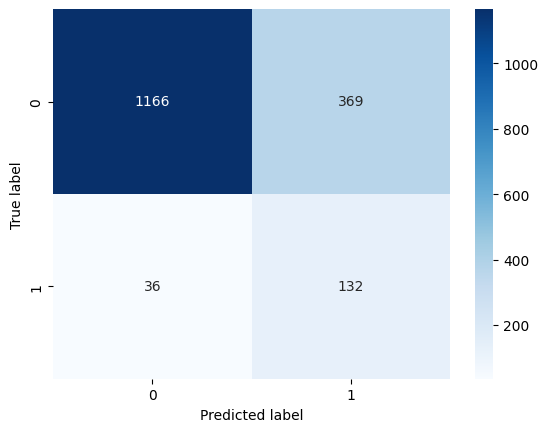

In [102]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define the classifier
LDA = Pipeline([
    ('classifier', LinearDiscriminantAnalysis())
])


param_grid = {'classifier__solver': ['svd', 'lsqr', 'eigen']}

scorer = make_scorer(custom_scorer, greater_is_better=True)

LDA_cv = GridSearchCV(LDA, param_grid, cv=5, scoring=scorer)
LDA_cv.fit(X_train, Y_train)

print('The best parameter', LDA_cv.best_params_)
print("The best parameter's score", LDA_cv.best_score_)

best_params = LDA_cv.best_params_
LDA.set_params(**best_params)

# Train the classifier on the training data
LDA.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = LDA.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_PCA_df.loc["f2_score", "LDA"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_PCA_df.loc["accuracy", "LDA"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_PCA_df.loc['precision', "LDA"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_PCA_df.loc['recall', "LDA"] = recall__score
print('Recall', recall__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__learning_rate': 0.9, 'classifier__n_estimators': 20}
The best parameter's score 0.6884028078772013
f2 score: 0.5401139850942569
accuracy: 0.6799765120375807
precision: 0.18635607321131448
Recall 0.6666666666666666
confusion matrix
[[1046  489]
 [  56  112]]


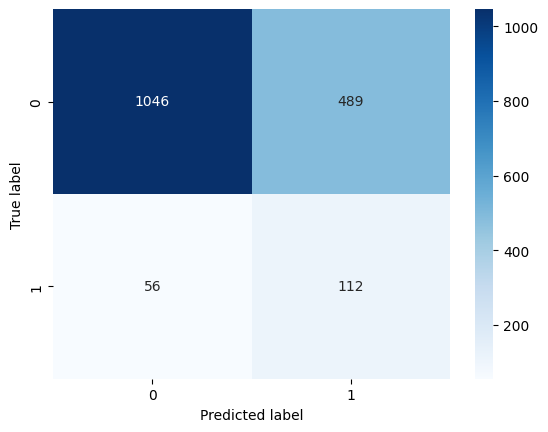

In [103]:
from sklearn.ensemble import AdaBoostClassifier

# Define the classifier
AdaBoost = Pipeline([
    ('classifier',AdaBoostClassifier( random_state=0))
])

param_grid = {'classifier__n_estimators': np.arange(0, 25, 5),
              'classifier__learning_rate' : np.arange(0, 1.1, 0.1) }

scorer = make_scorer(custom_scorer, greater_is_better=True)

AdaBoost_cv = GridSearchCV(AdaBoost, param_grid, cv=5, scoring=scorer)
AdaBoost_cv.fit(X_train, Y_train)

print('The best parameter', AdaBoost_cv.best_params_)
print("The best parameter's score", AdaBoost_cv.best_score_)

best_params = AdaBoost_cv.best_params_
AdaBoost.set_params(**best_params)

# Train the classifier on the training data
AdaBoost.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = AdaBoost.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_PCA_df.loc["f2_score", "AdaBoost"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_PCA_df.loc["accuracy", "AdaBoost"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_PCA_df.loc['precision', "AdaBoost"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_PCA_df.loc['recall', "AdaBoost"] = recall__score
print('Recall',recall__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')
print(con_matrix)

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()




The best parameter {'classifier__learning_rate': 0.4}
The best parameter's score 0.7185377598790432
f2 score: 0.6721932733301753
accuracy: 0.7997651203758074
precision: 0.29930394431554525
Recall 0.7678571428571429
confusion matrix


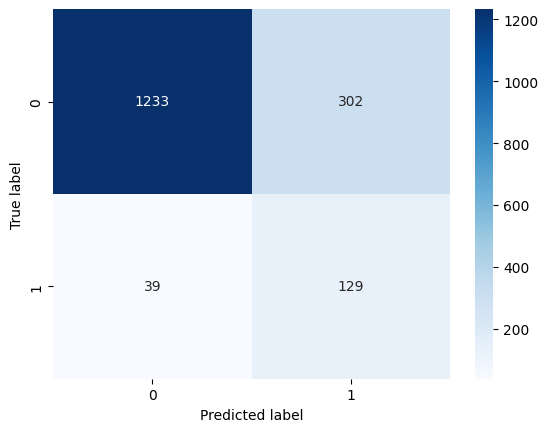

In [104]:
import xgboost as xgb

# Define the classifier
XGB = Pipeline([
    ('classifier',xgb.XGBClassifier())
])

param_grid = {'classifier__learning_rate':[0.1,0.4,0.7]}

scorer = make_scorer(custom_scorer, greater_is_better=True)

XGB_cv = GridSearchCV(XGB, param_grid, cv=5, scoring=scorer)
XGB_cv.fit(X_train, Y_train)

print('The best parameter', XGB_cv.best_params_)
print("The best parameter's score", XGB_cv.best_score_)

best_params = XGB_cv.best_params_
XGB.set_params(**best_params)

# Train the classifier on the training data
XGB.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = XGB.predict(X_test)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_PCA_df.loc["f2_score", "XGB"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_PCA_df.loc["accuracy", "XGB"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_PCA_df.loc['precision', "XGB"] = precision__score
print('precision:',precision__score)

recall__score = recall_score(Y_test, y_pred)
evaluation_PCA_df.loc['recall', "XGB"] = recall__score
print('Recall',recall__score)


labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

The best parameter {'classifier__fit_intercept': True}
The best parameter's score nan
f2 score: 0.6657496561210454
accuracy: 0.7621843805049912
precision: 0.2634730538922156
0.7857142857142857
confusion matrix


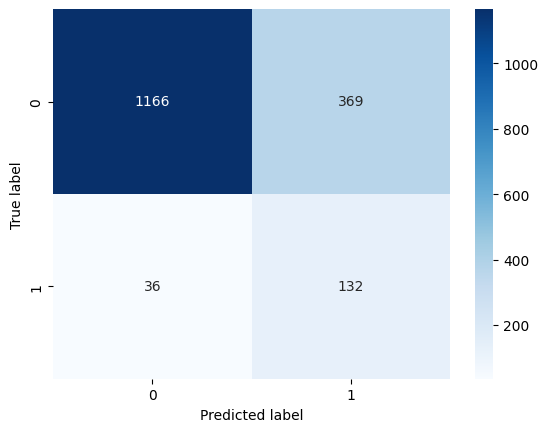

In [105]:
from sklearn.linear_model import LinearRegression

# Define the classifier
LR = Pipeline([
    ('classifier', LinearRegression())
])


param_grid = {'classifier__fit_intercept': [True, False]}

scorer = make_scorer(custom_scorer, greater_is_better=True)

LR_cv = GridSearchCV(LR, param_grid, cv=5, scoring=scorer)
LR_cv.fit(X_train, Y_train)

print('The best parameter', LR_cv.best_params_)
print("The best parameter's score", LR_cv.best_score_)

best_params = LR_cv.best_params_
LR.set_params(**best_params)

# Train the classifier on the training data
LR.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred_prob = LR.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

# calculate the f2 score 
f2 = custom_scorer(Y_test, y_pred)
evaluation_PCA_df.loc["f2_score", "LR"] = f2
print('f2 score:',f2)

# calculate the accuracy rate
accuracy = accuracy_score(Y_test,y_pred)
evaluation_PCA_df.loc["accuracy", "LR"] = accuracy
print('accuracy:',accuracy)

# calculate the precision
precision__score = precision_score(Y_test, y_pred)
evaluation_PCA_df.loc['precision', "LR"] = precision__score
print('precision:',precision__score)

# Recall
recall__score = recall_score(Y_test, y_pred)
evaluation_PCA_df.loc['recall', "LR"] = recall__score
print(recall__score)

labels = [0,1]

# calculate the confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred,  labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

2023-04-21 22:29:59.244312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - 0s 2ms/step
Accuracy: 0.9330593071051086
Recall: 0.5416666666666666
Precision: 0.7109375
F2 Score: 0.5536504424778761
confusion matrix


2023-04-21 22:30:07.667051: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


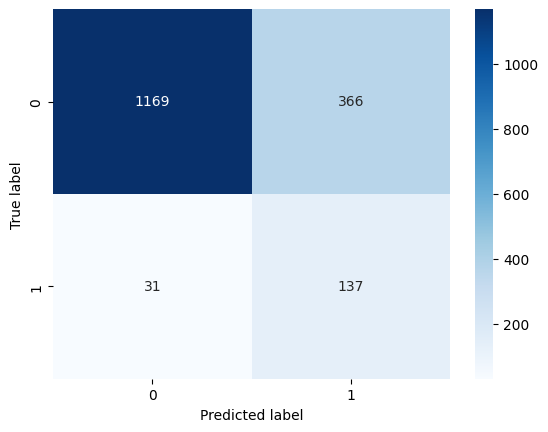

In [106]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Set the input size, hidden size, and number of classes
input_size = X_train.shape[1]
hidden_size = 500
num_classes = 2

# Create the MLP model
model = Sequential([
    Dense(hidden_size, activation='relu', input_shape=(input_size,)),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
with tf.device("/GPU:0"):
    model.fit(X_train, Y_train, epochs=100, batch_size=64, verbose=0)

# Evaluate the model using the test data
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Calculate evaluation metrics
evaluation_PCA_df.loc["accuracy", "MLP"] = accuracy_score(Y_test, y_pred)
evaluation_PCA_df.loc["recall", "MLP"] = recall_score(Y_test, y_pred)
evaluation_PCA_df.loc["precision", "MLP"] = precision_score(Y_test, y_pred)
evaluation_PCA_df.loc["f2_score", "MLP"] = custom_scorer(Y_test, y_pred)

print("Accuracy:", evaluation_df.loc["accuracy", "MLP"])
print("Recall:", evaluation_df.loc["recall", "MLP"])
print("Precision:", evaluation_df.loc["precision", "MLP"])
print("F2 Score:", evaluation_df.loc["f2_score", "MLP"])

labels = [0, 1]
con_matrix = confusion_matrix(Y_test, y_pred, labels=labels)
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

print('confusion matrix')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show plot
plt.show()

In [107]:
evaluation_PCA_df.T.sort_values(by =['f2_score'] , ascending=False)

,f2_score,accuracy,precision,recall
SVC,0.731167,0.853787,0.384615,0.803571
KNN,0.704805,0.769231,0.277228,0.833333
MLP,0.690334,0.766882,0.272366,0.815476
Logistic,0.681461,0.775103,0.277433,0.797619
XGB,0.672193,0.799765,0.299304,0.767857
LDA,0.66575,0.762184,0.263473,0.785714
LR,0.66575,0.762184,0.263473,0.785714
GB,0.649767,0.774516,0.270213,0.755952
NB,0.610203,0.833823,0.330383,0.666667
AdaBoost,0.540114,0.679977,0.186356,0.666667


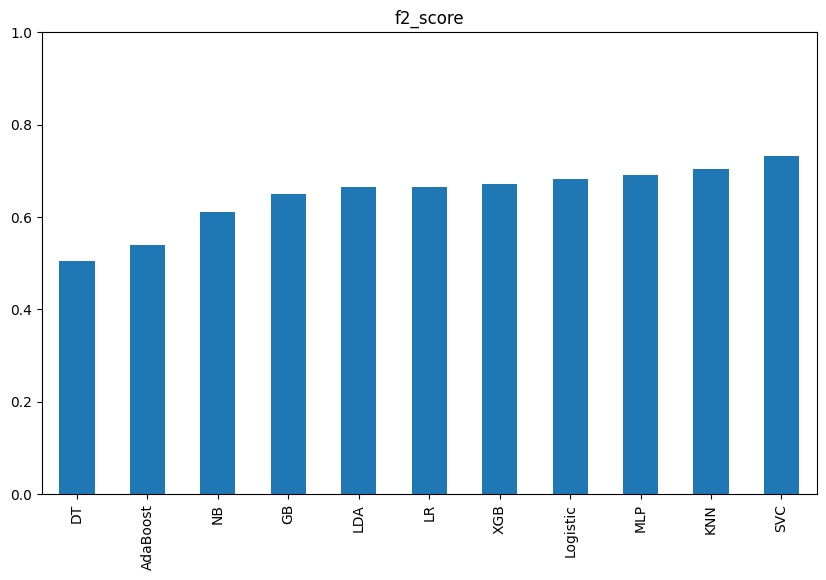

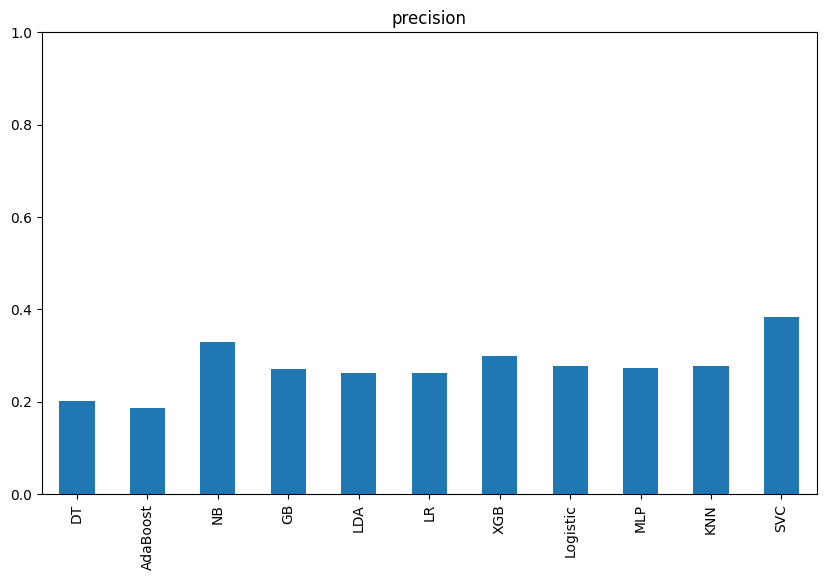

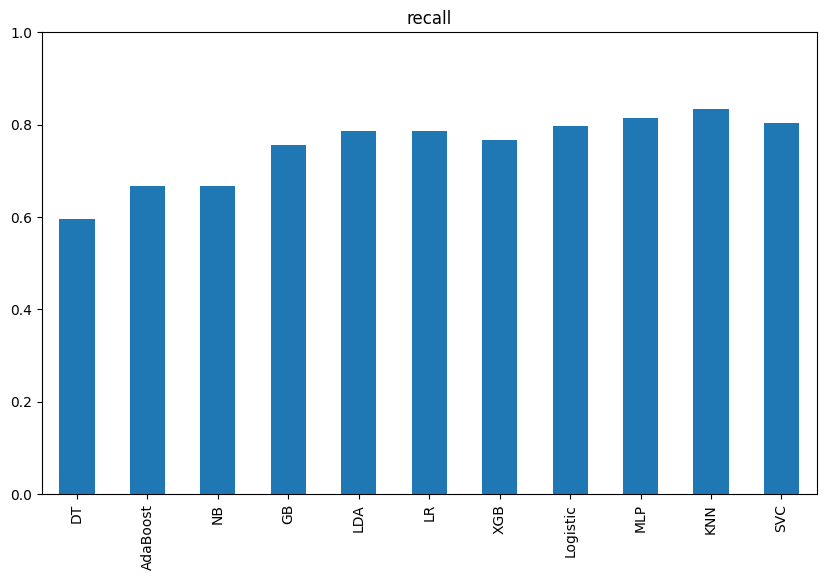

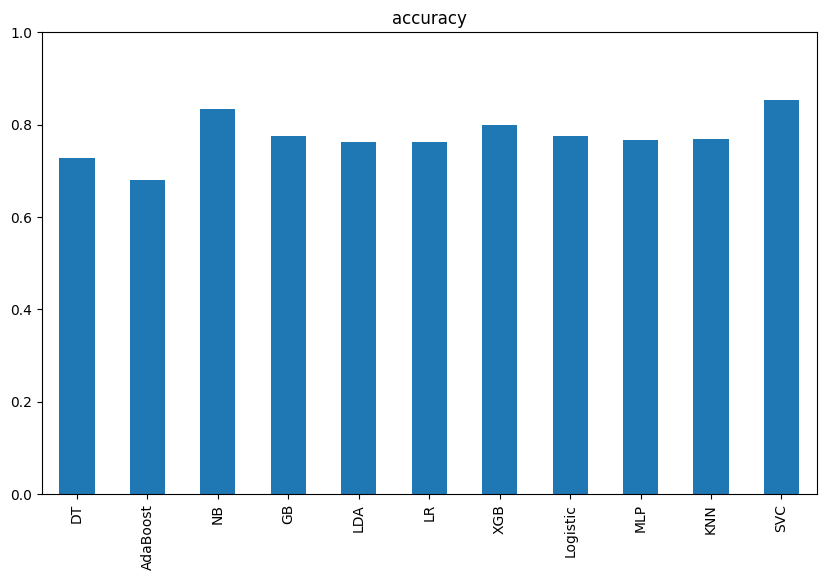

In [108]:
evaluation_PCA_df.T.sort_values(by =['f2_score'])['f2_score'].plot(kind='bar', figsize=(10, 6))
plt.title('f2_score')
plt.ylim(0, 1)
plt.show()
evaluation_PCA_df.T.sort_values(by =['f2_score'])['precision'].plot(kind='bar', figsize=(10, 6))
plt.title('precision')
plt.ylim(0, 1)
plt.show()
evaluation_PCA_df.T.sort_values(by =['f2_score'])['recall'].plot(kind='bar', figsize=(10, 6))
plt.title('recall')
plt.ylim(0, 1)
plt.show()
evaluation_PCA_df.T.sort_values(by =['f2_score'])['accuracy'].plot(kind='bar', figsize=(10, 6))
plt.title('accuracy')
plt.ylim(0, 1)
plt.show()

# Result 

In [109]:
evaluation_df.T.sort_values(by =['f2_score'], ascending=False)

,f2_score,accuracy,precision,recall
NB,0.625975,0.753964,0.248497,0.738095
MLP,0.55365,0.933059,0.710938,0.541667
KNN,0.550598,0.916618,0.582278,0.547619
XGB,0.502507,0.930123,0.713043,0.488095
GB,0.496423,0.917205,0.59854,0.488095
LDA,0.49118,0.917792,0.604478,0.482143
DT,0.450573,0.900763,0.496689,0.446429
Logistic,0.441836,0.852613,0.324895,0.458333
SVC,0.328547,0.9266,0.852459,0.309524
LR,0.326857,0.921315,0.742857,0.309524


In [110]:
evaluation_UnderSample_df.T.sort_values(by =['f2_score'], ascending=False)

,f2_score,accuracy,precision,recall
SVC,0.744734,0.875514,0.429936,0.803571
XGB,0.725047,0.80505,0.315315,0.833333
Logistic,0.701155,0.778626,0.284536,0.821429
MLP,0.689429,0.789783,0.292576,0.797619
GB,0.685596,0.774516,0.277778,0.803571
KNN,0.684017,0.77158,0.274949,0.803571
AdaBoost,0.635197,0.754551,0.250996,0.75
NB,0.632635,0.722255,0.22913,0.767857
DT,0.608428,0.69818,0.210702,0.75
LDA,0.423586,0.5367,0.118081,0.571429


In [111]:
evaluation_OverSample_df .T.sort_values(by =['f2_score'] , ascending=False)

,f2_score,accuracy,precision,recall
SVC,0.717647,0.933059,0.642105,0.72619
LDA,0.682422,0.843218,0.358974,0.75
LR,0.682422,0.843218,0.358974,0.75
KNN,0.658369,0.91192,0.543269,0.672619
AdaBoost,0.658031,0.79037,0.286682,0.755952
NB,0.624542,0.751028,0.246032,0.738095
XGB,0.619718,0.926013,0.626506,0.619048
GB,0.60298,0.905461,0.517588,0.613095
DT,0.581675,0.884909,0.43913,0.60119
MLP,0.502787,0.930711,0.719298,0.488095


In [112]:
evaluation_SelectKBest_df.T.sort_values(by =['f2_score'] , ascending=False)

,f2_score,accuracy,precision,recall
XGB,0.716279,0.789783,0.297872,0.833333
SVC,0.709855,0.865531,0.404389,0.767857
GB,0.707692,0.79037,0.296774,0.821429
MLP,0.685596,0.774516,0.277778,0.803571
KNN,0.677701,0.768056,0.270707,0.797619
Logistic,0.665116,0.778039,0.276596,0.77381
DT,0.625284,0.743394,0.240848,0.744048
LDA,0.617295,0.754551,0.246964,0.72619
LR,0.617295,0.754551,0.246964,0.72619
AdaBoost,0.610541,0.768644,0.256466,0.708333


In [113]:
evaluation_LDA_df.T.sort_values(by =['f2_score'] , ascending=False)

,f2_score,accuracy,precision,recall
NB,0.468838,0.551967,0.131351,0.630952
MLP,0.468085,0.600117,0.142259,0.607143
Logistic,0.467988,0.587199,0.139001,0.613095
LDA,0.467988,0.587199,0.139001,0.613095
LR,0.467988,0.587199,0.139001,0.613095
KNN,0.466255,0.581914,0.137333,0.613095
DT,0.465243,0.604228,0.142655,0.60119
GB,0.465243,0.604228,0.142655,0.60119
AdaBoost,0.465243,0.604228,0.142655,0.60119
XGB,0.465243,0.604228,0.142655,0.60119


In [114]:
evaluation_ICA_df.T.sort_values(by =['f2_score'] , ascending=False)

,f2_score,accuracy,precision,recall
SVC,0.746409,0.863183,0.40413,0.815476
MLP,0.690917,0.751615,0.260788,0.827381
LDA,0.688442,0.763359,0.269155,0.815476
LR,0.688442,0.763359,0.269155,0.815476
Logistic,0.683673,0.779213,0.281513,0.797619
XGB,0.665426,0.778626,0.277186,0.77381
GB,0.652291,0.73576,0.241758,0.785714
NB,0.639202,0.691133,0.214058,0.797619
KNN,0.635865,0.657076,0.198551,0.815476
DT,0.554316,0.609513,0.164642,0.72619


In [115]:
evaluation_PCA_df.T.sort_values(by =['f2_score'] , ascending=False)

,f2_score,accuracy,precision,recall
SVC,0.731167,0.853787,0.384615,0.803571
KNN,0.704805,0.769231,0.277228,0.833333
MLP,0.690334,0.766882,0.272366,0.815476
Logistic,0.681461,0.775103,0.277433,0.797619
XGB,0.672193,0.799765,0.299304,0.767857
LDA,0.66575,0.762184,0.263473,0.785714
LR,0.66575,0.762184,0.263473,0.785714
GB,0.649767,0.774516,0.270213,0.755952
NB,0.610203,0.833823,0.330383,0.666667
AdaBoost,0.540114,0.679977,0.186356,0.666667


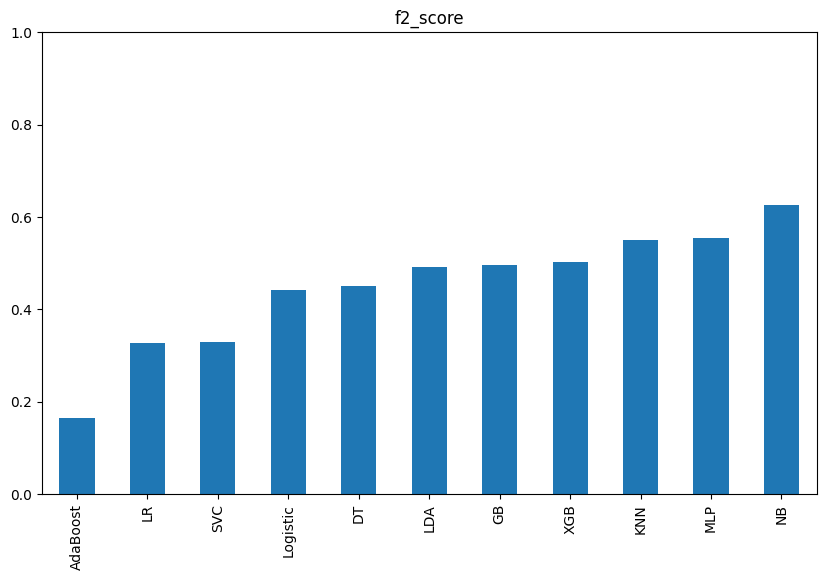

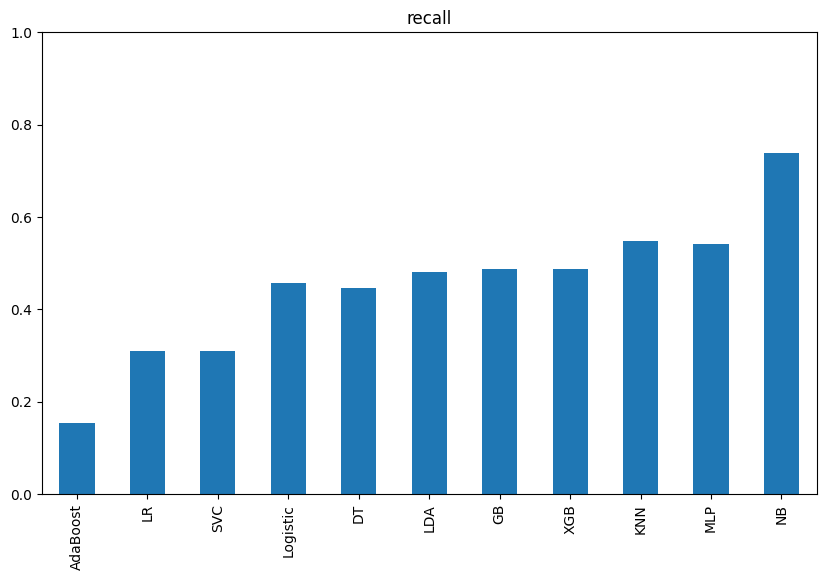

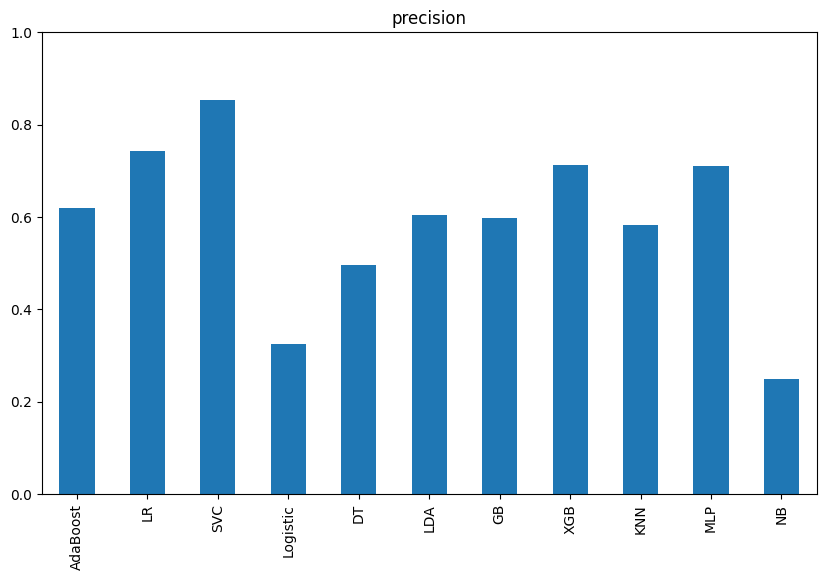

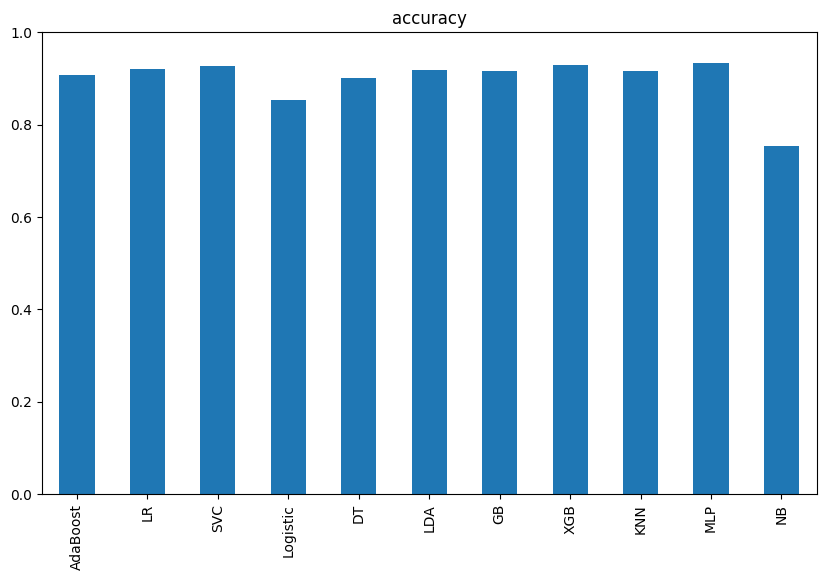

In [116]:
evaluation_df.T.sort_values(by =['f2_score'])['f2_score'].plot(kind='bar', figsize=(10, 6))
plt.title('f2_score')
plt.ylim(0, 1)
plt.show()

evaluation_df.T.sort_values(by =['f2_score'])['recall'].plot(kind='bar', figsize=(10, 6))
plt.title('recall')
plt.ylim(0, 1)
plt.show()

evaluation_df.T.sort_values(by =['f2_score'])['precision'].plot(kind='bar', figsize=(10, 6))
plt.title('precision')
plt.ylim(0, 1)
plt.show()

evaluation_df.T.sort_values(by =['f2_score'])['accuracy'].plot(kind='bar', figsize=(10, 6))
plt.title('accuracy')
plt.ylim(0, 1)
plt.show()



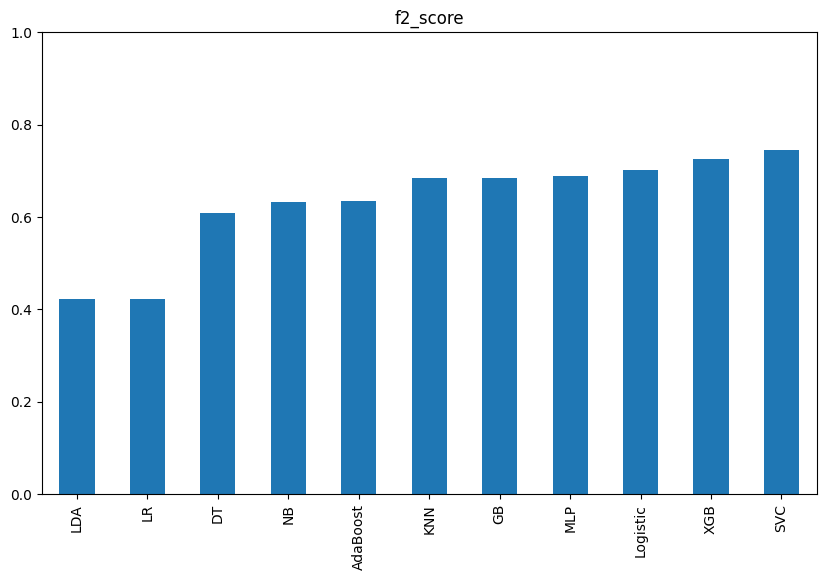

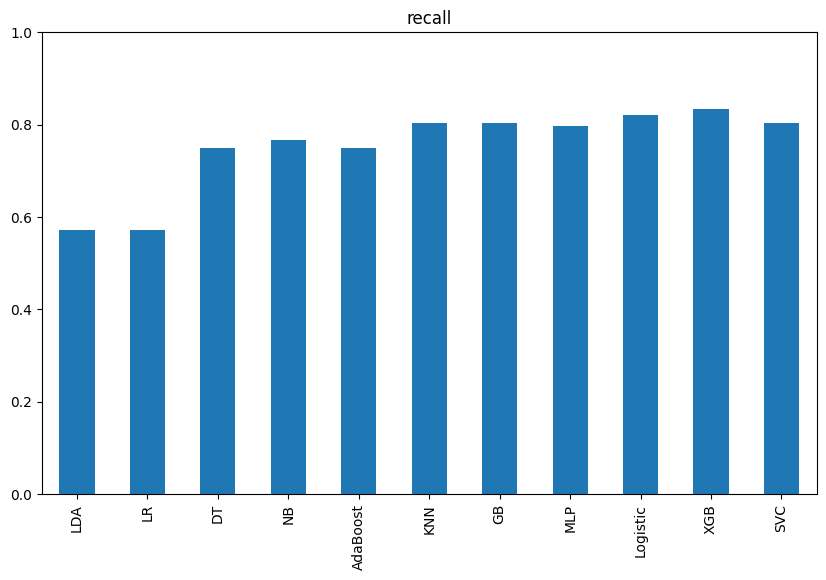

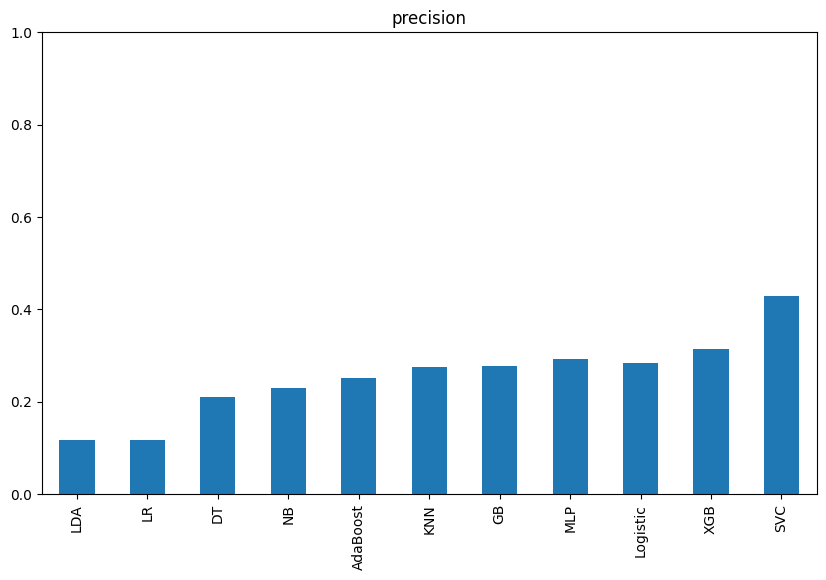

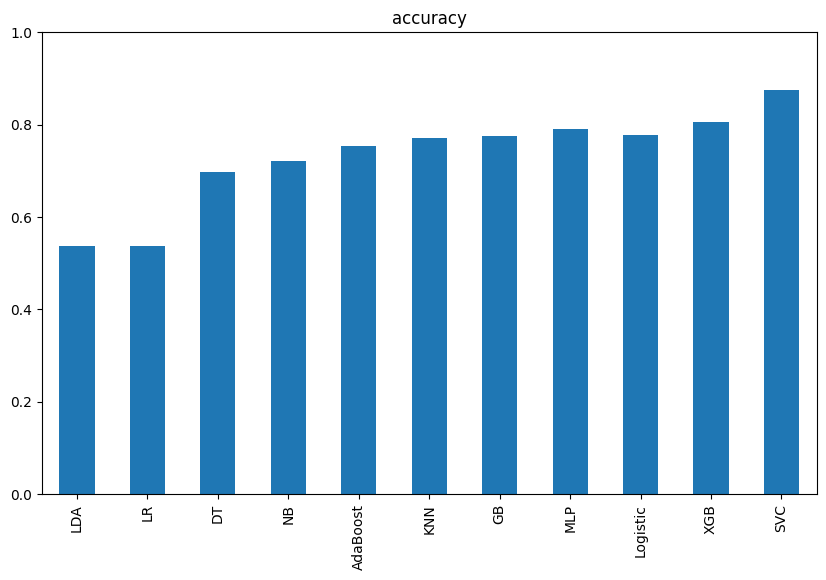

In [117]:
evaluation_UnderSample_df.T.sort_values(by =['f2_score'])['f2_score'].plot(kind='bar', figsize=(10, 6))
plt.title('f2_score')
plt.ylim(0, 1)
plt.show()

evaluation_UnderSample_df.T.sort_values(by =['f2_score'])['recall'].plot(kind='bar', figsize=(10, 6))
plt.title('recall')
plt.ylim(0, 1)
plt.show()

evaluation_UnderSample_df.T.sort_values(by =['f2_score'])['precision'].plot(kind='bar', figsize=(10, 6))
plt.title('precision')
plt.ylim(0, 1)
plt.show()

evaluation_UnderSample_df.T.sort_values(by =['f2_score'])['accuracy'].plot(kind='bar', figsize=(10, 6))
plt.title('accuracy')
plt.ylim(0, 1)
plt.show()

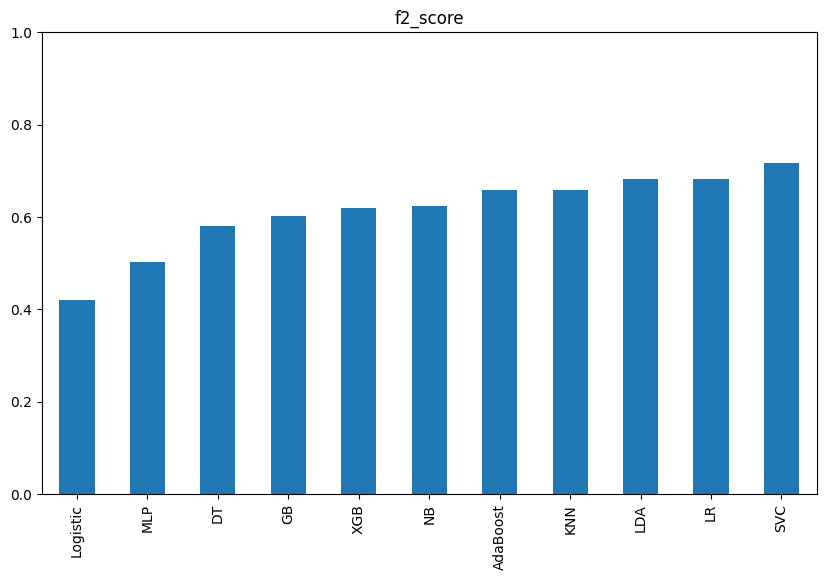

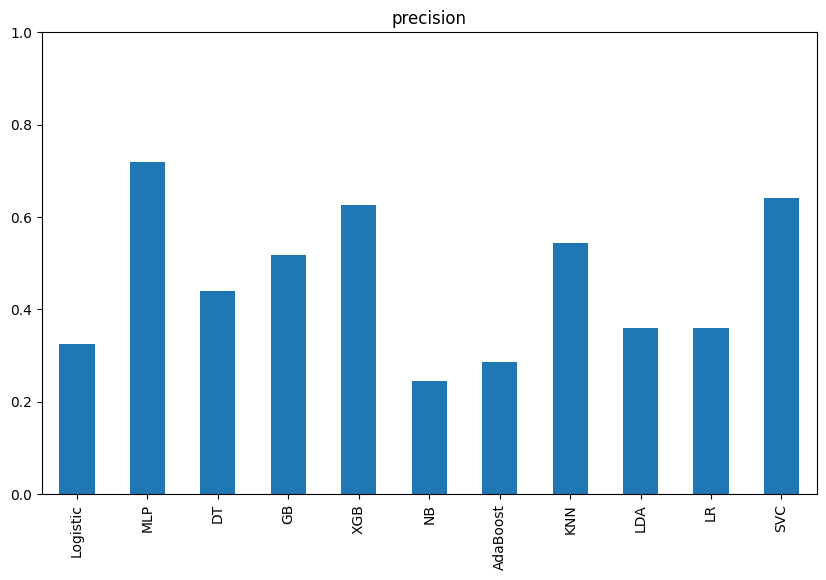

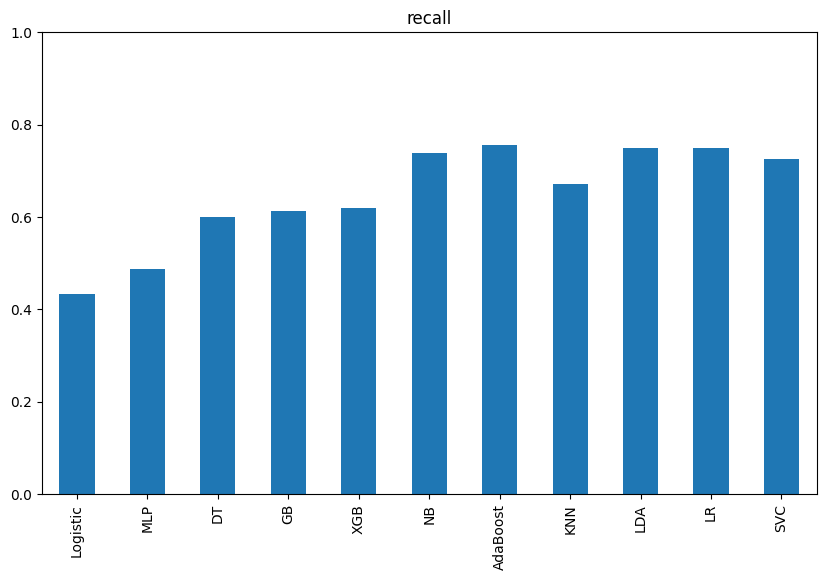

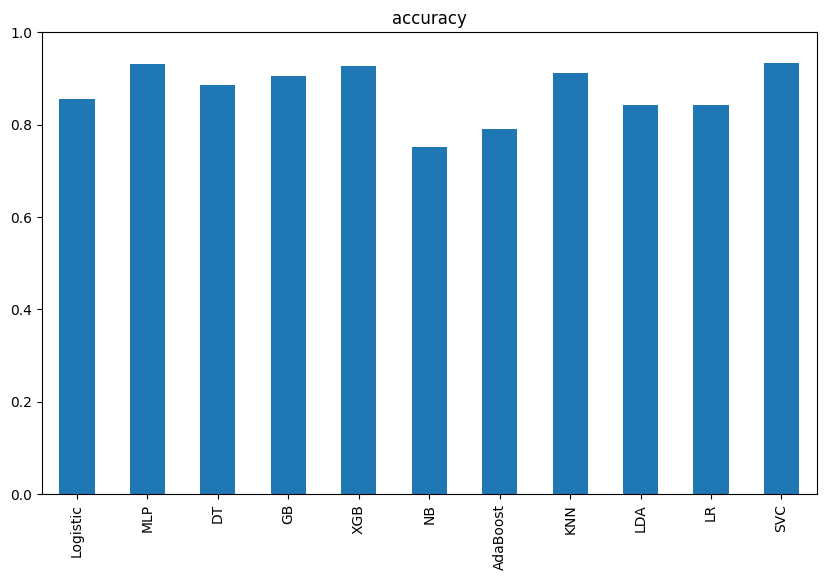

In [118]:
evaluation_OverSample_df.T.sort_values(by =['f2_score'])['f2_score'].plot(kind='bar', figsize=(10, 6))
plt.title('f2_score')
plt.ylim(0, 1)
plt.show()
evaluation_OverSample_df.T.sort_values(by =['f2_score'])['precision'].plot(kind='bar', figsize=(10, 6))
plt.title('precision')
plt.ylim(0, 1)
plt.show()

evaluation_OverSample_df.T.sort_values(by =['f2_score'])['recall'].plot(kind='bar', figsize=(10, 6))
plt.title('recall')
plt.ylim(0, 1)
plt.show()

evaluation_OverSample_df.T.sort_values(by =['f2_score'])['accuracy'].plot(kind='bar', figsize=(10, 6))
plt.title('accuracy')
plt.ylim(0, 1)
plt.show()


In [ ]:
evaluation_SelectKBest_df.T.sort_values(by =['f2_score'])['f2_score'].plot(kind='bar', figsize=(10, 6))
plt.title('f2_score')
plt.ylim(0, 1)
plt.show()

evaluation_SelectKBest_df.T.sort_values(by =['f2_score'])['precision'].plot(kind='bar', figsize=(10, 6))
plt.title('precision')
plt.ylim(0, 1)
plt.show()

evaluation_SelectKBest_df.T.sort_values(by =['f2_score'])['recall'].plot(kind='bar', figsize=(10, 6))
plt.title('recall')
plt.ylim(0, 1)
plt.show()

evaluation_SelectKBest_df.T.sort_values(by =['f2_score'])['accuracy'].plot(kind='bar', figsize=(10, 6))
plt.title('accuracy')
plt.ylim(0, 1)
plt.show()

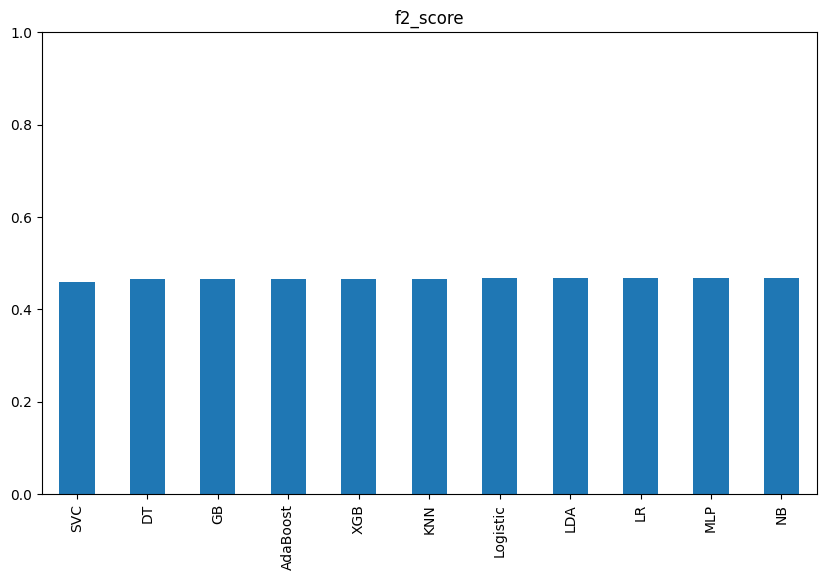

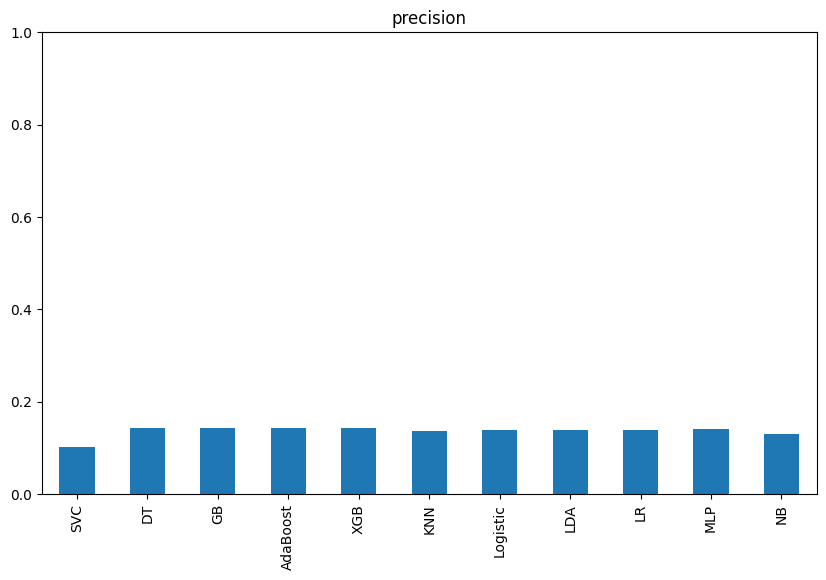

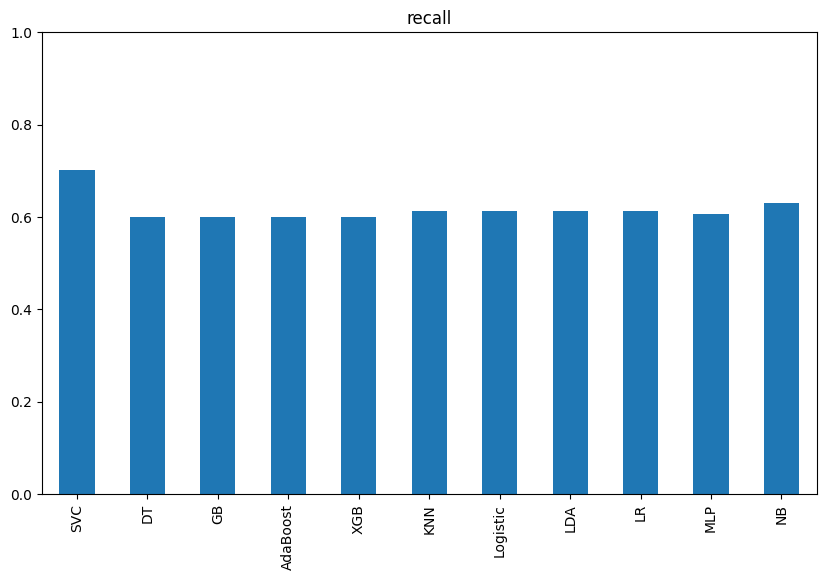

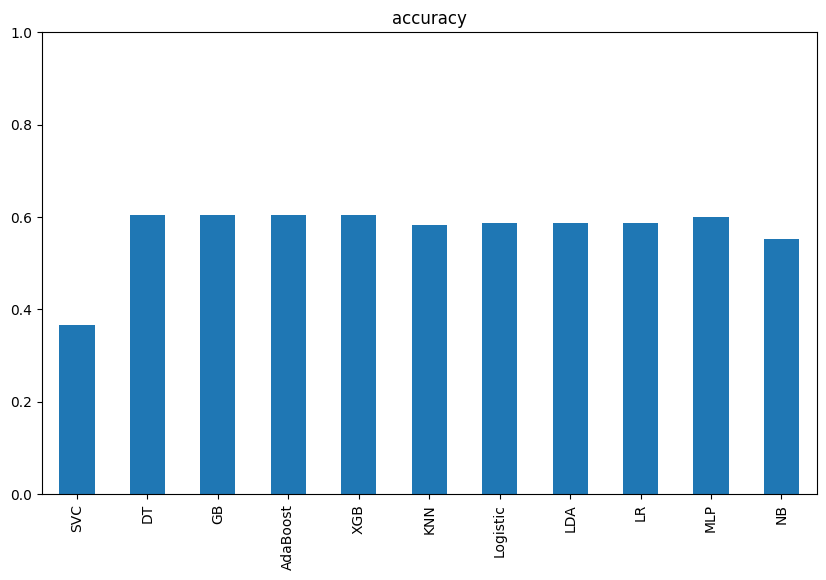

In [119]:
evaluation_LDA_df.T.sort_values(by =['f2_score'])['f2_score'].plot(kind='bar', figsize=(10, 6))
plt.title('f2_score')
plt.ylim(0, 1)
plt.show()

evaluation_LDA_df.T.sort_values(by =['f2_score'])['precision'].plot(kind='bar', figsize=(10, 6))
plt.title('precision')
plt.ylim(0, 1)
plt.show()

evaluation_LDA_df.T.sort_values(by =['f2_score'])['recall'].plot(kind='bar', figsize=(10, 6))
plt.title('recall')
plt.ylim(0, 1)
plt.show()

evaluation_LDA_df.T.sort_values(by =['f2_score'])['accuracy'].plot(kind='bar', figsize=(10, 6))
plt.title('accuracy')
plt.ylim(0, 1)
plt.show()

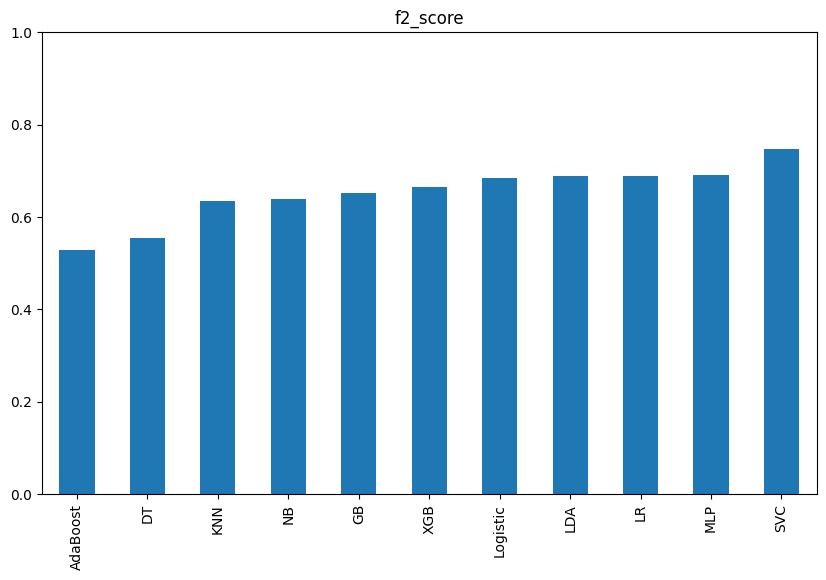

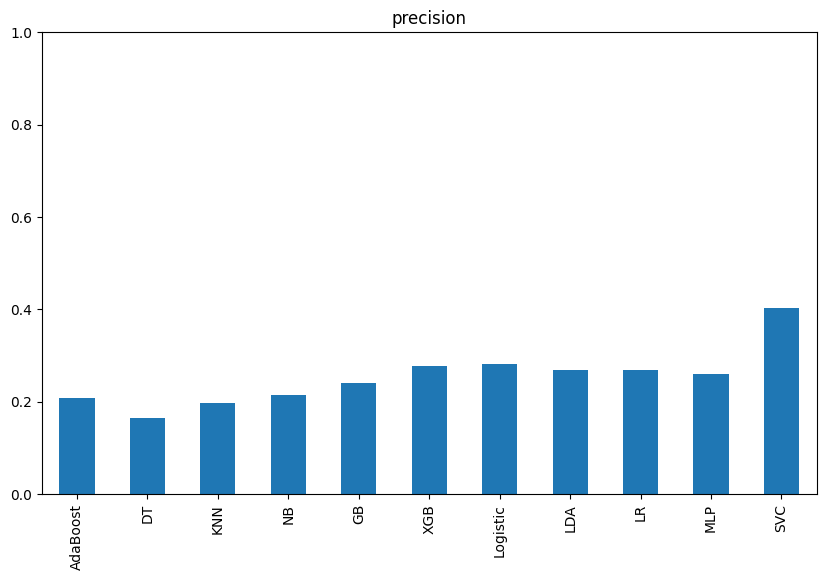

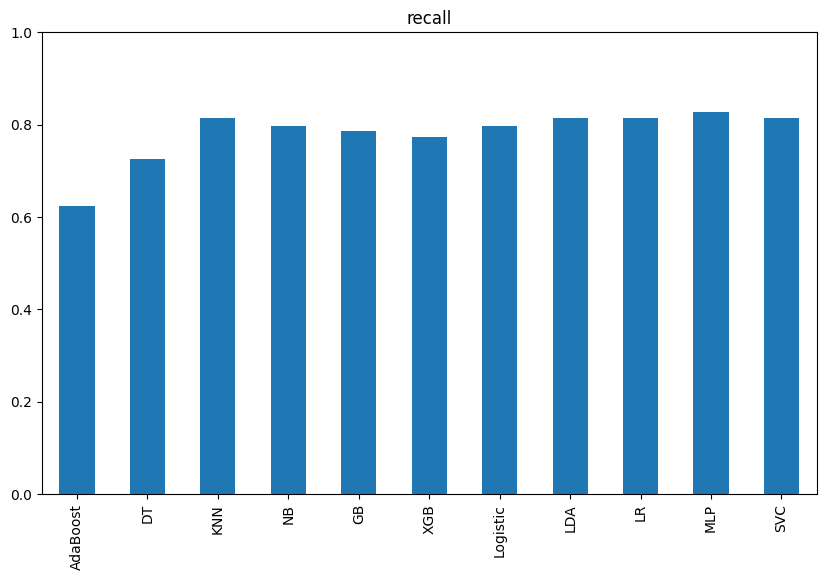

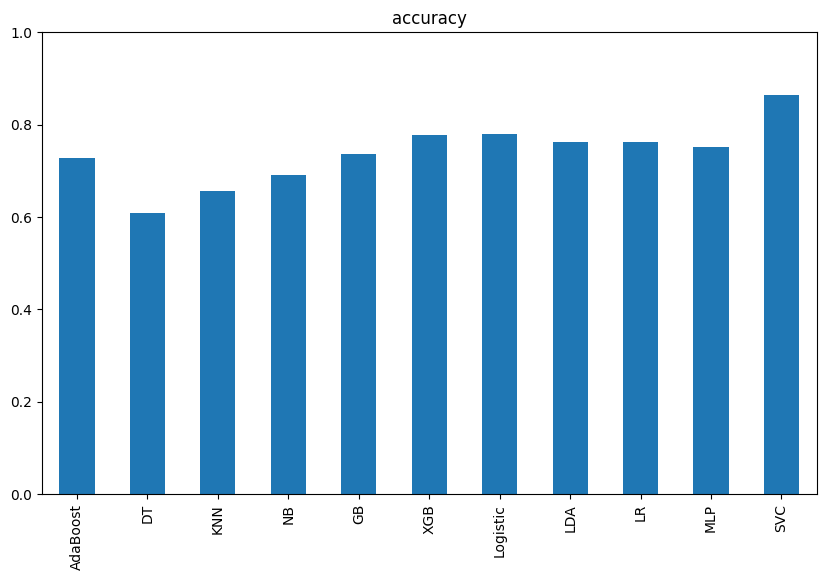

In [120]:
evaluation_ICA_df.T.sort_values(by =['f2_score'])['f2_score'].plot(kind='bar', figsize=(10, 6))
plt.title('f2_score')
plt.ylim(0, 1)
plt.show()
evaluation_ICA_df.T.sort_values(by =['f2_score'])['precision'].plot(kind='bar', figsize=(10, 6))
plt.title('precision')
plt.ylim(0, 1)
plt.show()
evaluation_ICA_df.T.sort_values(by =['f2_score'])['recall'].plot(kind='bar', figsize=(10, 6))
plt.title('recall')
plt.ylim(0, 1)
plt.show()
evaluation_ICA_df.T.sort_values(by =['f2_score'])['accuracy'].plot(kind='bar', figsize=(10, 6))
plt.title('accuracy')
plt.ylim(0, 1)
plt.show()

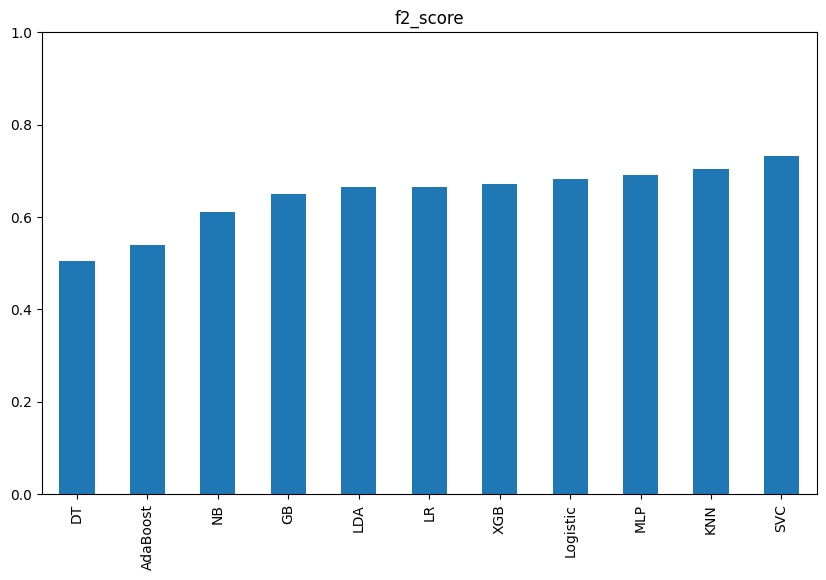

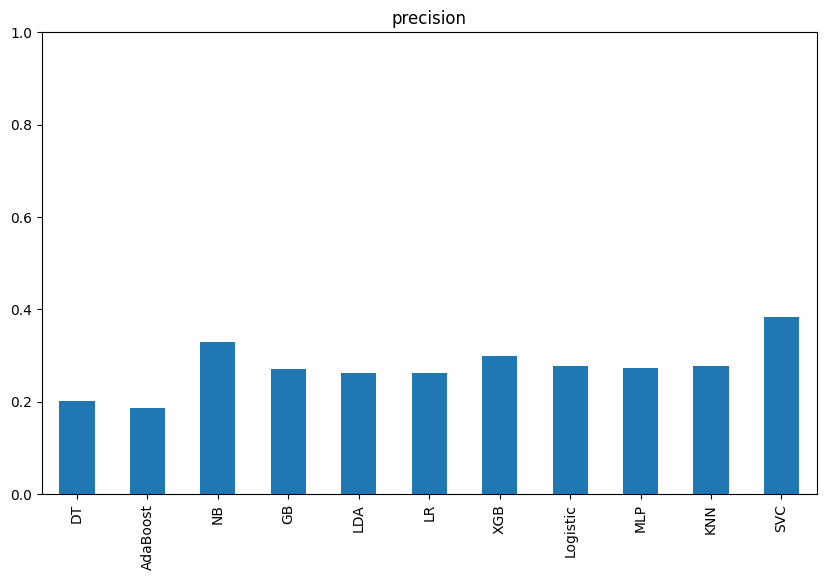

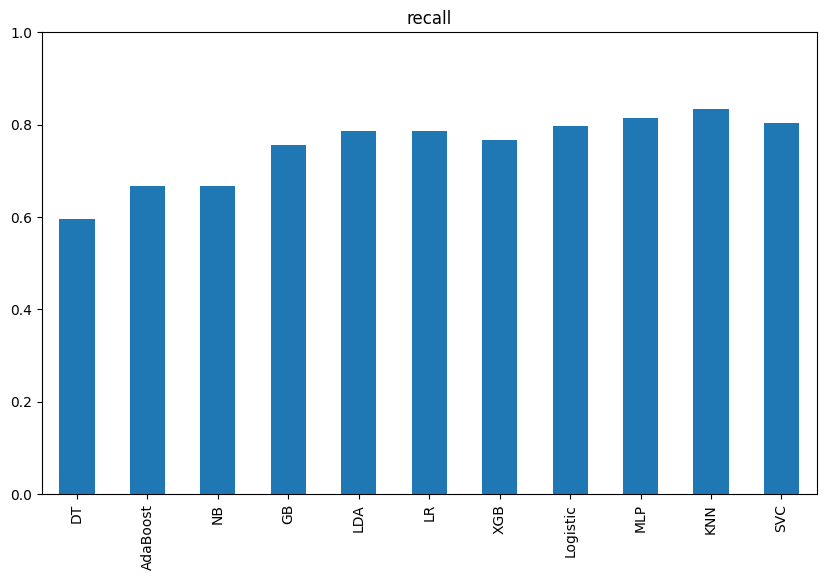

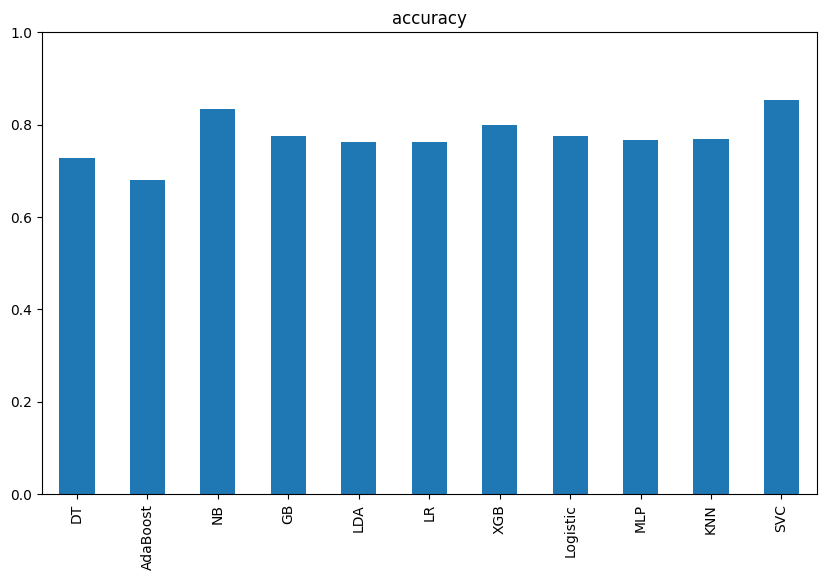

In [121]:
evaluation_PCA_df.T.sort_values(by =['f2_score'])['f2_score'].plot(kind='bar', figsize=(10, 6))
plt.title('f2_score')
plt.ylim(0, 1)
plt.show()
evaluation_PCA_df.T.sort_values(by =['f2_score'])['precision'].plot(kind='bar', figsize=(10, 6))
plt.title('precision')
plt.ylim(0, 1)
plt.show()
evaluation_PCA_df.T.sort_values(by =['f2_score'])['recall'].plot(kind='bar', figsize=(10, 6))
plt.title('recall')
plt.ylim(0, 1)
plt.show()
evaluation_PCA_df.T.sort_values(by =['f2_score'])['accuracy'].plot(kind='bar', figsize=(10, 6))
plt.title('accuracy')
plt.ylim(0, 1)
plt.show()